# Проектная работа №3. Исследование объявлений о продаже квартир

## Содержание

<br>Описание проекта
<br>Описание данных

1. <b>Загрузка данных и получение общей информации</b>
<br>1.1. Общая информация о полученном датафрейме
<br>1.2. Визуализация: гистограмма для всех числовых столбцов таблицы на одном графике
2. <b>Предварительная обработка данных</b>
<br>2.1. Обработка пропущенных значений
<br>2.2. Изменение типов данных
<br>2.3. Обработка дубликатов
<br>2.4. Обработка аномальных значений
3. <b>Создание дополнительных признаков</b>
<br>3.1. Цена одного квадратного метра
<br>3.2. День недели публикации объявления (0 — понедельник, 1 — вторник и так далее)
<br>3.3. Месяц публикации объявления
<br>3.4. Год публикации объявления
<br>3.5. Тип этажа квартиры (значения — «первый», «последний», «другой»)
<br>3.6. Расстояние до центра города в километрах
4. <b>Исследовательский анализ данных</b>
<br>4.1. Изучение ключевых параметров недвижимости с визуализацией (гистограмма):
<br>- общая площадь;
<br>- жилая площадь;
<br>- площадь кухни;
<br>- цена объекта;
<br>- количество комнат;
<br>- высота потолков;
<br>- тип этажа квартиры;
<br>- общее количество этажей в доме;
<br>- расстояние до центра города в метрах;
<br>- расстояние до ближайшего парка.
<br>4.2. Изучение периода продажи квартиры с расчётом среднего и медианного значения, а также визуализация (гистограмма)
<br>4.3. Изучение факторов, которые оказывают критическое влияние на полную стоимость объекта с визуализацией (диаграмма рассеяния):
<br>- общей площади;
<br>- жилой площади;
<br>- площади кухни;
<br>- количества комнат;
<br>- этажа, на котором расположена квартира;
<br>- даты размещения объявления (день недели, месяц, год).
<br>4.4. Расчёт средней стоимости квадратного метра недвижимости в 10 населённых пунктах с наибольшим числом объявлений.
<br>4.5. Расчёт средней стоимости недвижимости Санкт-Петербурга в зависимости от удалённости от центра города с визуализацией (линейный график).
5. <b>Подведение итогов</b>

### Описание проекта
В нашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Необходимо научиться определять рыночную стоимость объектов недвижимости. Для этого требуется проведение исследовательского анализа данных и выявление параметров, влияющих на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. По каждой квартире на продажу доступны два вида данных: первые — внесены пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Описание данных

Исходный датафрейм `real_estate_data.csv` содержит 23 699 строк в разрезе следующих 22 признаков:

| № п/п  | Название               | Краткое описание                            | Ед.      | Значение признака              |
|--------|:-----------------------|:--------------------------------------------|:---------|:-------------------------------|
| 1.     | `locality_name`        | название населённого пункта                 | локация  | 365 адресных единиц            |
| 2.     | `last_price`           | цена на момент снятия с публикации          | тыс.руб. | 12 190 - 763 000 000           |
| 3.     | `total_area`           | общая площадь квартиры в квадратных метрах  | м²       | 12 - 900                       |
| 4.     | `living_area`          | жилая площадь в квадратных метрах           | м²       | 2 - 409.7                      |
| 5.     | `kitchen_area`         | площадь кухни в квадратных метрах           | м²       | 1.3 - 112                      |
| 6.     | `rooms`                | число комнат                                | ед.      | 0 - 19                         |
| 7.     | `ceiling_height`       | высота потолков                             | м        | 1 - 100                        |
| 8.     | `balcony`              | число балконов                              | шт.      | 0 - 5                          |
| 9.     | `is_apartment`         | апартаменты                                 | да / нет | 1 / 0                          |
| 10.    | `studio`               | квартира-студия                             | да / нет | 1 / 0                          |
| 11.    | `open_plan`            | свободная планировка                        | да / нет | 1 / 0                          |
| 12.    | `floor`                | этаж                                        | ед.      | 1 - 33                         |
| 13.    | `floors_total`         | всего этажей в доме                         | ед.      | 1 - 60                         |
| 14.    | `cityCenters_nearest`  | расстояние до центра города                 | м        | 181 - 65 968                   |
| 15.    | `airports_nearest`     | расстояние до ближайшего аэропорта в метрах | м        | 0 - 84 869                     |
| 16.    | `parks_around3000`     | число парков в радиусе 3 км                 | ед.      | 0 - 3                          |
| 17.    | `parks_nearest`        | расстояние до ближайшего парка              | м        | 1 - 3 190                      |
| 18.    | `ponds_around3000`     | число водоёмов в радиусе 3 км               | ед.      | 0 - 3                          |
| 19.    | `ponds_nearest`        | расстояние до ближайшего водоёма            | м        | 13 - 1 344                     |
| 20.    | `total_images`         | число фотографий квартиры в объявлении      | ед.      | 0 - 50                         |
| 21.    | `first_day_exposition` | дата публикации                             | дата     | 27.11.2014 - 03.05.2019        |
| 22.    | `days_exposition`      | длительность периода размещения объявления  | ед.      | 1 - 1 580                      |

**Задача:** выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.

Значения признаков получены с помощью последовательного применения методов `min()`, `max()` и `unique()` ко всем столбцам датафрейма.

### 1. Загрузка данных и получение общей информации

In [1]:
# импорт библиотек
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

#pip install geopy
# импорт модуля distance библиотеки geopy 
from geopy import distance

import warnings
warnings.simplefilter('ignore')

In [2]:
# загрузка данных
try:
    df = pd.read_csv('real_estate_data.csv', sep='\t')
except:
    df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
# пересобираем датафрейм в порядке смыслового значения признака
df = df[['locality_name', 'last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms', 
        'ceiling_height', 'balcony', 'is_apartment', 'studio', 'open_plan', 'floor', 'floors_total',
        'cityCenters_nearest', 'airports_nearest', 'parks_around3000', 'parks_nearest', 
        'ponds_around3000', 'ponds_nearest', 'total_images', 'first_day_exposition', 'days_exposition']]

#### 1.1. Общая информация о полученном датафрейме

In [4]:
# выводим первые 5 строк датафрейма для ознакомления
df.head()

,locality_name,last_price,total_area,living_area,kitchen_area,rooms,ceiling_height,balcony,is_apartment,studio,...,floors_total,cityCenters_nearest,airports_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,total_images,first_day_exposition,days_exposition
0,Санкт-Петербург,13000000.0,108.0,51.0,25.0,3,2.70,NaN,NaN,False,...,16.0,16028.0,18863.0,1.0,482.0,2.0,755.0,20,2019-03-07T00:00:00,NaN
1,посёлок Шушары,3350000.0,40.4,18.6,11.0,1,NaN,2.0,NaN,False,...,11.0,18603.0,12817.0,0.0,NaN,0.0,NaN,7,2018-12-04T00:00:00,81.0
2,Санкт-Петербург,5196000.0,56.0,34.3,8.3,2,NaN,0.0,NaN,False,...,5.0,13933.0,21741.0,1.0,90.0,2.0,574.0,10,2015-08-20T00:00:00,558.0
3,Санкт-Петербург,64900000.0,159.0,NaN,NaN,3,NaN,0.0,NaN,False,...,14.0,6800.0,28098.0,2.0,84.0,3.0,234.0,0,2015-07-24T00:00:00,424.0
4,Санкт-Петербург,10000000.0,100.0,32.0,41.0,2,3.03,NaN,NaN,False,...,14.0,8098.0,31856.0,2.0,112.0,1.0,48.0,2,2018-06-19T00:00:00,121.0


In [5]:
# выводим основную информацию о количестве записей, количестве ненулевых значений, типах признаков 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   locality_name         23650 non-null  object 
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   living_area           21796 non-null  float64
 4   kitchen_area          21421 non-null  float64
 5   rooms                 23699 non-null  int64  
 6   ceiling_height        14504 non-null  float64
 7   balcony               12180 non-null  float64
 8   is_apartment          2775 non-null   object 
 9   studio                23699 non-null  bool   
 10  open_plan             23699 non-null  bool   
 11  floor                 23699 non-null  int64  
 12  floors_total          23613 non-null  float64
 13  cityCenters_nearest   18180 non-null  float64
 14  airports_nearest      18157 non-null  float64
 15  parks_around3000   

In [6]:
# первичный статистический анализ
df.describe().astype(int)

,last_price,total_area,living_area,kitchen_area,rooms,ceiling_height,balcony,floor,floors_total,cityCenters_nearest,airports_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,total_images,days_exposition
count,23699,23699,21796,21421,23699,14504,12180,23699,23613,18180,18157,18181,8079,18181,9110,23699,20518
mean,6541548,60,34,10,2,2,1,5,10,14191,28793,0,490,0,517,9,180
std,10887013,35,22,5,1,1,1,4,6,8608,12630,0,342,0,277,5,219
min,12190,12,2,1,0,1,0,1,1,181,0,0,1,0,13,0,1
25%,3400000,40,18,7,1,2,0,2,5,9238,18585,0,288,0,294,6,45
50%,4650000,52,30,9,2,2,1,4,9,13098,26726,0,455,1,502,9,95
75%,6800000,69,42,12,3,2,2,8,16,16293,37273,1,612,1,729,14,232
max,763000000,900,409,112,19,100,5,33,60,65968,84869,3,3190,3,1344,50,1580


#### 1.2. Визуализация: гистограмма для всех числовых столбцов таблицы на одном графике

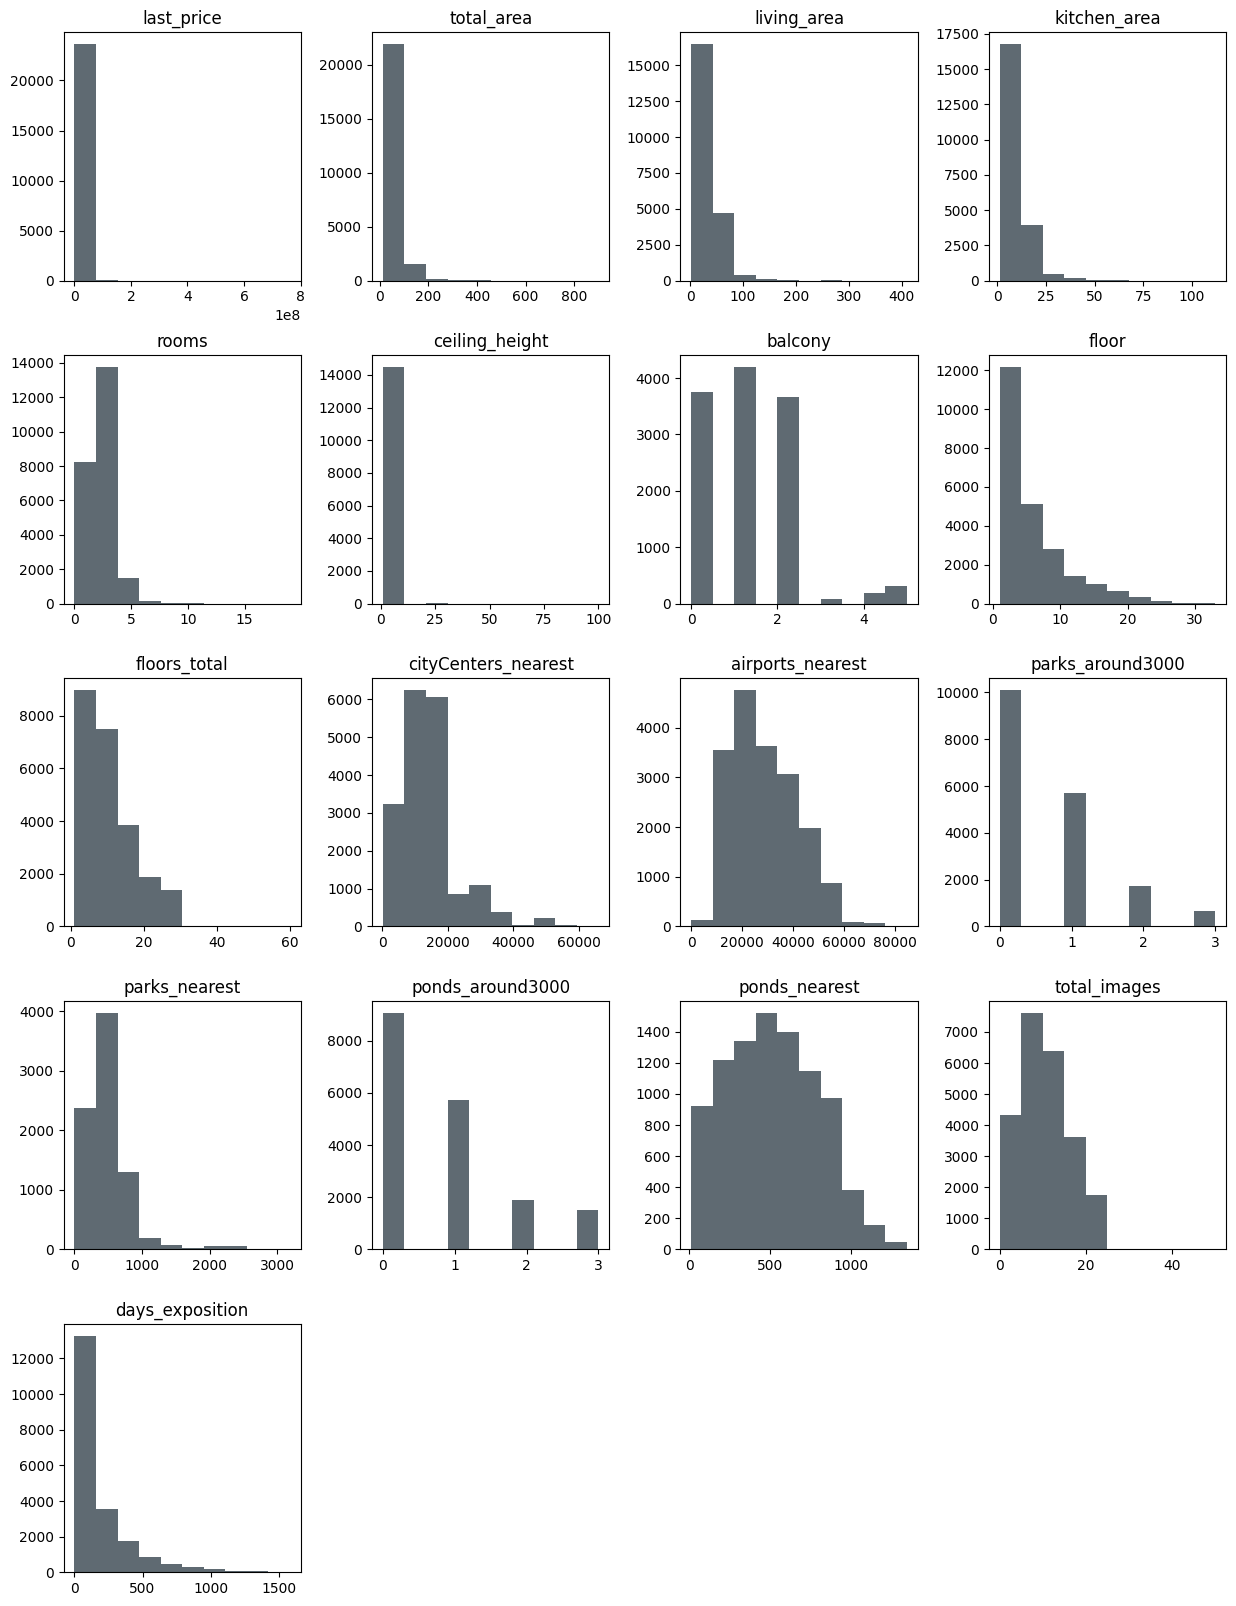

In [7]:
# гистограмма для всех числовых признаков датафрейма
df.hist(figsize=(15,20), grid=False, color='#5f6a72');

**Вывод:** на основании результатов последовательного применения методов `info()`, `describe()` и визуализации гистограммы числовых признаков датафрейма методом `hist()` мы получили информацию для первичного статистического анализа. 

Так, исходный датафрейм содержит 23 699 строк в разрезе 22 признаков: 17 количественных, 4 категориальных и 1 временной. При этом имеются многочисленные пропуски значений, несоответствие типа признака хранимой информации, а также аномальные и дублирующие значения. Данные существенно загрязнены, требуется проведение комплексной предобработки данных для дальнейшего исследования. Подробная информация о необходимых видах предварительной обработки представлена в таблице ниже.

*Таблица 1. Виды необходимой предварительной обработки данных*

|№ п/п | Название                  | Наличие пропусков                             | Наличие аномалий | Изменение типа | Дублирующие записи|
|------|:---------------------------|:------------------------------------------------|:-----------------------------------------------------------------------------------------------------------|:----------------------|:--------------------------------|
| 1.    | `locality_name`             | <span style=«color:red;»>49 пропусков </span>        | нет | нет | <span style=«color:red;»>требуется проверка значений методом `unique()`, высокая вероятность наличия дублей</span> |
| 2.    | `last_price`                    | нет                                                             | <span style=«color:red;»>требуют проверки `max()` значения стоимости 763 000 000 тыс.руб. </span> | нет                    |                                                               | 
| 3.    | `total_area`                   | нет                                                             | <span style=«color:red;»>в большинстве квартир указана площадь порядка 70 $м^2$, требует проверки `max()` значение площади 900 $м^2$ </span>| нет | |
| 4.    | `living_area`                  | <span style=«color:red;»>1 903 пропуска</span>       | <span style=«color:red;»>требуют проверки `min()` и `max()` площади величиной 2.0 и 409.7 $м^2$ соответственно</span> | нет ||
| 5.    | `kitchen_area`              | <span style=«color:red;»>2 278 пропусков</span>     | <span style=«color:red;»>требуют проверки `max()` площади величиной до 112.0 $м^2$</span> | нет ||
| 6.    | `rooms`                          | нет                                                             | <span style=«color:red;»>требуют проверки `max()` количество комнат числом 19</span>| нет ||
| 7.    | `ceiling_height`             | <span style=«color:red;»>9 195 пропусков</span>    | <span style=«color:red;»>требуют проверки `max()` высота потолка 100.0 м при средней высоте 2.65 – 2.80 м</span> | нет ||
| 8.    | `balcony`                        | <span style=«color:red;»>11 519 пропусков</span>  | <span style=«color:red;»>требуют проверки `max()` количество балконов числом 5|<span style=«color:red;»>требуется замена на целочисленный тип данных int64</span> ||
| 9.    | `is_apartment`              | <span style=«color:red;»>20 924 пропуска</span>    | нет |<span style=«color:red;»>требуется замена на булев тип данных bool</span> ||
| 10.   | `studio`                          | нет                                                            | нет  | нет ||
| 11.   | `open_plan`                  | нет                                                            | нет | нет ||
| 12.   | `floor`                             | нет                                                            | <span style=«color:red;»>требуют проверки `max()` 33 этаж</span> | нет ||
| 13.   | `floors_total`                | <span style=«color:red;»>86 пропусков  </span>        | <span style=«color:red;»>требуют проверки `max()` высота здания в 60 этажей</span> | <span style=«color:red;»>требуется замена на целочисленный тип данных int64</span> ||
| 14.   | `cityCenters_nearest` | <span style=«color:red;»>5 519 пропусков</span>    | нет | нет ||
| 15.   | `airports_nearest`       | <span style=«color:red;»>5 542 пропуска  </span>     |<span style=«color:red;»>требуют проверки `min()` 0 м до ближайшего аэропорта</span> | нет ||
| 16.   | `parks_around3000`   | <span style=«color:red;»>5 518 пропусков </span>    | нет |<span style=«color:red;»>требуется замена на целочисленный тип данных int64</span> |  ||
| 17.   | `parks_nearest`           | <span style=«color:red;»>15 620 пропусков </span>  | <span style=«color:red;»>требуют проверки `min()` 0 м до ближайшего парка</span>| <span style=«color:red;»>требуется замена на целочисленный тип данных int64</span>||
| 18.   | `ponds_around3000` | <span style=«color:red;»>5 518 пропусков</span>     | нет |<span style=«color:red;»>требуется замена на целочисленный тип данных int64 </span>||
| 19.   | `ponds_nearest`         | <span style=«color:red;»>14 589 пропусков </span>  | нет| <span style=«color:red;»>требуется замена на целочисленный тип данных int64</span>||
| 20.   | `total_images`              | нет                                                            | нет| нет ||
| 21.   | `first_day_exposition` | нет                                                            | нет| <span style=«color:red;»>требуется замена на тип данных дата datetime</span> ||
| 22.   | `days_exposition`        | <span style=«color:red;»>3 181 пропуск</span>     |нет | нет ||

### 2. Предварительная обработка данных

#### 2.1. Обработка пропущенных значений 

In [8]:
# выявление пропусков значений в признаках
df_missing = pd.DataFrame(columns=['название признака', 'количество пропусков', '% пропущенных значений'])
j = 0
for i, col in enumerate(df.columns):
    percent_missing = np.mean(df[col].isnull())
    value_missing = np.sum(df[col].isnull())
    if percent_missing != 0:
        df_missing.loc[j] = [col, value_missing, (percent_missing*100).round(2)]
        j +=1

In [9]:
# визуализация пропусков в признаках: синий - данные присутствуют, красный - потери в данных
df_missing = df_missing.sort_values(by='количество пропусков', 
                       ascending=False).style.format({'количество пропусков': "{:0<4.0f}", 
                                                      '% пропущенных значений': '{:.1f}'}).background_gradient('coolwarm')
df_missing

,название признака,количество пропусков,% пропущенных значений
5,is_apartment,20924,88.3
10,parks_nearest,15620,65.9
12,ponds_nearest,14589,61.6
4,balcony,11519,48.6
3,ceiling_height,9195,38.8
8,airports_nearest,5542,23.4
7,cityCenters_nearest,5519,23.3
9,parks_around3000,5518,23.3
11,ponds_around3000,5518,23.3
13,days_exposition,3181,13.4


Загрязнения и потери данных в таких больших масштабах обязывают нас разработать стратегию восстановления данных в тех случаях, когда это возможно. В случае невозможности логичной замены, нами будут сохранены пропуски. Рассмотрим данные признаки.

2.1.1. **`is_apartment`** изобилует пропусками: 20 924 или 88.24% потери данных. Этот булев признак соотносит жильё, выставленное на продажу, с типом `апартаменты`. **Решение: заменить `NaN` на `False`, поскольку пользователи, заполнявшие карточку объекта на платформе Яндекс Недвижимость, пренебрегли этими сведениями в силу принадлежности продаваемой недвижимости к типу `квартира`.**


2.1.2. **`locality_name`** обладает самым малым количеством пропусков в данных, таких строк всего 49. Предположим, что причина может заключаться в умозрительной очевидности локации выставленного на продажу имущества, поскольку является тематическим разделом "Санкт-Петербург" платформы Яндекс Недвижимость. Таким образом, пользователи из Санкт-Петербурга пропустили заполнение этого пункта. Однако, следует учесть значения признака `cityCener_nearest`. В настоящее время приблизительный радиус Санкт-Петербурга составляет порядка 16.5 - 17.0 км, и увеличивается ежегодно за счёт агломерации прилегающих территорий. Следуя этой логике, мы предлагаем следующее **решение: восстановить значение `locality_name` как `Санкт-Петербург` при условии значения признака `'cityCenters_nearest'` <= 17 000 метров.** В остальных случаях стоит оставить пропуски, поскольку, потенциально, мы имеем дело с умышленным искажением данных, в которых продавец недвиимости выдаёт желаемое за действительное, то есть квартиру в Ленинградской области за квартиру на окраине Санкт-Петербурга.


2.1.3. Пропущенные значения по признакам **`airports_nearest`** и **`cityCenters_nearest`** в датафрейме существуют примерно в равном количестве 5 542 и 5 519 строк соответственно, что говорит о наличии системной ошибки при формировании изначальных данных. Предполагаем, что относительно населённого пункта в определённом оптимальном радиусе отсутствует аэропорт, поэтому возник пропуск. Тем не менее, в тех строках, где указано наименование населённого пункта за исключением Санкт-Петербурга, мы можем применить следующее **решение: найти координаты и вручную рассчитать расстояние от этого населённого пункта до Санкт-Петербурга и заполнить `cityCenters_nearest` и так же рассчитать расстояние от этого населённого пункта до аэропорта и заполнить `airports_nearest`.**


2.1.4. **`ceiling_height`** не передаёт данные о высоте потолка в 9 195 строках, а это порядка 40% всех записей в датафрейме. В недвижимости до 1955 года постройки высота потолка может варьироваться до от 3 до 4 метров. Такими же техническими параметрами в совремнной России может похвастаться только элитное жильё класса "люкс". Многоквартирные дома второй половины XX века и современные новостройки возводились как массовое и доступное жильё с высотой потолков от 2.1 до 2.6 метров. Пропуски в данных `ceiling_height` могут быть как случайными, так и преднамеренными в случае, если высота потолка маленькая. Мы можем заполнить отсутствующие значения, опираясь на СНиП 2.08.01-89.Жилые здания, нормирующий высоту потолка от пола следующим образом: 1) высота жилых помещений от пола до потолка - 2.5 м - 2.7 м, 2) высота внутриквартирных коридоров (при наличии антресолей) должна быть не менее 2.1 м. Таким образом, у нас формируется вилка высоты потолка от 2.1 м до 2.7 м. Примечательно, что медианное значение высоты потолка во всему датафрейму составялет 2.65 м. **Решение: заполнить пропуски медианными значениями в соответствии с нормативными документами, удалённостью квартиры от центра города.**


2.1.5. **`days_exposition`** имеет значение для изучения тенденций и динамики спроса / предложений на рынке недвижимости. Данные по этому признаку отсутствуют в 3 181 строке. С учётом исчерпывающей полноты данных по признаку `first_day_exposition`, становится очевидной причина пропусков: это сделки по купле-продаже, закрытые в реальности и незакрытые на платформе Яндекс Недвижимость. **Решение: заменим пропущенные значения числа дней размещения объявления групповым средним по конкретному населённому пункту, а остальные значения заполним статистически устойчивой величиной к выбросам - медианой.**


2.1.6. Пары признаков **`parks_nearest`**, **`parks_around3000 `** и **`ponds_nearest`**, **`ponds_around3000`** взаимосвязаны. Равномерные потери в данных в размере 5 518 строк предположительно можно объяснить ошибкой выгрузки, однако, оставшиеся потери порядка 10 000 записей по каждому признаку можем попробовавть восстановить по значениям смежных признаков. Также существует вероятность, что данные были пропущены при заполнении сознательно в виду их малой ценности для пользователя. Однако, тенденции последнего десятилеия свидетельствуют, что значение благоустройства прилегающей территории и экологическая чистота района проживания становятся всё более весомым фактором при выборе места проживания. **Решение: выполним проверку и обработку строк, в которых есть значение `park_nearest` и пропущено значение `parks_around3000`, и аналогично по `ponds_nearest` и `ponds_around3000`, а также наоборот. Если известно расстояние до объекта, то, следуя логике, рядом имеется 1 парк или 1 пруд. Оставшиеся пропуски по признаку `parks_around3000` и `ponds_around3000` заполним значением `0`, то есть в зоне пешеходной доступности радиусом 3 км нет ни парка, ни пруда, и добраться до зоны рекреации можно только на транспорте. Тогда мы можем заполнить оставшиеся пропуски `park_nearest` и `ponds_nearest` значением `5000`, которое соответсвтует радиусу 5 км.**


2.1.7. **`balcony`** отсутствуют в 11 519 строках. Самой естественной и логичной причиной представляется отсутствие балкона в квартире. **Решение: заменить `NaN` на `0`.**


2.1.8. Признаки **`kitchen_area`** и **`living_area`** пребывают в прямой зависимости от `total_area`, `studio`, `open_plan` и отсутствуют в датафрейме в количестве 2 278 и 1 903 строк соответственно. С высокой вероятностью мы можем предположить, что массовые пропуски в этих признаках являются ожидаемой закономерностью, поскольку многие пользователи довольствуются заполнением признака `total_area`, описывающим общую площадь квартиры. Пропуски в указанных признаках для `studio`, `open_plan` в количестве 50 строк являются также ожидаемыми в связи с потребительскими параметрами жилья такого типа. **Решение: для заполнения пропусков прибегнем к действующим нормативным документам, а именно СП 54.13330.2016, нормирующему жилую площадь квартиры и минимальную площадь кухни в зависимости от числа комнат.**

2.1.9. **`floors_total`** находится во взаимосвязи с признаком `ceiling_height`, и в общем масштабе массива данных показывает малое количество пропусков в данных, всего 86 строк. Мы можем выдвинуть сразу несколько предположений: 1) для пользователя, заполняющего сведения об объекте недвижимости на платформе Яндекс Недвижимость, является очевидным, что это одноэтажное здание в посёлке или деревне Ленинградской области, следовательно, он пренебрегает заполнением этих данных, 2) пользователь умышленно скрывает количество этажей в доме, поскольку, квартира на последнем этаже является потенциальным источником проблем с водоснабжением и крышей, 3) пользователь безотносительно причин пренебрегает заполнением этих данных. **Решение: этажность здания напрямую зависит от его места расположения. Поскольку, исторический центр Санкт-Петербурга - это охранная территория, на которой запрещено высотное строительство, то высотность вновь возводимых зданий потенциально может быть связана с удалённостью от центра города. Мы можем прибегнуть к этой логике при восстановлении пропущенных значений.**

#### 2.1.1. Заполнение признака **`is_apartment`**

In [10]:
# заменяем NaN на False
df['is_apartment'] = df['is_apartment'].fillna(False)

In [11]:
# выводим уникальные значения признака `is_apartment` после заполнения
list(df['is_apartment'].unique())

[False, True]

In [12]:
# с помощью цепочки методов считаем количество пропусков по этому признаку и проверям полноту заполнения
df['is_apartment'].isna().sum()

0

#### 2.1.2 Заполнение признака **`locality_name`**

Ранее для заполнения пропусков по признаку `ceiling_height` мы предлагали условное зонирование Санкт-Петербурга на категории в зависимости от удалённости от исторического центра города: 

*Фрагмент таблицы 3. Предлагаемые категории зонирования Санкт-Петербурга и Ленинградской области*

| Радиус, км   | Название категории          | Примерный ориентир по локациям внутри этого диаметра |
|:-------------|:----------------------------|:-----------------------------------------------------|
| > 17         | `Ленинградская область`     | недвижимость, расположенная в городах, посёлках городского типа, посёлках и деревнях на территориях за КАДом (кольцевой автомобильной дорогой вокруг Санкт-Петербурга) |

По признаку `locality_name` в датафрейме отсутствуют данные в 49 строках. Здесь же имеется информация об удалённости от центра города `'cityCenters_nearest'`. Следовательно, мы можем безопасно восстановить значение  `locality_name` как `Санкт-Петербург` при условии значения признака `'cityCenters_nearest'` <= 17 000 метров. Остальные пропуски по этому признаку корректному восстановлению не подлежат.

In [13]:
# расчитаем количество пропусков по признаку `locality_name`
df['locality_name'].isna().sum()

49

In [14]:
# создадим группировку с пропущенными значениями 'locality_name' и имеющимися данными по 'cityCenters_nearest'
df[(df['locality_name'].isnull())][['locality_name', 'cityCenters_nearest']].head()

,locality_name,cityCenters_nearest
1097,NaN,4258.0
2033,NaN,NaN
2603,NaN,17369.0
2632,NaN,17369.0
3574,NaN,8127.0


In [15]:
# заполняем пропуски в тех строках, где удалённость от центра не более 17 000 м
df.loc[(df['locality_name'].isna()) & (df['cityCenters_nearest'] < 17000), 'locality_name'] = 'Санкт-Петербург'

In [16]:
# заполняем пропуски в тех строках, где расстояние до аэропорта меньше либо равно 15692.6665
# это километраж, характерный для Санкт-Петербурга
df.loc[(df['airports_nearest'] <= 15692.6665) & (df['locality_name'].isna()), 'locality_name'] = 'Санкт-Петербург'

In [17]:
# проверка заполнения признака новыми данными
df['locality_name'].isna().sum()

20

Мы видим, что у нас осталось всего 20 строк с пропущенными значениями признака. Поскольку для нас данные, даже в таком загрязнённом виде, представляют ценность, постараемся вручную восстановить значения в соответствии с логикой и следующим километражом:

In [18]:
# заполняем пропуски в тех строках, где удалось установить километраж и наименование населённого пункта
df.loc[(df['locality_name'].isna()) & (df['cityCenters_nearest'] == 17369.00), 'locality_name'] = 'Санкт-Петербург'
df.loc[(df['locality_name'].isna()) & (df['cityCenters_nearest'] == 41294.00), 'locality_name'] = 'деревня Агалатово'
df.loc[(df['locality_name'].isna()) & (df['cityCenters_nearest'] == 23659.00), 'locality_name'] = 'Всеволожск'
df.loc[(df['locality_name'].isna()) & (df['cityCenters_nearest'] == 31813.00), 'locality_name'] = 'Отрадное'
df.loc[(df['locality_name'].isna()) & (df['cityCenters_nearest'] == 31897.00), 'locality_name'] = 'посёлок Ленинское'

In [19]:
# проверка заполнения признака новыми данными
df['locality_name'].isna().sum()

8

In [20]:
# удаляем оставшиеся строки с пропусками по списку индексов
locality_name_isna = df.query('locality_name .isna()')
locality_name_isna_index = locality_name_isna.index
df.drop(locality_name_isna_index, inplace=True)

In [21]:
# проверка заполнения признака новыми данными
df['locality_name'].isna().sum()

0

#### 2.1.3. Заполнение признака **`airports_nearest`** и **`cityCenters_nearest`** 

По этим двум признакам данные пропущены в 5 542 и 5 519 строках соответственно. Проверим одновременное отсутствие обоих значений в строках датафрейма. Для обработки и заполнения пропусков, выделим эти данные в отдельную переменную.

**Решение: найти координаты и рассчитать расстояние от этого населённого пункта до Санкт-Петербурга и заполнить `cityCenters_nearest` и также рассчитать расстояние от этого населённого пункта до аэропорта и заполнить `airports_nearest`.**

In [22]:
# одновременное отсутствие обоих значений в строках датафрейма
df.query('airports_nearest != airports_nearest and cityCenters_nearest != cityCenters_nearest').shape[0]

5510

Итак, одновременно оба признака пропущены в 5 518 строках датафрейма. Мы не можем заполнить эти пропуски любым другим логически выведенным значением, как в алгоритме обработки пропусков в парках и водоёмах, поскольку платформой Яндекс Недвижимость не предполагается ограничения по радиусу. Также, рядом с населённым пунктом может и не быть аэропорта.

In [23]:
# сделаем срез датафрейма по условию
geoloco_NaN = df.query('airports_nearest != airports_nearest and cityCenters_nearest != cityCenters_nearest')['locality_name'].unique()

Получим координаты населённых пунктов в сформированном списке при помощи Яндекс Геокод. Поскольку, в списке присутствуют топонимы характерные как для Ленинградской области (Вартемяги, Пельгора, Гарболово), так и для территории всей России (Коробицыно, Сумино, Пушное, Громово), то имеет смысл добавить к каждому запросу уточнение "Ленинградская область".

In [24]:
# импортируем библиотеку `requests` для упрощения работы с Интернет-запросами
# создаём API запрос Яндекс Геокода
# создаём пустой список, куда будем сохранять полученные координаты

import requests as r

url = 'https://geocode-maps.yandex.ru/1.x/?apikey=cee7af80-06fe-466c-83a1-326e08068249&format=json&geocode='
coordinates = []

In [25]:
# циклом перебираем значения `населённый пункт Ленинградской области + город`
for city in geoloco_NaN:
    if city == city: # работаем только с теми строками, где есть наименование населённого пункта, за исключением NaN
        url_formatted = url + 'Ленинградская область ' + city
        response = r.get(url_formatted).json()
        data = response['response']['GeoObjectCollection']['featureMember'][0]['GeoObject']['Point'].get('pos')
        coordinate = (float(data.split()[1]), float(data.split()[0]))
        coordinates.append(coordinate)
    else:
        coordinates.append('')

In [26]:
# создаём новый датафрейм с данными о населённых пунктах и координатах, выводим первые 10 строк для ознакомления
geoloco = pd.DataFrame({'населённый пункт':geoloco_NaN, 'координаты':coordinates})
geoloco.head(10)

,населённый пункт,координаты
0,городской посёлок Янино-1,"(59.948429, 30.563255)"
1,посёлок Мурино,"(60.051284, 30.438578)"
2,Сертолово,"(60.143531, 30.217179)"
3,деревня Кудрово,"(59.908489, 30.513578)"
4,Коммунар,"(59.621609, 30.393483)"
5,поселок городского типа Красный Бор,"(59.680974, 30.674673)"
6,Гатчина,"(59.56841, 30.122892)"
7,поселок Мурино,"(60.051284, 30.438578)"
8,деревня Фёдоровское,"(59.663731, 30.531167)"
9,Выборг,"(60.710496, 28.749781)"


In [27]:
# проверим наличие пропусков в этом новом датафрейме
geoloco.isna().sum()

населённый пункт    0
координаты          0
dtype: int64

In [28]:
# по итогам получения геокоординат пустым осталось значение для 1 населённого пункта
# удаляем эту строку
geoloco = geoloco.dropna().reset_index(drop=True)

# проверяем результат заполнения
geoloco.isnull().sum()

населённый пункт    0
координаты          0
dtype: int64

Центром в этом массиве данных является город Санкт-Петербург, поэтому необходимо его исключить из этого промежуточного датафрейма и рассчитать расстояние между населённым пунктом и центром (Санкт-Петербургом), и расстояние между населённым пунктом и аэропортом. Для этого создадим две переменные, в которые сохраним координаты центра Санкт-Петербурга и аэропорта "Пулково".

In [29]:
# создаём координаты центра Санкт-Петербурга и аэропорта "Пулково"
centre_coordinates = (59.946216, 30.311475)
airport_coordinates = (59.7998772, 30.2733421)

Добавляем в наш промежуточный датафрейм `geoloco` 2 новых столбца со следующими признаками: 1) расстояние от населённого пункта до центра города Санкт-Петербург, 2) расстояние от населённого пункта до аэропорта "Пулково". Данные рассчитываем с помощью модуля `distance` из библиотеки `geopy`.

In [30]:
# добавляем в промежуточный датафрейм 2 новых столбца:
geoloco['cityCenters_nearest'] = geoloco['координаты'].apply(
                                                        lambda x: distance.distance(x, centre_coordinates).m)
geoloco['airports_nearest'] = geoloco['координаты'].apply(
                                                        lambda x: distance.distance(x, airport_coordinates).m)

In [31]:
# выводим результат для ознакомления
geoloco.head()

,населённый пункт,координаты,cityCenters_nearest,airports_nearest
0,городской посёлок Янино-1,"(59.948429, 30.563255)",14073.804763,23186.131582
1,посёлок Мурино,"(60.051284, 30.438578)",13686.938457,29494.466883
2,Сертолово,"(60.143531, 30.217179)",22602.725555,38415.349605
3,деревня Кудрово,"(59.908489, 30.513578)",12058.334158,18102.532766
4,Коммунар,"(59.621609, 30.393483)",36456.127015,20980.070039


Выполним проверку полученных данных на наличие города Санкт-Петербурга и удалим эту строку в целях проведения корректных рассчётов.

In [32]:
# находим индекс строки с городом `Санкт-Петербург`
geoloco[geoloco['населённый пункт'] == 'Санкт-Петербург']

,населённый пункт,координаты,cityCenters_nearest,airports_nearest
12,Санкт-Петербург,"(59.938676, 30.314494)",856.823677,15634.478422


In [33]:
# из промежуточного датафрейма удаляем строку с индексом [12], в которой хранится информация о Санкт-Петербурге
geoloco.drop(geoloco.index[12], inplace=True)
geoloco.reset_index(inplace=True, drop=True)

In [34]:
# выводим первые 10 строк промежуточного датафрейма, чтобы убедиться в корректном удалении и ознакомиться с результатами
geoloco.head(10)

,населённый пункт,координаты,cityCenters_nearest,airports_nearest
0,городской посёлок Янино-1,"(59.948429, 30.563255)",14073.804763,23186.131582
1,посёлок Мурино,"(60.051284, 30.438578)",13686.938457,29494.466883
2,Сертолово,"(60.143531, 30.217179)",22602.725555,38415.349605
3,деревня Кудрово,"(59.908489, 30.513578)",12058.334158,18102.532766
4,Коммунар,"(59.621609, 30.393483)",36456.127015,20980.070039
5,поселок городского типа Красный Бор,"(59.680974, 30.674673)",35896.726943,26169.709460
6,Гатчина,"(59.56841, 30.122892)",43404.818448,27143.994528
7,поселок Мурино,"(60.051284, 30.438578)",13686.938457,29494.466883
8,деревня Фёдоровское,"(59.663731, 30.531167)",33800.804215,20985.555302
9,Выборг,"(60.710496, 28.749781)",121217.206326,131940.727897


К настоящему моменту нами были подготовлены дополнительные данные в промежуточном датафрейме `geoloco` по населённым пунктам. Теперь мы можем заполнить пропуски в основном датафрейме `df` соответствующими данными из датафрейма `geoloco`. Для этого необходимо создать словари, содержащие сведения формата `{ключ : значение}`, в нашем случае `{населённый пункт : расстояние}` для каждого из признаков `cityCenters_nearest` и `airports_nearest`.

In [35]:
# создаём тематические словари
cityCenters_nearest_geoloco = dict(pd.Series(geoloco['cityCenters_nearest'].values,
                                index=geoloco['населённый пункт'].values))
airports_nearest_geoloco = dict(pd.Series(geoloco['airports_nearest'].values,
                                index=geoloco['населённый пункт'].values))

Применим функцию `map()` к основному датафрейму `df`, передав в качестве аргументов последовательно значения словарей `cityCenters_nearest_geoloco` и `airports_nearest_geoloco`.

In [36]:
# заполнение пропусков в признаках 'cityCenters_nearest' и 'airports_nearest'
df.loc[df['cityCenters_nearest'].isnull(), 'cityCenters_nearest'] = df['locality_name'].map(cityCenters_nearest_geoloco)
df.loc[df['airports_nearest'].isnull(), 'airports_nearest'] = df['locality_name'].map(airports_nearest_geoloco)

In [37]:
# выводим результат для ознакомления
df[df['locality_name'] != 'Санкт-Петербург'][['locality_name', 'cityCenters_nearest', 'airports_nearest']].head(10)

,locality_name,cityCenters_nearest,airports_nearest
1,посёлок Шушары,18603.000000,12817.000000
5,городской посёлок Янино-1,14073.804763,23186.131582
6,посёлок Парголово,19143.000000,52996.000000
8,посёлок Мурино,13686.938457,29494.466883
11,Ломоносов,51677.000000,48252.000000
12,Сертолово,22602.725555,38415.349605
13,Петергоф,33058.000000,37868.000000
14,Пушкин,30759.000000,20782.000000
20,посёлок Парголово,19311.000000,53134.000000
22,деревня Кудрово,12058.334158,18102.532766


In [38]:
# проверка заполнения признаков новыми данными по расстояниям до центра и до аэропорта
df[['airports_nearest', 'cityCenters_nearest']].isna().sum()

airports_nearest       85
cityCenters_nearest    62
dtype: int64

In [39]:
# выясним название населённого пунка в оставшихся пропусках
df[df['airports_nearest'].isna()]['locality_name'].unique()

array(['Санкт-Петербург'], dtype=object)

In [40]:
df[df['cityCenters_nearest'].isna()]['locality_name'].unique()

array(['Санкт-Петербург', 'Пушкин'], dtype=object)

In [41]:
# вручную заполним пропуск по городу Пушкин, расстояние от него до Санкт-Петербурга равно 25200.0000
df.loc[(df['cityCenters_nearest'].isna()) & (df['locality_name'] == 'Пушкин'), 'cityCenters_nearest'] = 25200.0000

In [42]:
# вручную заполним пропуск по городу Санкт-Петербург в части расстояния до аэропорта Пулково, равное 15692.6665
df.loc[(df['airports_nearest'].isna()) & (df['locality_name'] == 'Санкт-Петербург'), 'airports_nearest'] = 15692.6665

In [43]:
# вручную заполним пропуски по городу Санкт-Петербург в части расстояния центра города медианым значением для этого города
df.loc[(df['cityCenters_nearest'].isna()) & (df['locality_name'] == 'Санкт-Петербург'), 
       'cityCenters_nearest'] = df.loc[df['locality_name'] == 'Санкт-Петербург']['cityCenters_nearest'].median()

In [44]:
# оставшиеся пропуски значений 'airports_nearest' заполним числом максимального расстояния
# исходя из следующей логики: аэропорт находится так далеко от населённого пункта, что нет смысла указывать километраж
max_dist = df['airports_nearest'].max()
df['airports_nearest'].fillna(max_dist, inplace=True)

In [45]:
# проверка заполнения признаков новыми данными по расстояниям до центра и до аэропорта
df[['airports_nearest', 'cityCenters_nearest']].isna().sum()

airports_nearest       0
cityCenters_nearest    0
dtype: int64

#### 2.1.4. Заполнение признака **`ceiling_height`**

Высота потолка от пола нормируется СНиП 2.08.01-89. Жилые здания, СНиП 31-01-2003. Здания жилые многоквартирные, но это далеко не исчерпывающий перечень нормативной документации по данному вопросу. Ряд документов устанавливает следующие нормы в части возведения жилых многоквартирных зданий:
* В тёплых климатических зонах потолок должен располагаться на высоте не менее 2.7 метра
* Для остальных регионов России **минимальная** высота потолка составляет 2.5 метра
* В проходных помещениях (например, коридорах) высота потолка может быть снижена до 2.1 метра 

**Максимальная** высота потолка нормативными документами не ограничивается. Дополнительно нами рассчитано медианное значение высоты потолка 2.65 м, характерное для текущего датафрейма.

**Решение: заполнить пропуски медианными значениями в соответствии с нормативными документами, удалённостью квартиры от центра города.**

In [46]:
# выясним количество пропусков по высоте потолка
df['ceiling_height'].isnull().sum()

9189

В зависимости от удалённости недвижимости от центра, содержащейся в признаке `cityCenters_nearest`, попробуем разделить строки по категориям, вычислить среднее значение высоты потолков в каждой категории и этим значением заполнить пропуски по условию.

*Таблица 3. Предлагаемые категории зонирования Санкт-Петербурга и Ленинградской области*

| Радиус, км   | Название категории          | Примерный ориентир по локациям внутри этого диаметра |
|:-------------|:----------------------------|:-----------------------------------------------------|
| 0 - 2.5      | `исторический центр города` | Дворцовая набережная, набережная реки Фонтанки       |
| 2.5 - 6      | `центральные районы города` | Василеостровский р-н, Петроградский р-н, Московсий, Витебский, Финляндский вокзалы |
| 6 - 12       | `удалённые районы города`   | Купчино, Янино-1, Ладожский вокзал, Фильмофонд, стадион Химик |
| 12 - 17      | `пригородные районы`        | Парголово, Пушкин, Новое Девяткино, Зеленогорск |
| > 17         | `Ленинградская область`     | недвижимость, расположенная в городах, посёлках городского типа, посёлках и деревнях на территориях за КАДом (кольцевой автомобильной дорогой вокруг Санкт-Петербурга) |

In [47]:
# создадим функцию для создания категорий жилья в зависимости от удалённости от центра города
def ceiling_height(row):
    if row['cityCenters_nearest'] < 2500:
        return 'исторический центр города'
    elif row['cityCenters_nearest'] < 6000:
        return 'центральные районы города'
    elif row['cityCenters_nearest'] < 12000:
        return 'удалённые районы города'
    elif row['cityCenters_nearest'] < 17000:
        return 'пригородные районы'
    elif row['cityCenters_nearest'] >= 17000:
        return 'Ленинградская область'

In [48]:
# применим эту функцию и создадим новый признак
df['cityCenters_category'] = df.apply(ceiling_height, axis=1)

In [49]:
# выведем для озакомления полученные значения
df[['locality_name', 'cityCenters_nearest', 'cityCenters_category']].head()

,locality_name,cityCenters_nearest,cityCenters_category
0,Санкт-Петербург,16028.0,пригородные районы
1,посёлок Шушары,18603.0,Ленинградская область
2,Санкт-Петербург,13933.0,пригородные районы
3,Санкт-Петербург,6800.0,удалённые районы города
4,Санкт-Петербург,8098.0,удалённые районы города


Теперь в соответствии с созданными категориями жилья, рассчитаем медианное значение высоты потолка в каждой из полученных категорий и заполним пропуски в признаке `ceiling_height` соответствующими значениями. Безусловно, речь не идёт о строках, где остались пропуски `NaN` в признаке `cityCenters_nearest`.

In [50]:
# расчёт медианных значений высоты потолка по каждой категории удалённости жилья от центра города
df.groupby('cityCenters_category')['ceiling_height'].median().sort_values(ascending=False).to_frame()

,ceiling_height
cityCenters_category,
исторический центр города,3.20
центральные районы города,3.00
удалённые районы города,2.70
пригородные районы,2.62
Ленинградская область,2.60


In [51]:
# сохраняем медианные значения данного признака в разрезе категорий удалённости от центра города
median_ceiling_heights = df.groupby('cityCenters_category')['ceiling_height'].median()

In [52]:
# создаём список категорий
category_list = ['исторический центр города', 'центральные районы города', 
                 'удалённые районы города', 'пригородные районы', 'Ленинградская область']

# заполняем пропуски медианными значениями
for category in category_list:
    median_value = median_ceiling_heights.get(category)
    df.loc[df['cityCenters_category'] == category, 'ceiling_height'] = df.loc[
            df['cityCenters_category'] == category, 'ceiling_height'].fillna(median_value)

In [53]:
# выведем для озакомления полученные значения
df.head()

,locality_name,last_price,total_area,living_area,kitchen_area,rooms,ceiling_height,balcony,is_apartment,studio,...,cityCenters_nearest,airports_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,total_images,first_day_exposition,days_exposition,cityCenters_category
0,Санкт-Петербург,13000000.0,108.0,51.0,25.0,3,2.70,NaN,False,False,...,16028.0,18863.0,1.0,482.0,2.0,755.0,20,2019-03-07T00:00:00,NaN,пригородные районы
1,посёлок Шушары,3350000.0,40.4,18.6,11.0,1,2.60,2.0,False,False,...,18603.0,12817.0,0.0,NaN,0.0,NaN,7,2018-12-04T00:00:00,81.0,Ленинградская область
2,Санкт-Петербург,5196000.0,56.0,34.3,8.3,2,2.62,0.0,False,False,...,13933.0,21741.0,1.0,90.0,2.0,574.0,10,2015-08-20T00:00:00,558.0,пригородные районы
3,Санкт-Петербург,64900000.0,159.0,NaN,NaN,3,2.70,0.0,False,False,...,6800.0,28098.0,2.0,84.0,3.0,234.0,0,2015-07-24T00:00:00,424.0,удалённые районы города
4,Санкт-Петербург,10000000.0,100.0,32.0,41.0,2,3.03,NaN,False,False,...,8098.0,31856.0,2.0,112.0,1.0,48.0,2,2018-06-19T00:00:00,121.0,удалённые районы города


In [54]:
# проверка заполнения признака новыми данными
df['ceiling_height'].isna().sum()

0

#### 2.1.5. Заполнение признака **`days_exposition`** 

Никаких оригинальных гипотез относительно заполнения пропущенных значений этого признака нет. Применим все ту же стратегию: если известен населенный пункт, то заменим пропущенные значения числа дней размещения объявления групповым средним по этому населенному пункту; остальные значения заполним медианой, как статистикой более устойчивой к выбросам.

In [55]:
# выясним количество пропусков по длительности размещения объявления
df['days_exposition'].isna().sum()

3180

In [56]:
# заменим пропуски на средние значения в соответствии с названием каждого населённого пункта
df['days_exposition'] = df.groupby('locality_name')['days_exposition'].transform(lambda x: x.fillna(x.mean()))

После применения лямбда-функции в массиве данных осталось 100 населённых пунктов, представленных единичными объявлениями, по которым группировка данных и расчёт медианы невозможен. Предлагаем заполнить оставшиеся пропуски общей медианой данных по всему массиву.

In [57]:
# заполнение оставшихся пропусков по признаку `days_exposition` общей медианой
median_exp = df['days_exposition'].median()
df['days_exposition'].fillna(median_exp, inplace = True)

In [58]:
# проверка заполнения признака новыми данными
df['days_exposition'].isnull().sum()

0

#### 2.1.6. Заполнение признаков **`parks_nearest`**, **`parks_around3000`**, **`ponds_nearest`**, **`ponds_around3000`**

По умолчанию сервисом Яндекс Недвижимость установлено условие попадания парка или водоёма в радиус 3 км от квартиры. Проверим данные на соответствие этому условию.

In [59]:
# парки за пределом радиуса 3 км от квартиры
df[df.parks_nearest > 3000]['parks_nearest'].value_counts()

parks_nearest
3190.0    2
3064.0    1
3013.0    1
Name: count, dtype: int64

Итак, в общем объёме данных имеются 4 парка с удалённостью более `3000` метров от квартиры. Разница между предустановленным системой значением и показателем, внесённым в систему пользователем, чрезвычайно мала и составляет диапазон от 13 до 190 метров. На этом основании полагаем возможным заменить эти значения на `3000`. Все данные по водоёмам корректные, замены не требуется.

In [60]:
# применим метод .where() с заменой значений
df.parks_nearest.where(df.parks_nearest.isna() | (df.parks_nearest <=3000), other=3000, inplace=True)

# парки за пределом радиуса 3 км от квартиры
df[df.parks_nearest > 3000]['parks_nearest'].value_counts()

Series([], Name: count, dtype: int64)

Мы скорректировали предельные значения радиуса наличия парка и водоёма рядом с квартирой. Теперь мы проверим наличие строк, в которых значение `parks_around3000` пропущено, но есть данные о расстоянии до парка `parks_nearest`. Если такие записи есть, то для них присвоим признаку `parks_around3000` значение `1`.

In [61]:
# проверка для выявления пропусков по условию
mis_val_parks = df[df.parks_nearest.notna()]['parks_around3000'].isna().sum()

if mis_val_parks != 0:
    df.parks_around3000 = df[df.parks_nearest.notna()].parks_around3000.fillna(1)
    print('Такие строки есть. Заполнено{: d} значений признака `parks_around3000`.'.format(mis_val_parks))
else:
    print('Таких строк нет.')

Таких строк нет.


Выполним проверку условия выше в обратном направлении. Проверим наличие строк, в которых имеются данные о наличии парков в радиусе 3 км `parks_around3000` и при этом пропущено значение по признаку `park_nearest`. Заполним такие строки значением `3000`.

In [62]:
# проверка обратного условия
mis_val_parks = df[df.parks_around3000.notna()]['parks_nearest'].isna().sum()

if mis_val_parks != 0:
    df.parks_nearest = df[df.parks_around3000.notna()].parks_nearest.fillna(3000)
    print('Такие строки есть. Заполнено{: d} значений по признаку `parks_nearest`.'.format(mis_val_parks))
else:
    print('Таких строк нет.')

Такие строки есть. Заполнено 10102 значений по признаку `parks_nearest`.


In [63]:
df[['parks_nearest', 'parks_around3000']].isna().sum()

parks_nearest       5510
parks_around3000    5510
dtype: int64

Оставшиеся пропуски по признаку `parks_around3000` заполним значением `0`, то есть в зоне пешеходной доступности радиусом 3 км нет парка и добраться до зоны рекреации можно только на транспорте. Тогда мы можем заполнить оставшиеся пропуски `park_nearest` значением `5000`, которое соответствует радиусу 5 км. Проверим результат выполненных операций.

In [64]:
# замена признака наличия парка на 0
df['parks_around3000'].fillna(0, inplace=True)

In [65]:
# замена признака расстояния до ближайшего парка на 5 км
df['parks_nearest'].fillna(5000, inplace=True)

In [66]:
# проверка заполнения признаков новыми данными по паркам
df[['parks_nearest', 'parks_around3000']].isna().sum()

parks_nearest       0
parks_around3000    0
dtype: int64

Повторим тот же алгоритм обработки в отношении пары признаков `ponds_nearest` и `ponds_around3000`. Для начала проверим соответствие признака предустановленному рубежу в 3 км.

In [67]:
# пруды за пределом радиуса 3 км от квартиры
df[df.ponds_nearest > 3000]['ponds_nearest'].value_counts()

Series([], Name: count, dtype: int64)

Все водоёмы находятся в радиусе 3 км от выставленной на продажу недвижимости. Обработки данных по этому признаку не требуется. Теперь мы проверим наличие строк, в которых значение `ponds_around3000` пропущено, но есть данные о расстоянии до водоёма `ponds_nearest`. Если такие записи есть, то для них присвоим признаку `ponds_around3000` значение `1`.

In [68]:
# проверка на наличие оставшихся пропусков
mis_val_ponds = df[df.ponds_nearest.notna()]['ponds_around3000'].isna().sum()

if mis_val_ponds != 0:
    df.ponds_around3000 = df[df.ponds_nearest.notna()].ponds_around3000.fillna(1)
    print('Такие строки есть. Заполнено{: d} значений признака `ponds_around3000`.'.format(mis_val_parks))
else:
    print('Таких строк нет.')

Таких строк нет.


Выполним проверку условия выше в обратном направлении. Проверим наличие строк, в которых имеются данные о наличии парков в радиусе 3 км `parks_around3000` и при этом пропущено значение по признаку `park_nearest`. Заполним такие строки значением `3000`.

In [69]:
# проверка обратного условия
mis_val_ponds = df[df.ponds_around3000.notna()]['ponds_nearest'].isna().sum()

if mis_val_ponds != 0:
    df.ponds_nearest = df[df.ponds_around3000.notna()].ponds_nearest.fillna(3000)
    print('Такие строки есть. Заполнено{: d} значений признака `ponds_nearest`.'.format(mis_val_ponds))
else:
    print('Таких строк нет.')

Такие строки есть. Заполнено 9071 значений признака `ponds_nearest`.


Оставшиеся пропуски по признаку `parks_around3000` заполним значением `0`, то есть в зоне пешеходной доступности радиусом 3 км нет парка и добраться до зоны рекреации можно только на транспорте. Тогда мы можем заполнить оставшиеся пропуски `park_nearest` значением `5000`, которое  соответствует радиусу 5 км. Проверим результат выполненных операций.

In [70]:
# замена признака наличия парка на 0
df['ponds_around3000'].fillna(0, inplace=True)

In [71]:
# замена признака расстояния до ближайшего парка на 5000 м
df['ponds_nearest'].fillna(5000, inplace=True)

In [72]:
# проверка заполнения признаков новыми данными по водоёмам
df[['ponds_nearest', 'ponds_around3000']].isna().sum()

ponds_nearest       0
ponds_around3000    0
dtype: int64

#### 2.1.7. Заполнение признака **`balcony`**
Поскольку самой естественной и логичной причиной представляется отсутствие балкона в квартире, заполним пропуски по признаку `balcony` значением `0`.

In [73]:
# замена пропусков на нулевое значение
df.balcony.fillna(0, inplace=True)

In [74]:
# проверка заполнения признака новыми данными
df['balcony'].isna().sum()

0

#### 2.1.8. Заполнение признака **`kitchen_area`** и **`living_area`**

Количество пропусков по этим признакам в датафрейме достигает значений 2 278 и 1 903 строк соответственно. На первый взгляд, потеря этих данных может показаться несущественной, однако, для анализа рынка недвижимости эти параметры являются ключевыми в формировании рейтинга недвижимости. Существующие пропуски по обоим признакам не могут быть заполнены нулями, равно как и не могут рассчитаны как разница между общей площадью квартиры и другим признаков в виду существования технических и вспомогательных помещений, площадь которых в датафрейме не фигурирует.

Прибегнем к действующим нормативным документам, а именно СП 54.13330.2016, нормирующему жилую площадь квартиры и минимальную площадь кухни в зависимости от числа комнат `rooms`. Согласно пункту 5.2 "Требования к зданиям и помещениям" СП 54.13330.2016 в многоквартирных зданиях государственного жилищного фонда минимальные площади квартир и число их комнат рекомендуется принимать в соответствии с таблицей ниже:

*Таблица 4. Минимальные требования по площади квартир и числу комнат*

| Число комнат:                        | 1       | 2       | 3       | 4       | 5       | 6         |
|:-------------------------------------|---------|---------|---------|---------|---------|-----------|
| Рекомендуемая площадь квартир, $м^2$ | 28 - 38 | 44 - 53 | 56 - 65 | 70 - 77 | 84 - 96 | 103 - 109 |

*Таблица 5. Минимальные требования по площади кухни и числу комнат*

| Число комнат:                      | 1 | 2 и больше |
|:-----------------------------------|---|---|
| Рекомендуемая площадь кухни, $м^2$ | 5 | 6 и больше |

Минимальная площадь сантехнического помещения в квартире колеблется от 2.5 до 3.3 м, и это необходимо учесть при проверке площадей. 

В датафрейме присутствуют данные по квартирам с нулевым количеством комнат. Это характерный признак, который выявляет квартиры-студии `studio` и квартиры с открытой планировкой `open_plan`. Заменять `0` на `1` в данных случаях будет неправомерным, поскольку это противоречит существующей нормативной правовой документации. Последовательно заполним всем пропуски минимальными значениями в соответствии с нормативами.

In [75]:
# заполним пропуски признака `kitchen_area` для:
# квартир-студий и квартир с открытой планировкой и 1-комнатных квартир
df.loc[(df['rooms'] <= 1) & (df['kitchen_area'].isna()), 'kitchen_area'] = 5

In [76]:
# заполним пропуски признака `kitchen_area` для остальных квартир
df.loc[(df['rooms'] > 1) & (df['kitchen_area'].isna()), 'kitchen_area'] = 6

In [77]:
# заполним пропуски признака `living_area` для квартир за вычетом минимальных 2.5 кв.м сантехнических помещений 
df.loc[(df['rooms'] <= 1) & (df['living_area'].isna()), 'living_area'] = 25.5
df.loc[(df['rooms'] <= 2) & (df['living_area'].isna()), 'living_area'] = 41.5
df.loc[(df['rooms'] <= 3) & (df['living_area'].isna()), 'living_area'] = 53.5
df.loc[(df['rooms'] <= 4) & (df['living_area'].isna()), 'living_area'] = 67.5
df.loc[(df['rooms'] <= 5) & (df['living_area'].isna()), 'living_area'] = 81.5
df.loc[(df['rooms'] > 5) & (df['living_area'].isna()), 'living_area'] = 100.5

In [78]:
# проверка заполнения признаков новыми данными
df[['kitchen_area', 'living_area']].isna().sum()

kitchen_area    0
living_area     0
dtype: int64

#### 2.1.9. Заполнение признака **`floors_total`**

Этажность многоквартирного жилого здания напрямую зависит от его места расположения и даты постройки. Поскольку, исторический центр Санкт-Петербурга - это охранная территория, на которой запрещено высотное строительство, то и высотность вновь возводимых жилых зданий зависит от удалённости от исторического центра города. Мы можем прибегнуть к этой логике при восстановлении пропущенных значений и повторить алгоритм действий заполнения пропусков признака `ceiling_height`.

In [79]:
# выясним количество пропусков по высоте потолка
df['floors_total'].isnull().sum()

86

Рассчитаем медианное значение этажности здания в соответствии с созданными зонами удалённости объектов недвижимости. Заполним пропущенные значения в признаке `floors_total` там, где это возможно и есть информация по признаку `cityCenters_nearest`.

In [80]:
# вычисляем медианные значения этажности здания по каждой категории удалённости жилья
df.groupby('cityCenters_category')['floors_total'].median().sort_values(ascending=False).to_frame()

,floors_total
cityCenters_category,
пригородные районы,12.0
удалённые районы города,9.0
центральные районы города,6.0
Ленинградская область,5.0
исторический центр города,5.0


In [81]:
# сохраняем медианные значения данного признака в разрезе категорий удалённости от центра города
median_floors_total = df.groupby('cityCenters_category')['floors_total'].median()

In [82]:
# создаём список категорий
category_list = ['исторический центр города', 'центральные районы города', 
                 'удалённые районы города', 'пригородные районы', 'Ленинградская область']

# заполняем пропуски медианными значениями
for category in category_list:
    median_value = median_floors_total.get(category)
    df.loc[df['cityCenters_category'] == category, 'floors_total'] = df.loc[
            df['cityCenters_category'] == category, 'floors_total'].fillna(median_value)

In [83]:
# выведем для озакомления полученные значения
df['floors_total'].isna().sum()

0

In [84]:
# подведём итоги по заполнению пропусков в датафрейме
df.isna().sum().sort_values(ascending=False)

locality_name           0
floors_total            0
days_exposition         0
first_day_exposition    0
total_images            0
ponds_nearest           0
ponds_around3000        0
parks_nearest           0
parks_around3000        0
airports_nearest        0
cityCenters_nearest     0
floor                   0
last_price              0
open_plan               0
studio                  0
is_apartment            0
balcony                 0
ceiling_height          0
rooms                   0
kitchen_area            0
living_area             0
total_area              0
cityCenters_category    0
dtype: int64

In [85]:
# размер массива данных по итогам обработки пропусков
df.shape

(23691, 23)

**Вывод по возможным причинам появления пропусков:**

В целях выявления пропусков значений в признаках была реализована цепочка методов `isna()`, `sum()`, `sort_values()`. Из общего количества значений по всем признкам числом 521 378, в датафрейме отстутствует 101 441 значение (или 19,46%) в разрезе 14 признаков, и только 8 признаков обладают полным набором данных.

В связи со значительным загрязнением данных, была разработана и реализована комплексная стратетегия заполнения пропущенных значений. Так, по некоторым признакам нам удалось восстановить естественные данные, или восполнить пропуски логически восстановленными значениями или минимальными нормативными значениями. Пропуски сохранились в 52 значениях по признакам `locality_name`, `ceiling_height`, `cityCenters_nearest`, `floors_total`, `cityCenters_category`, из которых 40 пропусков относятся к 8 строкам датафрейма.

Из числа возможных причин появления пропусков мы можем обозначить следующие:

* Ошибка выгрузки данных (пропуски по парам признаков `parks_nearest`, `parks_around3000` в равном количестве строк).

* Значение не было указано пользователем при заполнении карточки объекта на платформе Яндекс Недвижимость в виду очевидных для него истин: балкона - нет; квартира - в Санкт-Петербурге; квартира - это не апартаменты в люксовом жилом комплексе с охраняемой территорией, своим парком и бессменым консьержем на входной группе (`balcony`, `locality_name`, `is_apartment`).

* Значение не было указано пользователем умышленно в целях сокрытия негативных пользовательских характеристик жилья: квартира - не в Санкт-Петербурге, а в пригороде, а то и вовсе в Ленинградской области; ближайший сосед - шумный аэропорт "Пулково", этаж - первый или последний, что ставит ребром вопрос безопасности проживания или вопрос сохранности имущества в случае коммунальной аварии и сезонно протекающей крыши, а также слабый напор воды, характерный для последних этажей высотных жилых зданий; да и высота потолка в 2.1 метра вызывает острое желание перейти к просмотру следующего объявления (`locality_name`, `airports_nearest`, `floors_total`, `ceiling_height`). В эту же группу характеристик попадают признки `kitchen_area` и `living_area`, которые своими малыми значениями могут оттолкнуть потенциального покупателя. 

* В соответствующей ячейке признака данные введены с механической ошибкой или введены корректно, но в ошибочную ячейку, упущен знак десятичной дроби (`ceiling_height`, `kitchen_area`, `living_area`).

* У пользователя нет объективных данных для корректного заполнения объявления о продаже либо он попросту пренебрегает этими данными в виду их малой значимости для него (`airports_nearest`, `cityCenters_nearest`, `parks_nearest`, `ponds_nearest`, `parks_around3000`, `ponds_around3000`). А для соответствуюей целевой аудитории вопрос экологической благонадёжности района проживания стоит на первом месте, но эти объявления остаются без внимания из-за таких пропущенных значений.

* В `days_exposition` 3 181 объявление так и не было закрыто. С большой долей вероятности в реальности сделка по купле-продаже состоялась, но карточка объявления так и не была снята на платформе Яндекс Недвижимость.

#### 2.2. Изменение типов данных

In [86]:
# удаляем оставшиеся пропуски
df = df.dropna()

In [87]:
# сбрасываем индекс датафрейма
df = df.reset_index(drop=True)

Требуется преобразование следующих типов признаков:
    
* число этажей в здании
* расстояние до ближайшего парка в метрах
* расстояние до ближайшего водоёма в метрах
* количество парков в радиусе 3 км от объекта
* количество водоёмов в радиусе 3 км от объекта
* количество балконов
* принадлежность к типу недвижимости `апартаменты`

Все вышеперечисленные признаки описываются целочисленными значениями.

* день размещения объявления о продаже

содержит информацию особого типа, описывающую дату и время публикации объявления. Системой было предустановлено сохранение сведений только о дате, поэтому значения времени отсутствуют.

In [88]:
# преобразование типов данных
df['floors_total'] = df['floors_total'].astype(int)
df['balcony'] = df['balcony'].astype(int)
df['parks_nearest'] = df['parks_nearest'].astype(int)
df['ponds_nearest'] = df['ponds_nearest'].astype(int)
df['parks_around3000'] = df['parks_around3000'].astype(int)
df['ponds_around3000'] = df['ponds_around3000'].astype(int)
df['is_apartment'] = df['is_apartment'].astype(bool)
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [89]:
# выполняем проверку результата преобразования типов данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23691 entries, 0 to 23690
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   locality_name         23691 non-null  object        
 1   last_price            23691 non-null  float64       
 2   total_area            23691 non-null  float64       
 3   living_area           23691 non-null  float64       
 4   kitchen_area          23691 non-null  float64       
 5   rooms                 23691 non-null  int64         
 6   ceiling_height        23691 non-null  float64       
 7   balcony               23691 non-null  int32         
 8   is_apartment          23691 non-null  bool          
 9   studio                23691 non-null  bool          
 10  open_plan             23691 non-null  bool          
 11  floor                 23691 non-null  int64         
 12  floors_total          23691 non-null  int32         
 13  cityCenters_near

#### 2.3. Обработка дубликатов

In [90]:
# выведем уникальные значения признака с наименованиями населённых пунктов
df['locality_name'].unique()
print('В датафрейме присутствует', df['locality_name'].nunique(), 'уникальных наименования населённых пунктов.')

В датафрейме присутствует 364 уникальных наименования населённых пунктов.


In [91]:
# подсчитаем частотность вхождения того или иного населённого пункта
df['locality_name'].value_counts()

locality_name
Санкт-Петербург                    15758
посёлок Мурино                       522
посёлок Шушары                       440
Всеволожск                           399
Пушкин                               369
                                   ...  
поселок Каложицы                       1
посёлок Платформа 69-й километр        1
поселок Почап                          1
поселок Гончарово                      1
посёлок Дзержинского                   1
Name: count, Length: 364, dtype: int64

Последовательное применение методов `unique()` и `value_counts()` позволило выявить дубликаты записей. Тип населёного пункта `поселок` указан и через `е`, и через `ё`. В целях унификации везде заменим `ё` на `е`, а также и `Ё` на `Е`. Также присутствуют смысловые синонимы, которые мы в рамках исследования можем укрупнить, и к типу `поселок` отнести `городской поселок`, `городского типа`, `городской`, `коттеджный`, `при железнодорожной станции`, а к `садовому товариществу` отнести `садоводческое некоммерческое товарищество`.

In [92]:
# выполним последовательную замену значений
df['locality_name'] = df['locality_name'].str.replace('ё', 'е')
df['locality_name'] = df['locality_name'].str.replace('Ё', 'Е')
df['locality_name'] = df['locality_name'].str.replace('городской ', '')
df['locality_name'] = df['locality_name'].str.replace(' городского типа', '')
df['locality_name'] = df['locality_name'].str.replace('коттеджный ', '')
df['locality_name'] = df['locality_name'].str.replace(' при железнодорожной станции', '')
df['locality_name'] = df['locality_name'].str.replace('садоводческое некоммерческое', 'садовое')

In [93]:
# подсчитаем частотность вхождения того или иного населённого пункта
df['locality_name'].value_counts()

locality_name
Санкт-Петербург                    15758
поселок Мурино                       556
поселок Шушары                       440
Всеволожск                           399
Пушкин                               369
                                   ...  
поселок Белоостров                     1
деревня Пельгора                       1
поселок Каложицы                       1
поселок Платформа 69-й километр        1
поселок Дзержинского                   1
Name: count, Length: 321, dtype: int64

In [94]:
# проверим датафрейм на наличие дубликатов
df.duplicated().sum()

0

#### 2.4. Обработка аномальных значений

In [95]:
# перед обработкой выбросов установим размер датафрейма, подлежащего очистке
df.shape

(23691, 23)

In [96]:
# выберем список всех признаков из датафрейма
df.columns

Index(['locality_name', 'last_price', 'total_area', 'living_area',
       'kitchen_area', 'rooms', 'ceiling_height', 'balcony', 'is_apartment',
       'studio', 'open_plan', 'floor', 'floors_total', 'cityCenters_nearest',
       'airports_nearest', 'parks_around3000', 'parks_nearest',
       'ponds_around3000', 'ponds_nearest', 'total_images',
       'first_day_exposition', 'days_exposition', 'cityCenters_category'],
      dtype='object')

#### 2.4.1. Аномальные значения признака `last_price`

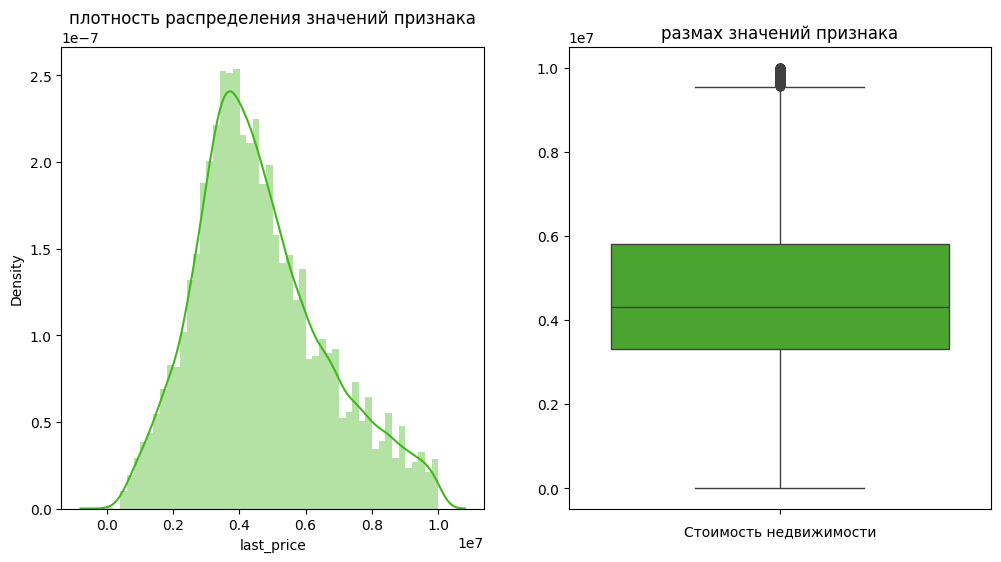

In [97]:
# парные диаграммы признака `last_price`
# поскольку абсолютное большинство сделок находятся в ценовом диапазоне до 10 000 000 руб, 
# сделаем соответствующий срез и его визуализацию
price_detailed = df.query('last_price < 10000000')

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title('плотность распределения значений признака')
sns.distplot(price_detailed['last_price'], color='#42b71d')

plt.subplot(1,2,2)
plt.title('размах значений признака')
sns.boxplot(y=price_detailed['last_price'], color='#42b71d').set(ylabel='', xlabel='Стоимость недвижимости')

plt.show()

In [98]:
# описательная статистика по признаку
df['last_price'].describe().astype(int)

count        23691
mean       6542277
std       10888742
min          12190
25%        3400000
50%        4650000
75%        6800000
max      763000000
Name: last_price, dtype: int32

In [99]:
# медианное значение признака
df['last_price'].median()

4650000.0

In [100]:
# выявление некорректных значений признака
df[df['last_price'] == df['last_price'].min()]

,locality_name,last_price,total_area,living_area,kitchen_area,rooms,ceiling_height,balcony,is_apartment,studio,...,cityCenters_nearest,airports_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,total_images,first_day_exposition,days_exposition,cityCenters_category
8792,Санкт-Петербург,12190.0,109.0,32.0,40.5,2,2.75,0,False,False,...,9176.0,36421.0,1,805,0,3000,7,2019-03-20,8.0,удалённые районы города


In [101]:
# замена некорректного значения в тыс.руб. на корректное значение в руб.
df['last_price'] = df['last_price'].replace(12190.0, 12190000.0)

In [102]:
# количество сделок в ценовых сегментах
print('Люксовый сегмент:', df.query('last_price > 10000000').shape[0], 'сделка.')
print('Средний сегмент:', df.query('last_price >= 4650000 and last_price <= 10000000').shape[0], 'сделка.')
print('Экономичный сегмент:', df.query('last_price < 4650000').shape[0], 'сделок.')

Люксовый сегмент: 2722 сделка.
Средний сегмент: 9135 сделка.
Экономичный сегмент: 11834 сделок.


**Вывод:** в датафрейме присутствует очень большой ценовой диапазон от 12 190 руб. до 763 000 000 руб. Вызывает сомнение корректность указанного минимального значения сделки. Мы установили, что это строка `df.loc[8789]` содержит информацию о продаже картиры площадью 109 кв.м в Санкт-Петербурге. Предположим, что это ошибка ввода данных пользователем ввиду незнания единиц измерения, и заменим это значение на 12 190 000 руб. Данные по признаку `last_price` скорректированы, удалений аномалий не требуется. 

В люксовом сегменте присутствуют 2 285 квартир стоимостью от 11 000 00 руб. до 763 000 000 руб. Это 9.5% всех записей в датафрейме. Средний ценовой сегмент составляют квартиры стоимостью от 4 650 000 до 11 000 000 рублей. Насчитывается 9 449 записей в этом виде сделок, или 40% всех записей датафрейма. Экономичный ценовой сегмент представлен сделками в диапазоне до 4 650 000 руб. Это самый мощный сегмент данных, который насчитывает 11 957 единиц или 50.5% всех записей датафрейма.

#### 2.4.2. Аномальные значения признаков `total_area`, `living_area`, `kitchen_area`

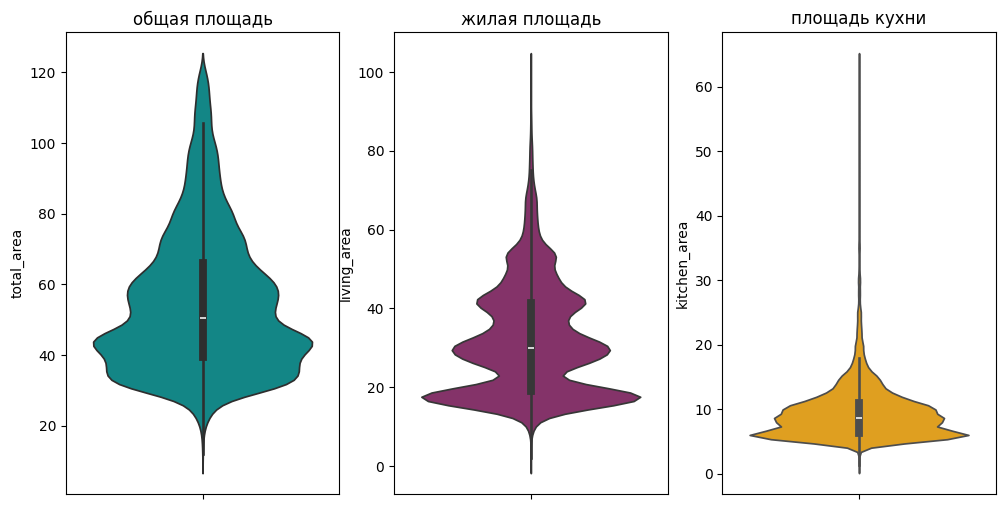

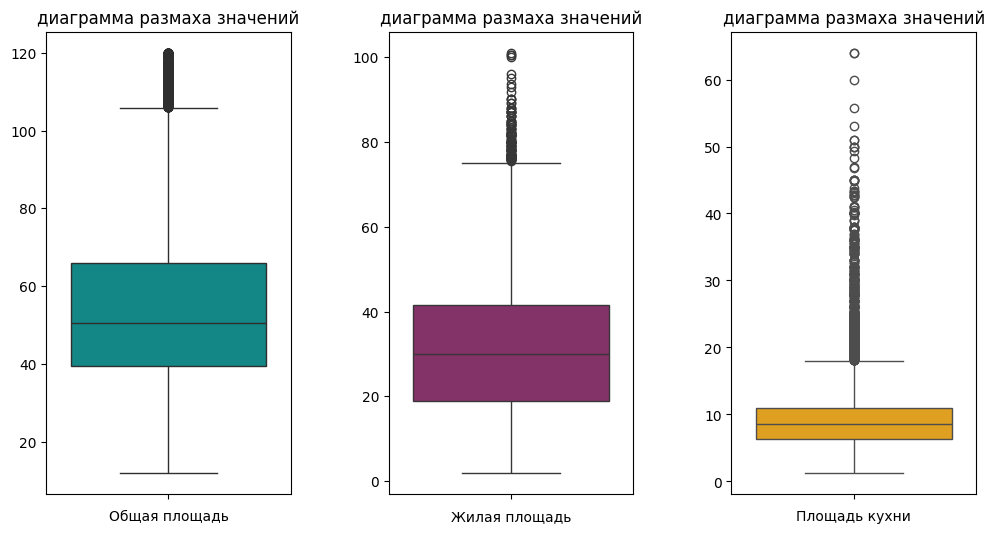

In [103]:
# диаграммы оценки плотности распределения значений площадей

# за пределами значений общей площади 200 кв.м начинаются значения, характерные для люксового сегмента
# средний (в том числе средний высокий) ценовой сегмент ограничивается общей площадью 120 кв.м
# сделаем срез по этому условию и построим диаграммы
area_detailed = df.query('total_area <= 120')

plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
plt.title('общая площадь')
sns.violinplot(y=area_detailed['total_area'], color='#009999')

plt.subplot(1,3,2)
plt.title('жилая площадь')
sns.violinplot(y=area_detailed['living_area'], color='#92256E')

plt.subplot(1,3,3)
plt.title('площадь кухни')
sns.violinplot(y=area_detailed['kitchen_area'], color='#FFAA00')

plt.show()

plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
plt.title('диаграмма размаха значений')
sns.boxplot(y=area_detailed['total_area'], color='#009999').set(ylabel='', xlabel='Общая площадь')

plt.subplot(1,3,2)
plt.title('диаграмма размаха значений')
sns.boxplot(y=area_detailed['living_area'], color='#92256E').set(ylabel='', xlabel='Жилая площадь')

plt.subplot(1,3,3)
plt.title('диаграмма размаха значений')
sns.boxplot(y=area_detailed['kitchen_area'], color='#FFAA00').set(ylabel='', xlabel='Площадь кухни')
plt.subplots_adjust(wspace=0.4)
plt.show()

In [104]:
# описательная статистика по признакам
df[['total_area', 'living_area', 'kitchen_area']].describe().astype(int)

,total_area,living_area,kitchen_area
count,23691,23691,23691
mean,60,34,10
std,35,21,5
min,12,2,1
25%,40,19,6
50%,52,30,9
75%,69,42,11
max,900,409,112


In [105]:
# медианное значение признаков
df[['total_area', 'living_area', 'kitchen_area']].median()

total_area      52.0
living_area     30.3
kitchen_area     9.0
dtype: float64

In [106]:
# выявление некорректных значений жилой площади
df[df['living_area'] == df['living_area'].min()]

,locality_name,last_price,total_area,living_area,kitchen_area,rooms,ceiling_height,balcony,is_apartment,studio,...,cityCenters_nearest,airports_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,total_images,first_day_exposition,days_exposition,cityCenters_category
13914,Санкт-Петербург,6350000.0,52.0,2.0,9.0,2,3.00,0,False,False,...,6521.000000,32453.000000,0,3000,1,1012,20,2018-02-06,91.0,удалённые районы города
21752,поселок Мурино,2330000.0,23.0,2.0,5.0,0,2.62,0,False,True,...,13686.938457,29494.466883,0,5000,0,5000,0,2018-01-01,66.0,пригородные районы


Полученные строки свидетельствуют о высокой вероятности допущенной механической ошибки пользователя при вводе значений. Так, вместо цифры `20` была допущена типичная опечатка, которая привела к появлению усечённого до `2.0` значения площади. Проверим остальные минимальные значения и заменим. Также полагаем важным учесть, что большая часть квартир, представленных в датафрейме, относится к советскому жилому фонду, где в "хрущёвках" на 6 кв.м приходились на 3 проживающих.

In [107]:
# заменим значения до минимальных размеров жилой площади
df.loc[(df['living_area'] < 6), 'living_area'] = 6.0

Также выполним проверку численного превосходства общей площади квартиры сумме жилой площади и площади кухни.

In [108]:
# выявление некорректных значений признака `total_area`
anomal_total_area = df.query('(kitchen_area + living_area ) > total_area')
print('Всего', anomal_total_area.shape[0], 'строк с некорректными данными по площадям квартиры.')

Всего 548 строк с некорректными данными по площадям квартиры.


In [109]:
# создадим индекс квартир с некорректными значениями признака `total_area`
anomal_total_area_index = anomal_total_area.index

In [110]:
# удаляем из датафрейма эти квартиры по индексу
df.drop(anomal_total_area_index, inplace=True)

Изучим значения площади кухни и выявим аномальные отклонения.

In [111]:
# поиск аномально малых значений площади кухни 
df.loc[(df['kitchen_area'] < 5)].shape[0]

104

In [112]:
# удаление некорректных значений площади кухни за исключением квартир-студий и квартир с открытой планировкой
df.drop(df[~(df.studio | df.open_plan) & (df.kitchen_area < 5)].index, inplace=True)

In [113]:
# проверяем результат удаления
df.query('~(studio | open_plan) & (kitchen_area < 5)')

,locality_name,last_price,total_area,living_area,kitchen_area,rooms,ceiling_height,balcony,is_apartment,studio,...,cityCenters_nearest,airports_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,total_images,first_day_exposition,days_exposition,cityCenters_category


**Вывод:** в группе взаимосвязанных признаков, описывающих ту или иную площадь квартиры, мы видим наиболее равномерное распределение данных по признаку `total_area` и `kitchen_area`. При детальном изучении графиков ярко выделяются 2 сильно "пережатые" области значений в диапазоне от 20 до 40 кв.м по признаку `living_area` при общей площади квартиры от 40 до 60 кв.м и площади кухни незначительно больше нормативных 5 - 6 кв.м. Это говорит о том, что перед нами квартиры в элитных новостройках, где под вспомогательные помещения, балконы, лоджии, встроенную мебель отводятся гораздо б***о***льшие площади, чем в советском жилом фонде.

Пдощадь квартиры является одним из ключевых признаков, по которому потенциальный покупатель проводит отбор и оценку жилья. В датафрейме в экономичной ценовой категории находятся 11 425 квартир площадью до 52 кв.м., что составляет 49.6% от общего числа записей. Средний низкий ценовой сегмент занимают 5 900 квартир площадью от 52 кв.м до 70 кв.м., это 25.6% всех объявлений. Средний высокий представлен жильём площадью от 70 кв.м до 120 кв.м. - этим параметрам соответствуют 4 642 квартиры, или 20.1% данных. Выше этого значения находится элитная недвижимость площадью до 900 кв.м. Таких записей в датафрейме незначительное количество: 1 061 или 4.6%, но они являются ценным источником информации, подтверждающим полноту представленной недвижимости всех типов на рынке Санкт-Петербурга и Ленинградской области. В целом, характер взаимосвязи этих 3 признаков в той или иной степени соотносится с государственной градостроительной политикой и описывает потребительские параметры жилого фонда того или иного периода возведения. 

#### 2.4.3. Аномальные значения признака `'rooms'`

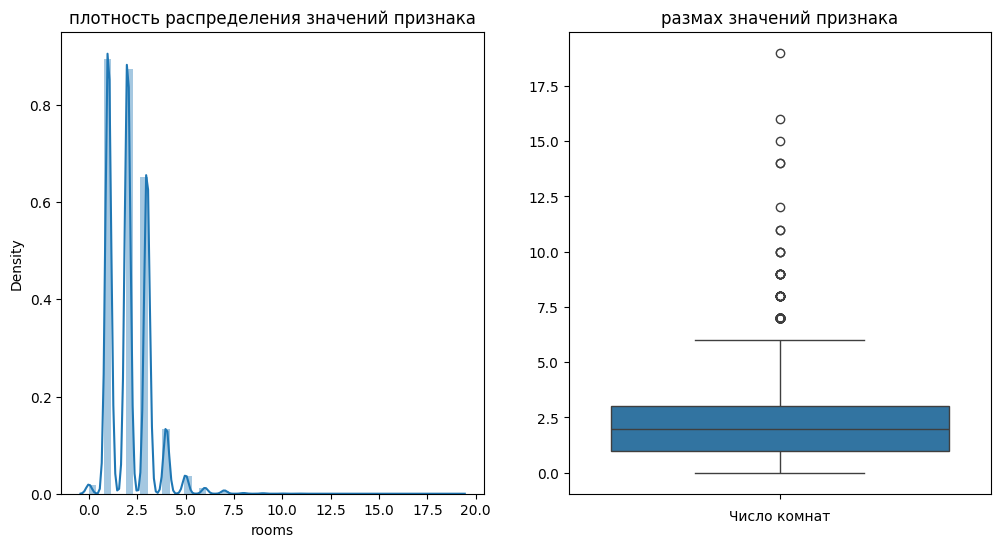

In [114]:
# парные диаграммы признака 'rooms'
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title('плотность распределения значений признака')
sns.distplot(df['rooms'])

plt.subplot(1,2,2)
plt.title('размах значений признака')
sns.boxplot(y=df['rooms']).set(ylabel='', xlabel='Число комнат')

plt.show()

In [115]:
# описательная статистика по признаку
df['rooms'].describe().astype(int)

count    23039
mean         2
std          1
min          0
25%          1
50%          2
75%          3
max         19
Name: rooms, dtype: int32

In [116]:
# медианное значение признака
df['rooms'].median()

2.0

In [117]:
# проверим значение признака для квартир-студий
# в этом типе жилья число комнат должно быть равным нулю 
df[df['studio']]['rooms'].value_counts()

rooms
0    112
1      9
Name: count, dtype: int64

In [118]:
# проверим значение признака для квартир с открытой планировкой
# в этом типе жилья число комнат должно быть равным нулю 
df[df['open_plan']]['rooms'].value_counts()

rooms
0    49
1     3
3     2
2     1
5     1
4     1
Name: count, dtype: int64

Выполним замену некорректных значений по каждому из этих типов квартир.

In [119]:
# замена некорректных значений признака
df.loc[(df['studio'] == True) & (df['rooms'] == 1), 'rooms'] = 0
df.loc[(df['open_plan'] == True) & (df['rooms'] > 0), 'rooms'] = 0

In [120]:
# проверим значение признака для многокомнатых квартир
anomal_rooms_index = df.query('rooms >= 5 and total_area < 84')
anomal_rooms_index

,locality_name,last_price,total_area,living_area,kitchen_area,rooms,ceiling_height,balcony,is_apartment,studio,...,cityCenters_nearest,airports_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,total_images,first_day_exposition,days_exposition,cityCenters_category
542,Кингисепп,1750000.0,40.0,28.6,5.0,5,2.60,0,False,False,...,115321.451725,105499.825538,0,5000,0,5000,8,2016-04-28,127.0,Ленинградская область
2736,Санкт-Петербург,5200000.0,72.0,59.0,6.5,5,2.62,0,False,False,...,15009.000000,14237.000000,1,1362,2,555,7,2015-10-16,362.0,пригородные районы
11222,Санкт-Петербург,4900000.0,67.0,28.0,7.0,5,2.50,0,False,False,...,13614.000000,12287.000000,0,3000,1,611,15,2018-03-19,107.0,пригородные районы
19369,Санкт-Петербург,7500000.0,62.2,55.1,6.0,5,3.02,0,False,False,...,3249.000000,24920.000000,2,84,1,533,6,2014-12-18,694.0,центральные районы города
20394,Санкт-Петербург,4650000.0,66.3,50.9,6.8,5,2.70,0,False,False,...,10913.000000,12422.000000,0,3000,1,946,1,2017-10-13,117.0,удалённые районы города
23094,Санкт-Петербург,5800000.0,66.0,55.5,6.0,5,2.70,0,False,False,...,11933.000000,12007.000000,0,3000,0,3000,0,2017-06-09,21.0,удалённые районы города
23297,Санкт-Петербург,4950000.0,67.0,51.2,7.5,5,2.60,0,False,False,...,12035.000000,12109.000000,0,3000,0,3000,9,2018-10-29,89.0,пригородные районы


В датафрейме присутствует 515 многокомнатных квартир (от 5 комнат и более), из них 7 квартир не соответствуют установленным нормативам жилья в части общей площади квартиры: организация 5 комнат и более допускается в жилье общей площадью более 84 кв.м. Удалим строки с некорректными данными.

In [121]:
# создадим индекс квартир с некорректным числом комнат
anomal_rooms_index = anomal_rooms_index.index

In [122]:
# удаляем из датафрейма эти квартиры по индексу
df.drop(anomal_rooms_index, inplace=True)

In [123]:
# посчитаем количество комнат в квартирах, выставленных на продажу
df.pivot_table(index='rooms', values='locality_name', aggfunc='count')

,locality_name
rooms,
0,178
1,7824
2,7658
3,5703
4,1161
5,316
6,103
7,58
8,12


**Вывод:** нами выполнена проверка значений признака количества квартир, выявлены и удалены строки с некорректными данными. Самыми многочисленными и популярными объектами купли-продажи являются ожидаемо `однокомнатные` и `двухкомнатные` квартиры. По ним в датафрейме суммарно присутствует 15 473 объявления или 67.2%. Третье место по популярности занимают `трёхкомнатные` квартиры - их 5 701 или 24.7%. `Четырёхкомнтатные` квартиры как объект сделки с недвижимостью встречаются ощутимо реже, таких предложений на рынке в указанный период было зафиксировано всего 1 161 или 5.5%. `Многокомнатные` квартиры, равно как и `квартиры-студии` и `квартиры с открытой планировкой`, безусловно, находят своего покупателя, но присутствуют на рынке недвижимости Санкт-Петербурга и Ленинградской области в малом количестве: от 178 до 316 объявлений или 1.4%. Многокомнатные квартиры с `7 комнатами и более` являются буквально штучным товаром: 89 объявлений из общего массива данных в 23 021 записей или 0.4%.

#### 2.4.4. Аномальные значения признака `'ceiling_height'`

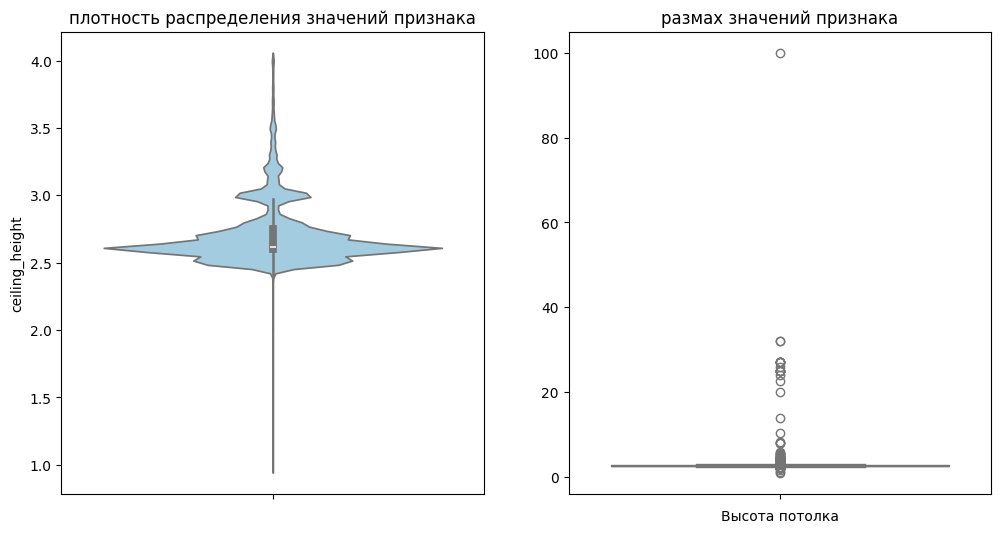

In [124]:
# парные диаграммы признака 'ceiling_height'
plt.figure(figsize=(12,6))

# срез данных по типовой высоте 4 м
ceil_delailed = df.query('ceiling_height <= 4')

plt.subplot(1,2,1)
plt.title('плотность распределения значений признака')
sns.violinplot(y=ceil_delailed['ceiling_height'], color='#9acfeb')

plt.subplot(1,2,2)
plt.title('размах значений признака')
sns.boxplot(y=df['ceiling_height'], color='#9acfeb').set(ylabel='', xlabel='Высота потолка')

plt.show()

In [125]:
# описательная статистика по признаку
df['ceiling_height'].describe().round(2)

count    23032.00
mean         2.73
std          0.98
min          1.00
25%          2.60
50%          2.62
75%          2.75
max        100.00
Name: ceiling_height, dtype: float64

In [126]:
# медианное значение признака
df['ceiling_height'].median()

2.62

In [127]:
# выявление некорректных значений признака
# высота потолка 100 м это явная опечатка, заменим это значение
df.loc[(df['ceiling_height'] == 100), 'ceiling_height'] = 10

In [128]:
# выявление некорректных значений признака
# удаляем 13 строк с квартирами, высота потолка в которых меньше 2.1 м
ceil_low = df.query('ceiling_height < 2.1')

In [129]:
# создаём индекс таких квартир
ceil_low_index = ceil_low.index

In [130]:
# удаляем из датафрейма по индексу квартиры с аномально низкими потолками
df.drop(ceil_low_index, inplace=True)

Проверим оставшиеся значения признака. В датасете остались аномальные высоты потолков с очевидными опечатками и искажениями. Обработаем эти значения.

In [131]:
# выявление некорректных значений признака
ceil_high = df.query('ceiling_height <= 20.0 and ceiling_height >= 10.30')

In [132]:
# создаём индекс таких квартир
ceil_high_index = ceil_high.index

In [133]:
# удаляем из датафрейма по индексу квартиры с аномально высокими потолками
df.drop(ceil_high_index, inplace=True)

In [134]:
# с помощью цикла перебираем все аномальные двухзначные высоты потолков и заменяем их
for i in df['ceiling_height']:
    if i > 10:
        df['ceiling_height'] = df['ceiling_height'].replace(i, i/10)

In [135]:
# проверяем значения признака после очистки от аномалий
df['ceiling_height'].describe().round(2)

count    23016.00
mean         2.71
std          0.25
min          2.25
25%          2.60
50%          2.62
75%          2.75
max         10.00
Name: ceiling_height, dtype: float64

**Вывод:** в результате выявления аномальных значений по признаку `ceiling_height` были выявлены искажённые данные, которые были заменены или удалены. Минимальная высота потолка составляет 2.25 м, максимальная - 10 м. Средние значения, характерные для абсолютного большинства квартир находятся в очень узком диапазоне от 2.6 м до 2.75 м. Такая высота потолка встречается в 14 434 объявлениях и составляет 62.74% всех записей. Чуть большей высотой потолка от 2.75 до 3 м включительно обладают 3 490 квартир (15.2% объявлений). Эту условную вторую ступень с ними делят квартиры с низкими потолками от 2.25 до 2.5 включительно, это 3 443 квартир (15% объявлений). Малочисленное для этого датафрейма элитное жильё характеризуется потолками выше 3 метров и присутствует в количестве 1 638 квартир (7.1% объявлений). Для люксовой недвижимости тренд последних лет - создание не только второго, но и третьего яруса квартиры с дополнительным освещением, поэтому высота потолка здесь может достигать 10 м.

#### 2.4.5. Аномальные значения признака `'balcony'`

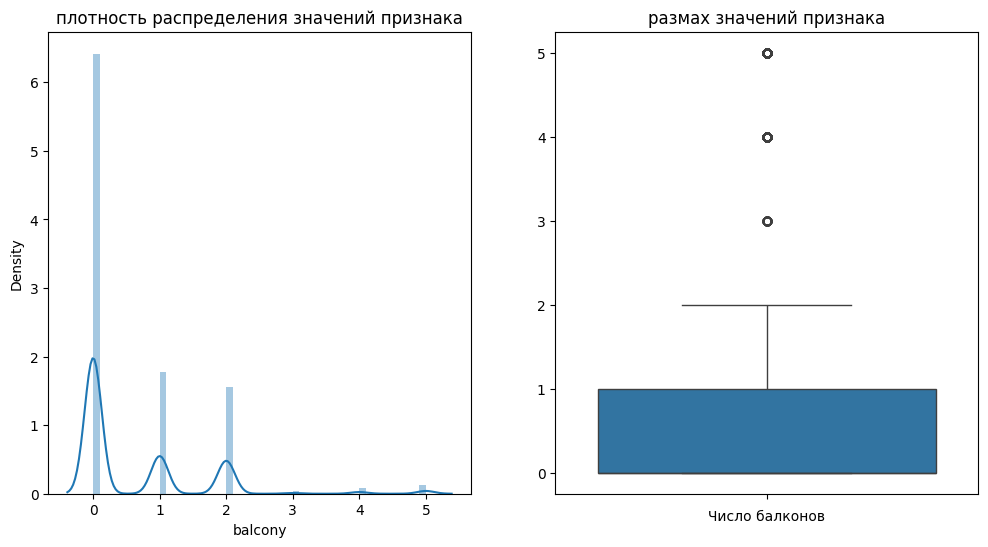

In [136]:
# парные диаграммы признака 'balcony'
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title('плотность распределения значений признака')
sns.distplot(df['balcony'])

plt.subplot(1,2,2)
plt.title('размах значений признака')
sns.boxplot(y=df['balcony']).set(ylabel='', xlabel='Число балконов')

plt.show()

In [137]:
# описательная статистика по признаку
df['balcony'].describe().astype(int)

count    23016
mean         0
std          0
min          0
25%          0
50%          0
75%          1
max          5
Name: balcony, dtype: int32

In [138]:
# медианное значение признака
df['balcony'].median()

0.0

In [139]:
# выявление некорректных значений признака
df['balcony'].max()

5

В данных имеются 300 квартир с 5 балконами. В соответствии с действующей нормативной документацией и общероссийской строительной практикой, мы можем сформировать ряд условий, которые помогут выявить некорректные данные в этом конкретном случае:

* 1 балкон для каждой 1 комнаты в многокомнатной квартире
* 5 балконов правдиво в случае, если общая площадь квартиры в 5 комнат от 84 кв.м до 96 кв.м
* 5 балконов правдиво в случае, общая площадь квартиры в 6 комнат от 103 кв.м до 109 кв.м

Проверим данные на соответствие этим условиям.

In [140]:
# срез данных по условию
df.query('balcony == 5').head()

,locality_name,last_price,total_area,living_area,kitchen_area,rooms,ceiling_height,balcony,is_apartment,studio,...,cityCenters_nearest,airports_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,total_images,first_day_exposition,days_exposition,cityCenters_category
41,Санкт-Петербург,7900000.0,74.0,59.0,12.0,3,2.62,5,False,False,...,12612.0,37715.0,1,725,1,759,16,2016-05-04,179.000000,пригородные районы
42,Петергоф,22000000.0,161.8,80.9,17.6,4,2.80,5,False,False,...,30605.0,35416.0,2,47,1,907,13,2015-07-08,987.000000,Ленинградская область
116,Санкт-Петербург,10999000.0,97.2,53.5,18.3,3,2.50,5,False,False,...,21138.0,19426.0,0,3000,2,390,18,2017-11-13,394.000000,Ленинградская область
267,Санкт-Петербург,14700000.0,120.0,63.0,16.0,3,2.75,5,False,False,...,10430.0,39204.0,2,627,3,77,2,2018-09-07,61.000000,удалённые районы города
311,Санкт-Петербург,12500000.0,86.0,47.0,13.0,3,2.80,5,False,False,...,15686.0,52192.0,0,3000,1,441,20,2018-10-19,183.064351,пригородные районы


In [141]:
# заменим балконы по условию
df.loc[(df['balcony'] == 5) & (df['rooms'] == 1), 'balcony'] = 1
df.loc[(df['balcony'] == 5) & (df['rooms'] == 2), 'balcony'] = 2
df.loc[(df['balcony'] == 5) & (df['rooms'] == 3), 'balcony'] = 3
df.loc[(df['balcony'] == 5) & (df['rooms'] == 4), 'balcony'] = 4

In [142]:
# проверка результатов замены и вывод среза датафрейма по условию
df.query('balcony == 5')

,locality_name,last_price,total_area,living_area,kitchen_area,rooms,ceiling_height,balcony,is_apartment,studio,...,cityCenters_nearest,airports_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,total_images,first_day_exposition,days_exposition,cityCenters_category
1307,Санкт-Петербург,26558000.0,152.38,81.5,14.61,5,2.75,5,False,False,...,10364.0,39140.0000,2,173,3,196,20,2017-01-11,625.000000,удалённые районы города
6508,Санкт-Петербург,30000000.0,198.90,109.0,23.00,5,3.10,5,False,False,...,10263.0,10015.0000,2,587,0,3000,9,2017-11-08,524.000000,удалённые районы города
10683,Санкт-Петербург,32894076.0,364.70,100.5,6.00,7,3.32,5,False,False,...,12242.0,15692.6665,0,5000,0,5000,6,2019-05-02,183.064351,пригородные районы
14483,Санкт-Петербург,9900000.0,183.00,112.0,14.00,5,2.83,5,False,False,...,11082.0,10997.0000,0,3000,1,418,3,2017-02-09,129.000000,удалённые районы города
15874,Санкт-Петербург,20500000.0,165.20,112.2,16.50,5,2.91,5,False,False,...,9782.0,37310.0000,1,497,0,3000,17,2018-09-03,183.064351,удалённые районы города
21825,Санкт-Петербург,21900000.0,220.00,110.0,17.00,5,2.62,5,False,False,...,12219.0,37322.0000,1,739,2,752,17,2016-05-04,125.000000,пригородные районы
21948,Санкт-Петербург,130000000.0,431.00,220.0,20.00,7,3.70,5,False,False,...,12242.0,15692.6665,0,5000,0,5000,19,2017-10-02,161.000000,пригородные районы


После обработки признака мы видим, что сформировалась малочисленная группа из 7 квартир, по своим потребительским характеристикам относящихся к люксовому сегменту рынка недвижимости. Теперь проясним для себя положение дел по оставшемуся диапазону значений. Количество балконов (выступающих на фасаде) или лоджий (встроенных в объём жилого дома) не может быть больше количества комнат в квартире, будь это элитное жильё или типичная "хрущёвка". Отфильтруем из обработки квартиры-студии и квартиры со свободной планировкой и воспользуемся той же логикой количества комнат, площадей и балконов.

In [143]:
# срезаем данные по условию:
# квартира не студия, не открытой планировки, а количество балконов больше количества комнат
balcs = df[(~df['studio']) & (~df['open_plan']) & (df['balcony'] > df['rooms'])]

In [144]:
balcs.shape[0]

1621

В срезе данных мы видим 1621 строку с некорректными данными. Выполним замену по комплексному условию.

In [145]:
# заменим балконы по условию
df.loc[(~df['studio']) & (~df['open_plan']) & (df['balcony'] > df['rooms']) & (df['rooms'] == 1), 'balcony'] = 1
df.loc[(~df['studio']) & (~df['open_plan']) & (df['balcony'] > df['rooms']) & (df['rooms'] == 2), 'balcony'] = 2
df.loc[(~df['studio']) & (~df['open_plan']) & (df['balcony'] > df['rooms']) & (df['rooms'] == 3), 'balcony'] = 3
df.loc[(~df['studio']) & (~df['open_plan']) & (df['balcony'] > df['rooms']) & (df['rooms'] == 4), 'balcony'] = 4

In [146]:
# посчитаем количество балконов в квартирах
df.pivot_table(index='balcony', values='locality_name', aggfunc='count')

,locality_name
balcony,
0,14772
1,5581
2,2311
3,299
4,46
5,7


**Вывод:** балкон — это не только роскошь, но ещё и место для хранения лыж, солений, санок и засохшего фикуса. С наличием этой опции повезло обладателям 8 242 квартир, проданных на Яндекс Недвижимости Санкт-Петербурга в 2014 - 2019 годах. Почти в четверти квартир есть 1 балкон (5580 объявлений тому подтверждение). Характерные для новостроек второй половины 1960-х годов 2 балкона присутствуют в 2 310 квартирах, но, если быть совсем точным, речь здесь идёт не о балконах, а о лоджиях. На бумаге разница невелика, на деле есть существенные преимущества в утеплении этого пространства и включении его в жилую площадь. Элитная недвижимость может удивить нас не только баснословной стоимостью и интересной планировкой, но и количеством балконов: 3, 4, а то и все 5 балконов мы можем отметить в 352 объявлениях, что составляет порядка 2% от общего массива данных. С необходимостью организации системы хранения вещей придётся столкнуться 14 673 покупателям квартир (64.2% от всего массива данных). Сразу избавимся от стереотипа "нет балкона = капсульная квартира на одного человека". В числе квартир без балкона присутствуют большие квартиры-лофты и многоуровневые квартиры, расположенные на последних этажах.

#### 2.4.6. Аномальные значения признаков `'floor'`, `'floors_total'`

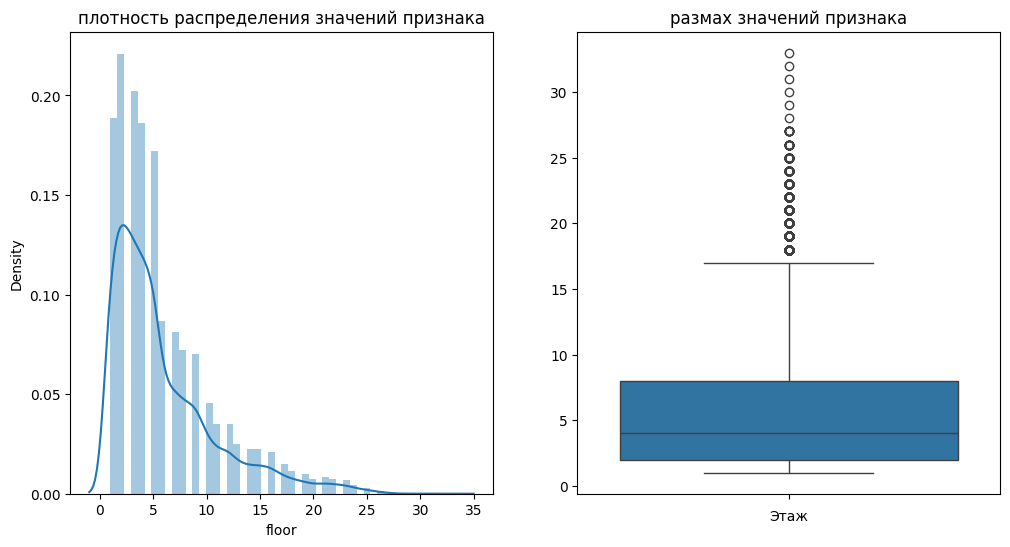

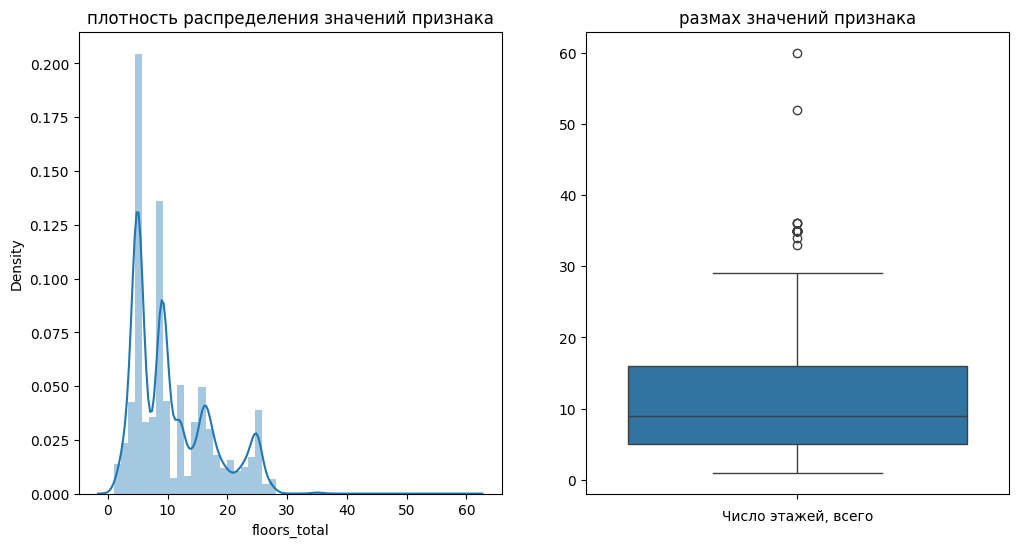

In [147]:
# парные диаграммы признака 'floor', 'floors_total'
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('плотность распределения значений признака')
sns.distplot(df['floor'])

plt.subplot(1,2,2)
plt.title('размах значений признака')
sns.boxplot(y=df['floor']).set(ylabel='', xlabel='Этаж')
plt.show()

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('плотность распределения значений признака')
sns.distplot(df['floors_total'])

plt.subplot(1,2,2)
plt.title('размах значений признака')
sns.boxplot(y=df['floors_total']).set(ylabel='', xlabel='Число этажей, всего')
plt.show()

In [148]:
# описательная статистика по признаку
df[['floor', 'floors_total']].describe().astype(int)

,floor,floors_total
count,23016,23016
mean,5,10
std,4,6
min,1,1
25%,2,5
50%,4,9
75%,8,16
max,33,60


In [149]:
# медианное значение признака
df[['floor', 'floors_total']].median()

floor           4.0
floors_total    9.0
dtype: float64

На первый взгляд значение признака `floor` распределено нормально, а в признаке `floors_total` судя по диаграмме плотности распределения значений, есть некорректные данные.

In [150]:
# выявляем некорректные данные
df['floors_total'].max()

60

На территории Кронштадта нет 60-этажных высотных зданий. Налицо опечатка, которую мы можем заменить.

In [151]:
# замена некорректных значений признака 
df.loc[(df['floors_total'] == 60), 'floors_total'] = 6

Проверим наличие квартир, у которых указанный этаж превышает общее количество этажей в здании.

In [152]:
# выявляем некорректные данные
df.loc[(df['floor'] > df['floors_total'])].shape[0]

37

Таких строк всего 70, и ранее по ним было выполнено заполнение пропусков медианной этажностью зданий по конкретной локации. Мы можем выполнить замену значений исходя из следующей логики: указанный этаж в карточке объявления является последним, поэтому этот факт не был отмечен пользователем дополнительно.

In [153]:
# замена некорректных значений признака 
df.loc[(df['floor'] > df['floors_total']), 'floors_total'] = df['floor']

In [154]:
# посчитаем соотношение этажности здания и этажа продаваемой квартиры
df.pivot_table(index='floors_total', values='floor', aggfunc='count').sort_values(by='floor')

,floor
floors_total,
52,1
34,1
33,1
29,1
36,3
28,21
1,21
35,22
26,123


**Вывод:** в полученных количественных значениях мы видим очередное подтверждение основных тенденций на рынке недвижимости Санкт-Петербурга в период 2014-2019 годов. Большое количество объявлений сообщает о продаже квартиры `на 2 или 3 этаже` в типовой `5-этажке` и `9-этажке`. Такие объявления по 5-этажкам встречаются 5 532 раз и по 9-этажкам 3 687 раз.

`Малоквартирные дома 1940-1950-х годов постройки высотностью до 4 этажей` выставлены на продажу в 2 168 объявлениях. По своей сути, это старый жилой фонд, который потенциально может быть в скором времени признан ветхим, аварийным и подлежать сносу: но на фотографиях опрятной и светлой квартиры едва ли будет сгнивший фундамент или запах из подтекающих подвальных труб.

`Кирпичные многоэтажки высотой в 12 и 16 этажей`, построенные по типовым точечным проектам во второй половине 1960-1970-х гг. делят между собой третью строчку условного рейтинга и представлены 1364 и 1351 объявлениями о продаже. Остальные дома разной этажности представлены в малых долях и по количеству не превышают 1165 объявлений. 

Ощутимый провал в значениях признаков наступает после 28 этажа, и этому есть несколько причин. Во-первых, неустойчивые грунты, насыщенные подземными водами, делают строительство высоких и тяжелых сооружений технологически сложным и затратным. Во-вторых, существует регламент высотности, который запрещает возводить здания выше определенного уровня. Особенно серьезно за его соблюдением следят в историческом центре. В-третьих, в Санкт-Петербурге как ни в одном другом городе России активные градозащитники, готовые биться с властями и застройщиками за каждый дом и каждый метр. Санкт-Петербург настолько консервативен в этом вопросе, что на протяжении 286 лет лидерство по высоте удерживал Петропавловский собор, построенный еще в XVIII веке. Словно символ перемен, самое высокое здание Европы появилось в Санкт-Петербурге только в 2018 году. Речь идёт о Лахта центре. С высотными многоквартирными комплексами Санкт-Петербурга дела обстоят аналогично: их пока очень мало. В текущем датафрейме за период с 2014 по 2019 год мы можем насчитать всего 51 квартиру в высотных домах, в общей массе данных это 0.2%.

#### 2.4.7. Аномальные значения признаков `'cityCenters_nearest'`, `'airports_nearest'`

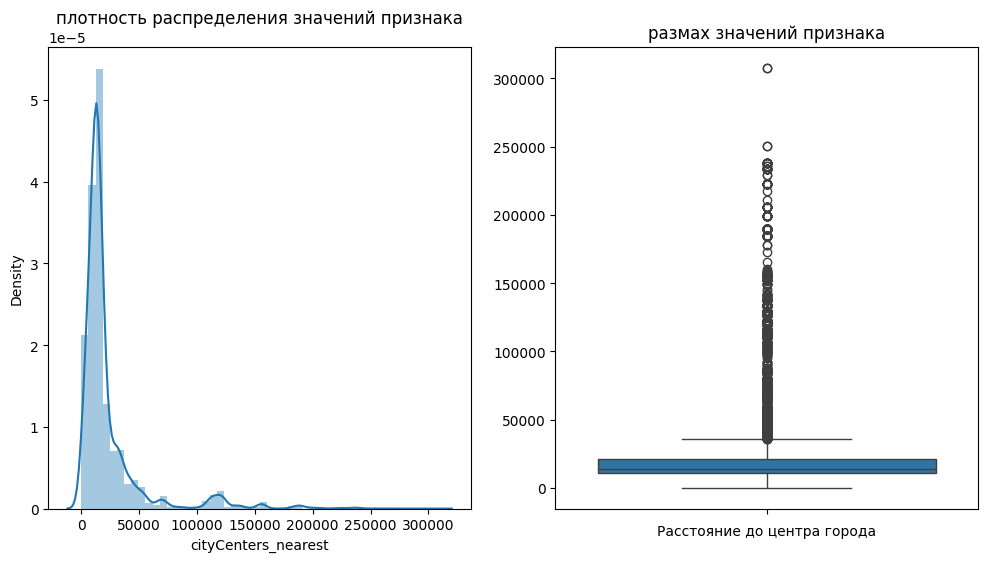

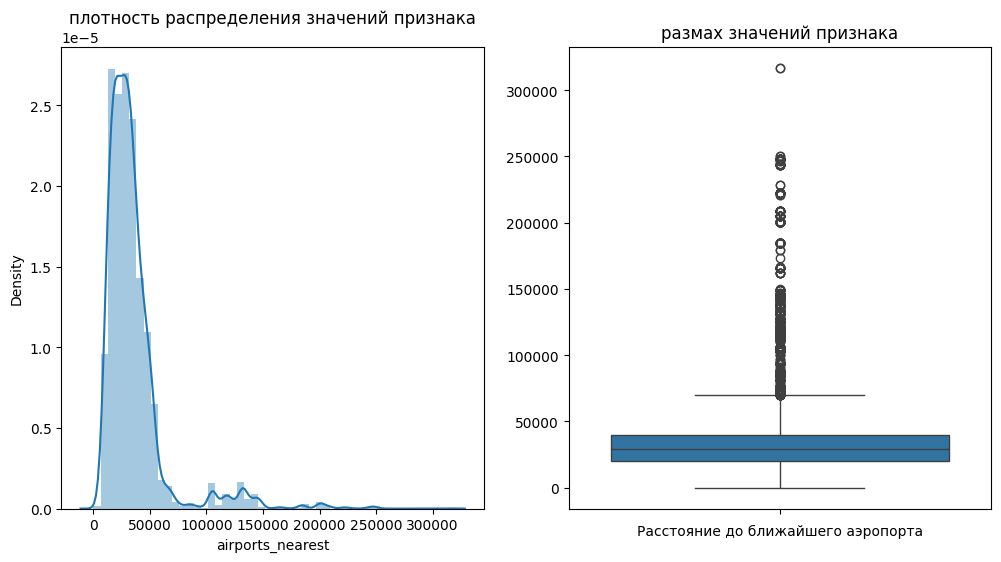

In [155]:
# парные диаграммы признака 'cityCenters_nearest'
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title('плотность распределения значений признака')
sns.distplot(df['cityCenters_nearest'])

plt.subplot(1,2,2)
plt.title('размах значений признака')
sns.boxplot(y = df['cityCenters_nearest']).set(ylabel='', xlabel='Расстояние до центра города')
plt.show()

# парные диаграммы признака 'airports_nearest'
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title('плотность распределения значений признака')
sns.distplot(df['airports_nearest'])

plt.subplot(1,2,2)
plt.title('размах значений признака')
sns.boxplot(y = df['airports_nearest']).set(ylabel='', xlabel='Расстояние до ближайшего аэропорта')
plt.show()

In [156]:
# описательная статистика по признаку
df[['cityCenters_nearest', 'airports_nearest']].describe().astype(int)

,cityCenters_nearest,airports_nearest
count,23016,23016
mean,23255,35238
std,29964,28243
min,181,0
25%,10881,19714
50%,14157,29494
75%,20917,39671
max,307987,317089


In [157]:
# медианное значение признака
df[['cityCenters_nearest', 'airports_nearest']].median()

cityCenters_nearest    14157.000000
airports_nearest       29494.466883
dtype: float64

In [158]:
# выявление некорректных значений признака
df['airports_nearest'].sort_values()

21080         0.000000
6609       6015.925826
7719       6015.925826
17732      6103.878378
7859       6103.878378
             ...      
5467     248082.104397
10453    250201.144520
10816    250201.144520
17949    317089.698656
10924    317089.698656
Name: airports_nearest, Length: 23016, dtype: float64

In [159]:
# замена значений восстановленными данными по признаку `cityCenters_nearest`
df.loc[(df['cityCenters_nearest'] == 22801.0), 'airports_nearest'] = 25200.0

In [160]:
df[['cityCenters_nearest', 'airports_nearest']].describe().astype(int)

,cityCenters_nearest,airports_nearest
count,23016,23016
mean,23255,35239
std,29964,28242
min,181,6015
25%,10881,19715
50%,14157,29494
75%,20917,39671
max,307987,317089


In [161]:
# сводная таблица с данными по распределению квартир в соответствии с удалённостью от Санкт-Петербурга
df.pivot_table(index='cityCenters_category', values='cityCenters_nearest', aggfunc='count')

,cityCenters_nearest
cityCenters_category,
Ленинградская область,7567
исторический центр города,520
пригородные районы,8147
удалённые районы города,4500
центральные районы города,2282


**Вывод:** данные по признакам расстояния до центра города и до ближайшего аэропорта распределены нормально, искажений и аномалий не выявлено. Была восстановлена 1 величина расстояния до ближайшего аэропорта. Количество квартир к продаже имеет обратную взаимосвязь с расстоянием от центра города Санкт-Петербург и нарастает по мере удаления от него. Так, в центральной части Санкт-Петербурга на продажу были выставлены 2 282 объекта, в удалённых районах города эта цифра уже вдвое больше и составляет 4 500 объявлений, в пригородных районах и в Ленинградской области количество сделок по купле-продаже примерно равно и составляет величину от 7 567 до 8 147. Ротационная воронка владельцев недвижимого имущества охватывает всю Ленинградскую область, и её спокойное тихое место, конечно, в самом сердце Санкт-Петербурга.

#### 2.4.8. Аномальные значения признаков `'parks_nearest'`, `'ponds_nearest'`, `'parks_around3000'`, `'ponds_around3000'` 

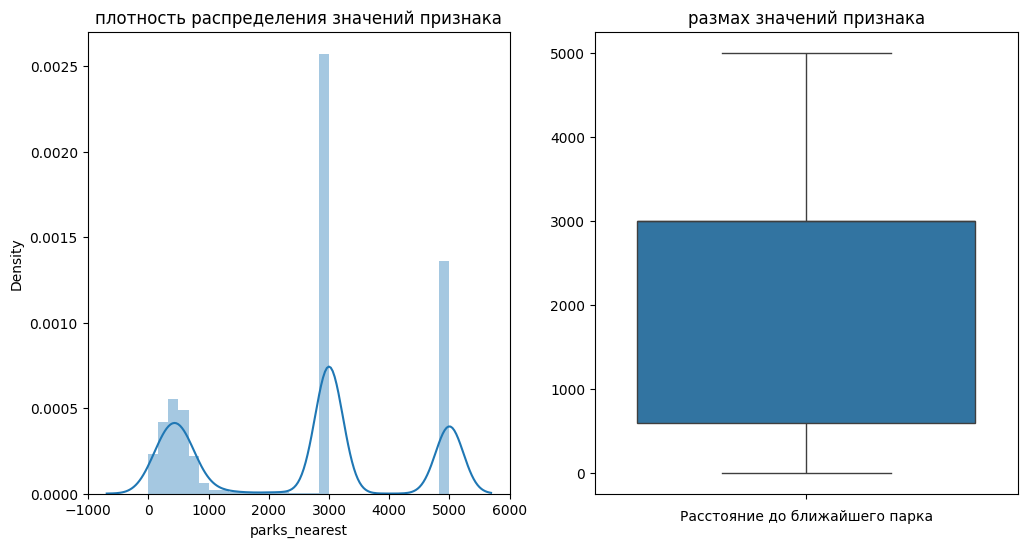

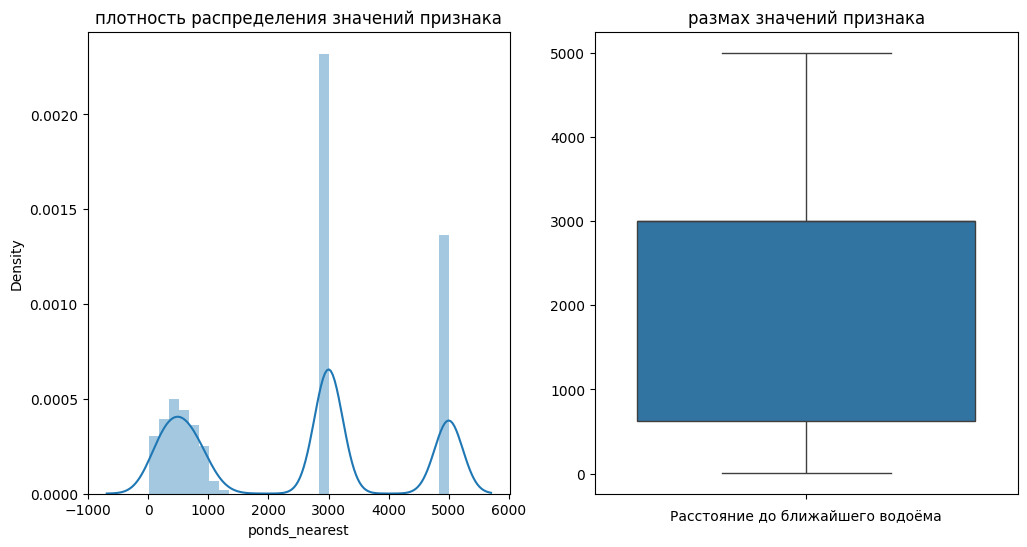

In [162]:
# парные диаграммы признака 'parks_nearest'
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('плотность распределения значений признака')
sns.distplot(df['parks_nearest'])

plt.subplot(1,2,2)
plt.title('размах значений признака')
sns.boxplot(y = df['parks_nearest']).set(ylabel='', xlabel='Расстояние до ближайшего парка')
plt.show()

# парные диаграммы признака 'ponds_nearest'
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('плотность распределения значений признака')
sns.distplot(df['ponds_nearest'])

plt.subplot(1,2,2)
plt.title('размах значений признака')
sns.boxplot(y = df['ponds_nearest']).set(ylabel='', xlabel='Расстояние до ближайшего водоёма')
plt.show()

In [163]:
# описательная статистика по признаку
df[['parks_nearest', 'ponds_nearest']].describe().astype(int)

,parks_nearest,ponds_nearest
count,23016,23016
mean,2589,2492
std,1717,1751
min,1,13
25%,595,630
50%,3000,3000
75%,3000,3000
max,5000,5000


In [164]:
# медианное значение признака
df[['parks_nearest', 'ponds_nearest']].median()

parks_nearest    3000.0
ponds_nearest    3000.0
dtype: float64

In [165]:
# выявляем некорректное значение признака `parks_nearest`
df['parks_nearest'].sort_values()

14622       1
11948       3
22933       4
9343        7
20190       9
         ... 
10090    5000
10093    5000
18035    5000
10059    5000
23690    5000
Name: parks_nearest, Length: 23016, dtype: int32

In [166]:
# заменяем некорректное значение
df.loc[(df['parks_nearest'] < 10), 'parks_nearest'] = 10

In [167]:
# количество объектов рядом с парками
df.query('parks_nearest <= 1000').shape[0]

7557

In [168]:
# срез данных по озеленению и благоустройству близлежащих территорий
df.query('parks_nearest <= 1000').groupby('cityCenters_category').count()

,locality_name,last_price,total_area,living_area,kitchen_area,rooms,ceiling_height,balcony,is_apartment,studio,...,floors_total,cityCenters_nearest,airports_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,total_images,first_day_exposition,days_exposition
cityCenters_category,,,,,,,,,,,,,,,,,,,,,
Ленинградская область,984,984,984,984,984,984,984,984,984,984,...,984,984,984,984,984,984,984,984,984,984
исторический центр города,430,430,430,430,430,430,430,430,430,430,...,430,430,430,430,430,430,430,430,430,430
пригородные районы,2317,2317,2317,2317,2317,2317,2317,2317,2317,2317,...,2317,2317,2317,2317,2317,2317,2317,2317,2317,2317
удалённые районы города,2513,2513,2513,2513,2513,2513,2513,2513,2513,2513,...,2513,2513,2513,2513,2513,2513,2513,2513,2513,2513
центральные районы города,1313,1313,1313,1313,1313,1313,1313,1313,1313,1313,...,1313,1313,1313,1313,1313,1313,1313,1313,1313,1313


In [169]:
# количество объектов рядом с водоёмами
df.query('ponds_nearest <= 1000').shape[0]

8581

In [170]:
# срез данных по водоёмам у близлежащих территорий
df.query('ponds_nearest <= 1000').groupby('cityCenters_category').count()

,locality_name,last_price,total_area,living_area,kitchen_area,rooms,ceiling_height,balcony,is_apartment,studio,...,floors_total,cityCenters_nearest,airports_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,total_images,first_day_exposition,days_exposition
cityCenters_category,,,,,,,,,,,,,,,,,,,,,
Ленинградская область,1895,1895,1895,1895,1895,1895,1895,1895,1895,1895,...,1895,1895,1895,1895,1895,1895,1895,1895,1895,1895
исторический центр города,495,495,495,495,495,495,495,495,495,495,...,495,495,495,495,495,495,495,495,495,495
пригородные районы,2596,2596,2596,2596,2596,2596,2596,2596,2596,2596,...,2596,2596,2596,2596,2596,2596,2596,2596,2596,2596
удалённые районы города,2121,2121,2121,2121,2121,2121,2121,2121,2121,2121,...,2121,2121,2121,2121,2121,2121,2121,2121,2121,2121
центральные районы города,1474,1474,1474,1474,1474,1474,1474,1474,1474,1474,...,1474,1474,1474,1474,1474,1474,1474,1474,1474,1474


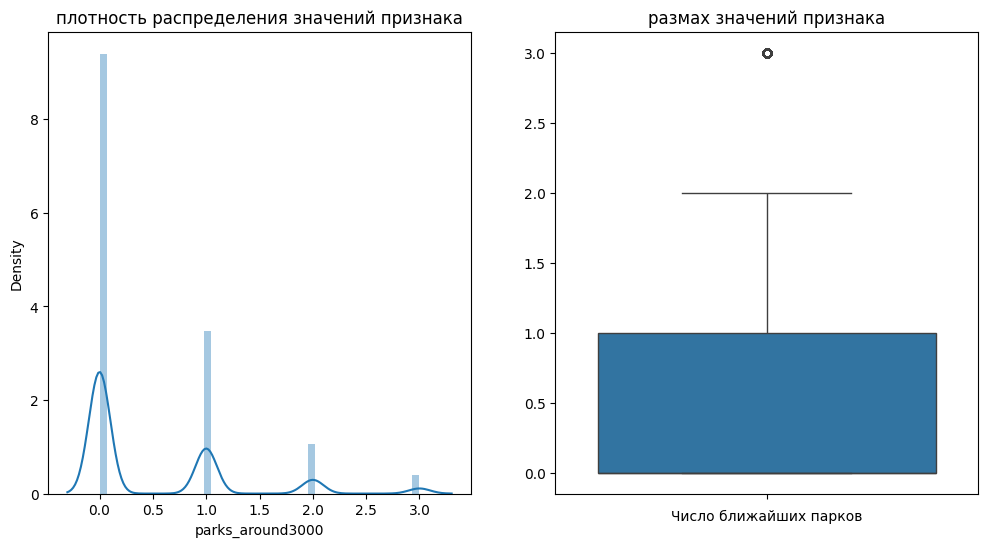

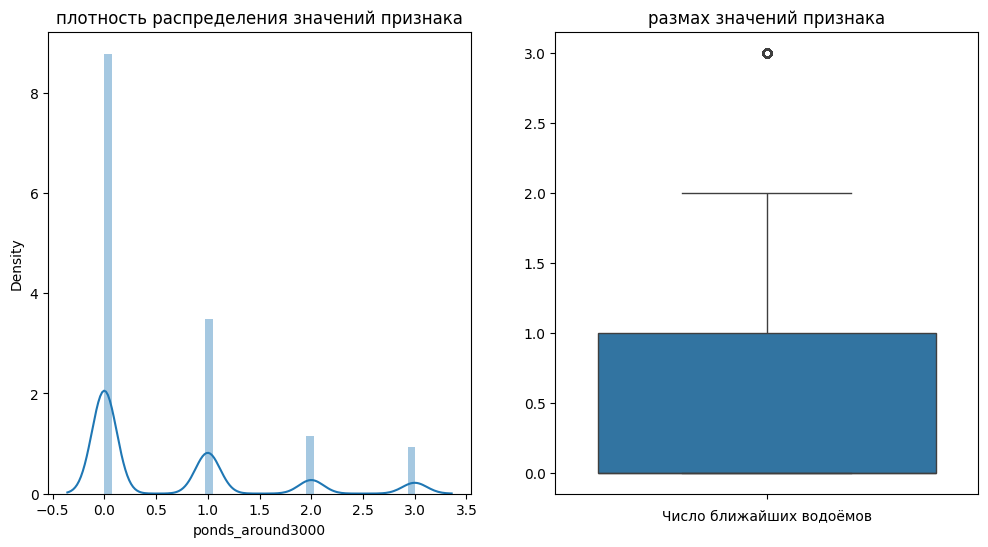

In [171]:
# парные диаграммы признака 'parks_around3000'
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('плотность распределения значений признака')
sns.distplot(df['parks_around3000'])

plt.subplot(1,2,2)
plt.title('размах значений признака')
sns.boxplot(y = df['parks_around3000']).set(ylabel='', xlabel='Число ближайших парков')
plt.show()

# парные диаграммы признака 'ponds_around3000'
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('плотность распределения значений признака')
sns.distplot(df['ponds_around3000'])

plt.subplot(1,2,2)
plt.title('размах значений признака')
sns.boxplot(y = df['ponds_around3000']).set(ylabel='', xlabel='Число ближайших водоёмов')
plt.show()

In [172]:
# описательная статистика по признаку
df[['parks_around3000', 'ponds_around3000']].describe().astype(int)

,parks_around3000,ponds_around3000
count,23016,23016
mean,0,0
std,0,0
min,0,0
25%,0,0
50%,0,0
75%,1,1
max,3,3


In [173]:
# медианное значение признака
df[['parks_around3000', 'ponds_around3000']].median()

parks_around3000    0.0
ponds_around3000    0.0
dtype: float64

In [174]:
# срез данных по паркам у близлежащих территорий
df.query('parks_nearest >= 3000').shape[0]

15091

In [175]:
# срез данных по водоёмам у близлежащих территорий
df.query('ponds_nearest >= 3000').groupby('cityCenters_category').count()

,locality_name,last_price,total_area,living_area,kitchen_area,rooms,ceiling_height,balcony,is_apartment,studio,...,floors_total,cityCenters_nearest,airports_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,total_images,first_day_exposition,days_exposition
cityCenters_category,,,,,,,,,,,,,,,,,,,,,
Ленинградская область,5600,5600,5600,5600,5600,5600,5600,5600,5600,5600,...,5600,5600,5600,5600,5600,5600,5600,5600,5600,5600
исторический центр города,25,25,25,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25
пригородные районы,5414,5414,5414,5414,5414,5414,5414,5414,5414,5414,...,5414,5414,5414,5414,5414,5414,5414,5414,5414,5414
удалённые районы города,2294,2294,2294,2294,2294,2294,2294,2294,2294,2294,...,2294,2294,2294,2294,2294,2294,2294,2294,2294,2294
центральные районы города,768,768,768,768,768,768,768,768,768,768,...,768,768,768,768,768,768,768,768,768,768


**Вывод:** признаки, описывающие расстояние от квартиры до ближайшего парка или водоёма и их количество, содержат минимальное количество выбросов. Также, на диаграммах мы видим добавленные значения радиуса 5 км для данных, ранее содержавших пропуски. Расстояние до парка в 1 метр, равно как и 3, 7, 9 метров не выдерживает проверку реальностью. Смеем надеяться, что такое значение авторами объявления было сокращено умышленно, но из лучших побуждений. Мы заменили эти значения на "джентельменские" 10 метров. В данных по расстояниям до водоёмов искажений не выявлено.

Из данных по доступности зон отдыха и рекреации складывается весьма удручающая картина. Только 7 557 локаций недвижимости могут порадовать пешей прогулкой по тенистым аллеям или вдоль берега озера: это удалённые районы города (2513 объявлений), пригородные районы (2317 объявлений), которые формировались в советское время без оглядки на парковочные площади и с чётким следованием нормативу количества кв.м зелёных насаждений на 1 жителя города. Ещё 1 743 квартиры в центральных районах и в самом историческом центре города прилегают к старинным паркам, садам и скверам. В Ленинградской области таких "зелёных" квартир чуть меньше 1000. Сходным образом обстоят дела и с наличием водоёмов, хотя для квартир, расположенных на большом удалении в области этот показатель становится выше в 2 раза и достигает 1895.

Необходимо отметить, что в пригородных районах и на объектах Ленинградской области эти данные приобретают совершенно обратный смысл: объекты купли-продажи расположены в многоквартирных жилых домах в малочисленных городах, п.г.т., посёлках, сёлах, деревнях, где человек постоянно пребывает в контакте с естественной природой, а не с общественными пространствами, где природа воссоздана искусственно, хоть и умело.

#### 2.4.9. Аномальные значения признака `'total_images'`

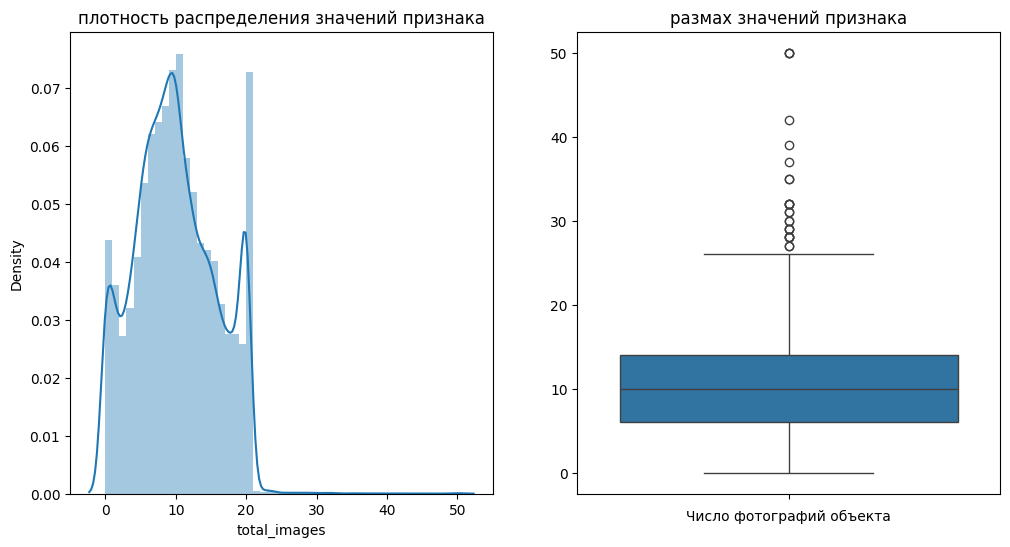

In [176]:
# парные диаграммы признака 'total_images'
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('плотность распределения значений признака')
sns.distplot(df['total_images'])

plt.subplot(1,2,2)
plt.title('размах значений признака')
sns.boxplot(y = df['total_images']).set(ylabel='', xlabel='Число фотографий объекта')
plt.show()

In [177]:
# описательная статистика по признаку количества фотографий
df['total_images'].describe().astype(int)

count    23016
mean         9
std          5
min          0
25%          6
50%         10
75%         14
max         50
Name: total_images, dtype: int32

In [178]:
# медианное значение признака
df['total_images'].median()

10.0

**Вывод:** на диаграммах по признаку количества фотографий мы видим равномерное распределение данных. Редкие значения начинаются после 25 фотографий. Превалирующее большинство пользователей довольствуются 10 фотоизображениями объекта продажи. Аномалий по этому признаку не выявлено.

#### 2.4.10. Аномальные значения признака `'days_exposition'`

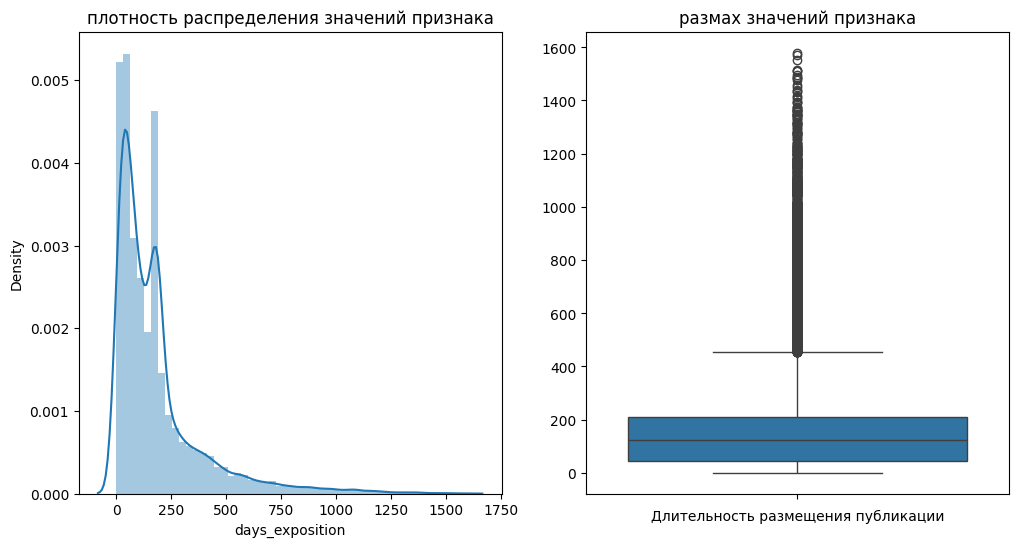

In [179]:
# парные диаграммы признака 'days_exposition'
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('плотность распределения значений признака')
sns.distplot(df['days_exposition'])

plt.subplot(1,2,2)
plt.title('размах значений признака')
sns.boxplot(y=df['days_exposition']).set(ylabel='', xlabel='Длительность размещения публикации')
plt.show()

In [180]:
# переводим в целочисленный формат для удобства исследования
df['days_exposition'] = df['days_exposition'].astype(int)

In [181]:
# описательная статистика по признаку количества фотографий
df['days_exposition'].describe().astype(int)

count    23016
mean       182
std        206
min          1
25%         46
50%        122
75%        209
max       1580
Name: days_exposition, dtype: int32

In [182]:
# медианное значение признака
df['days_exposition'].median()

122.0

На гистограмме отчётливо видны всплески значений в промежутке примерно от 30 до 200. Сделаем срез данных и изучим полученный результат.

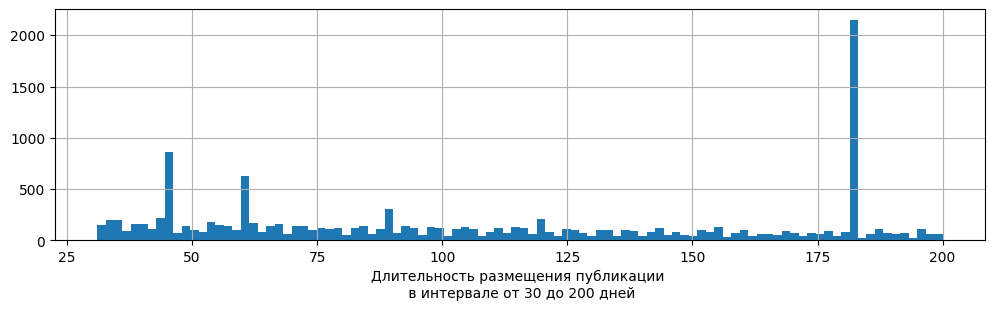

In [183]:
# срез данных по длительности периода размещения объявления от 30 до 200 дней и его визуализация
midday = df.query('days_exposition > 30 and days_exposition <= 200')
plt.figure(figsize=(12,3))
midday['days_exposition'].hist(bins=100).set(ylabel='', 
                                             xlabel='Длительность размещения публикации \n в интервале от 30 до 200 дней')
plt.show()

На полученной гистограмме среза мы можем отметить аномальные значения в отрезках:

* от 30 до 75
* от 75 до 100
* от 110 до 125
* от 175 до 200

Сделаем последовательные срезы и выясним точный день аномального значения для каждого указанного временного интервала.

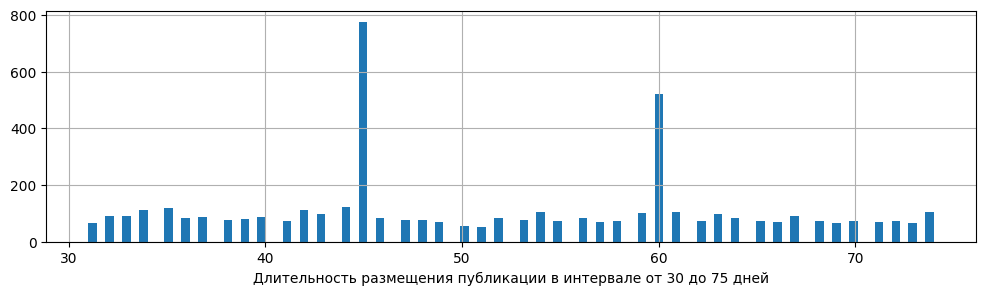

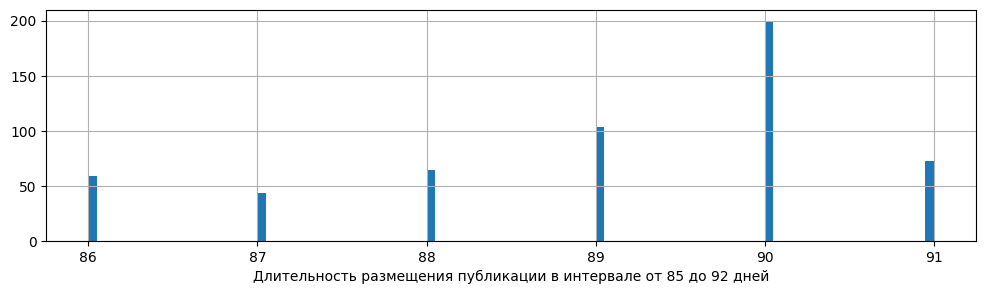

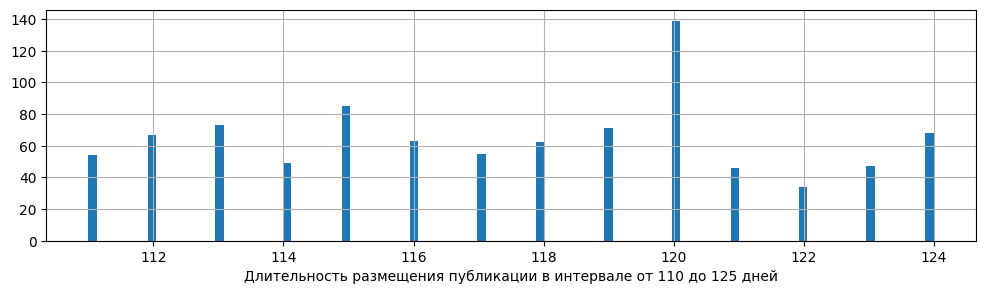

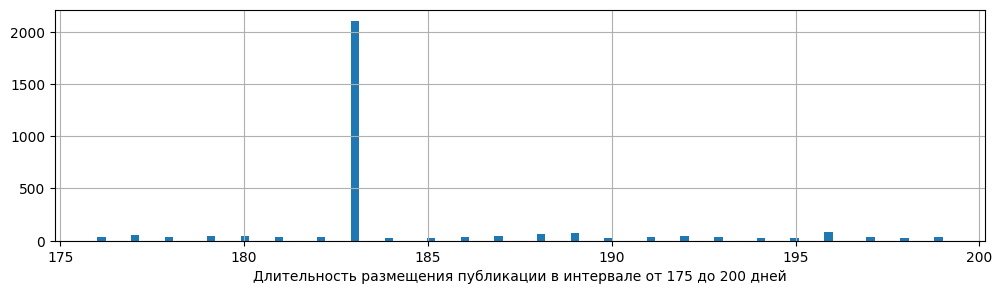

In [184]:
# определяем интервалы и соответствующие подписи
intervals = [
    (30, 75, 'Длительность размещения публикации в интервале от 30 до 75 дней'),
    (85, 92, 'Длительность размещения публикации в интервале от 85 до 92 дней'),
    (110, 125, 'Длительность размещения публикации в интервале от 110 до 125 дней'),
    (175, 200, 'Длительность размещения публикации в интервале от 175 до 200 дней')
]

# функция для построения графика
def plot_histogram(data, xlabel):
    plt.figure(figsize=(12,3))
    data.hist(bins=100)
    plt.xlabel(xlabel)
    plt.ylabel('')
    plt.show()

# цикличный вывод графиков по заданным нтервалам
for start, end, xlabel in intervals:
    filtered_data = df.query(f'days_exposition > {start} and days_exposition < {end}')
    plot_histogram(filtered_data['days_exposition'], xlabel)

Итого: имеем аномальные значения на 45, 60, 90, 120, 183 день в общем массиве данных по признаку `days_exposition`.

In [185]:
# удаляем строки с указанными значениями days_exposition
df = df[~df['days_exposition'].isin([45, 60, 90, 120, 183])]

**Вывод:** кажущиеся на первый взгляд аномальными значения периода длительности публикации являются прямым следствием  [политики размещения объявлений платформы Яндекс Недвижимость](https://yandex.ru/support/realty/paid.html). На основании информации датафрейма, подтверждаемой [наличием опций бесплатных и платных объявлений, а также существованием нескольких тарифов](https://yandex.ru/support/realty/realtor/home/add-ads-housing.html), которые позволяют продлевать период публикации объявления на ограниченный срок, мы можем выделить следующие даты:
* 45 дней - квартиры стоимостью до 4,5 млн
* 45 дней - комнаты
* 60 дней- квартиры стоимостью от 4,5 до 10 млн
* 90 дней - квартиры стоимостью от 10 млн
* 120 дней - вообще продажа недвжижимого имущества в Санкт-Петербурге и Ленинградской области 
* 183 дня - поскольку, за полгода в Санкт-Петербурге и Ленинградской области можно разместить только 1 бесплатное объявление, поэтому, на 183-й день такое объявление снимается с публикации автоматически.

В указанных объявлениях квартиры по факту проданы не были и это всего лишь свидетельство того, что истёк срок длительности бесплатного размещения публикации. Эти строки, даже с учётом их существенного объёма в общей массе данных, мы вынуждены удалить.

In [186]:
# выведем размер очищенного датафрейма
df.shape

(19273, 23)

**Вывод:** в рамках предварительной обработки данных нами были выявлены и изучены пропущенные значения по всем числовым признакам. Для этого была разработана и реализована соответствующая стратегия: заполнение пропусков значением `0` там, где это логически обосновано; заполнение медианным или минимальным нормативным значением; восстановление данных с помощью получения геокода и с помощью дополнительного созданного признака категории удалённости населённого пункта от центра Ленинградской области – Санкт-Петербурга для восстановления сбалансированных значений по целому ряду взаимосвязанных признаков.

Также, нами были рассмотрены типы данных в датафрейме, выполнено необходимое преобразование вещественных типов данных к целочисленным: `floors_total`, `parks_nearest`, `ponds_nearest`, `parks_around3000`, `ponds_around3000`, `balcony`, `apartment`.

По итогам изучения уникальных значений признака `locality_name` были устранены 43 неявных дубликата и укрупнены смысловые синонимы: к типу посёлок отнесён городской посёлок, городского типа, городской, коттеджный, при железнодорожной станции, а к садовому товариществу отнесено садоводческое некоммерческое товарищество.

Исследованы и обработаны редкие и выбивающиеся значения. Выполнена проверка на соблюдение логических условий по взаимосвязанным признакам, обработаны некорректные данные с механическими или смысловыми ошибками ввода.

В датафрейме выявлено присутствие экономичного, среднего и люксового ценового сегмента рынка недвижимости Санкт-Петербурга и Ленинградской области. В целях получения полной и объективной картины считаем необходимым сохранение данных по люксовому сегменту с последующим сравнительным исследованием (информация представлена в `Шаг 4.`).

После предварительной обработки исходный датафрейм сократился с 23 699 до 19 273, потери данных составили 4 426 строк или 18.7%.

### 3. Создание дополнительных признаков

#### 3.1. Цена одного квадратного метра

In [187]:
# создание и расчёт признака стоимости одного квадратного метра
df['price_m2'] = df['last_price'] / df['total_area']

#### 3.2. День недели публикации объявления (0 — понедельник, 1 — вторник и так далее)

In [188]:
# проставим день недели в формате числа (1 - понедельник, 7 - воскресенье):
df['day_exp'] = df['first_day_exposition'].apply(lambda x: x.isoweekday())

In [189]:
# создадим словарь для замены числовых значений на текстовые
dict_of_weekdays = {1: '1 - понедельник', 2: '2 - вторник', 3: '3 - среда',
                    4: '4 - четверг', 5: '5 - пятница',
                    6: '6 - суббота', 7: '7 - воскресенье'}

In [190]:
# заменяем значения по ранее созданному словарю
df['day_exp'] = df['day_exp'].map(dict_of_weekdays)

#### 3.3. Месяц публикации объявления

In [191]:
# создадим новый признак месяца публикации объявления
df['month_exp'] = df['first_day_exposition'].apply(lambda x: x.month)

#### 3.4. Год публикации объявления

In [192]:
# создадим новый признак года публикации объявления
df['year_exp'] = df['first_day_exposition'].apply(lambda x: x.year)

#### 3.5. Тип этажа квартиры (значения — «первый», «последний», «другой»)

In [193]:
# создадим новый признак типа этажа квартиры
df['floor_type'] = np.where(df['floor'] == 1, 'первый', 'другой')
df['floor_type'] = np.where(df['floor'] == df['floors_total'], 'последний', df['floor_type'])

#### 3.6. Расстояние до центра города в километрах (переведите из `м` в `км` и округлите до целых значений)

In [194]:
# создание и расчёт признака расстояния до центра города в километрах
df['cityCenters_km'] = (df['cityCenters_nearest'] / 1000).astype(int)

In [195]:
# выведем датафрейм для ознакомления с изменениями
df.head()

,locality_name,last_price,total_area,living_area,kitchen_area,rooms,ceiling_height,balcony,is_apartment,studio,...,total_images,first_day_exposition,days_exposition,cityCenters_category,price_m2,day_exp,month_exp,year_exp,floor_type,cityCenters_km
1,поселок Шушары,3350000.0,40.4,18.6,11.0,1,2.60,1,False,False,...,7,2018-12-04,81,Ленинградская область,82920.792079,2 - вторник,12,2018,первый,18
2,Санкт-Петербург,5196000.0,56.0,34.3,8.3,2,2.62,0,False,False,...,10,2015-08-20,558,пригородные районы,92785.714286,4 - четверг,8,2015,другой,13
3,Санкт-Петербург,64900000.0,159.0,53.5,6.0,3,2.70,0,False,False,...,0,2015-07-24,424,удалённые районы города,408176.100629,5 - пятница,7,2015,другой,6
4,Санкт-Петербург,10000000.0,100.0,32.0,41.0,2,3.03,0,False,False,...,2,2018-06-19,121,удалённые районы города,100000.000000,2 - вторник,6,2018,другой,8
5,поселок Янино-1,2890000.0,30.4,14.4,9.1,1,2.62,0,False,False,...,10,2018-09-10,55,пригородные районы,95065.789474,1 - понедельник,9,2018,другой,14


**Вывод:** нами были последовательно добавлены в датафрейм следующие новые признаки: цена одного квадратного метра `price_m2`, день недели публикации объявления `day_exp`, месяц публикации объявления `month_exp`, год публикации объявления `year_exp`, тип этажа квартиры `floor_type`, расстояние до центра города в километрах `cityCenters_km`.

### 4. Исследовательский анализ данных

В целях эффективной исследовательской работы с ключевыми признаками полагаем целесообразным из текущего датафрейма размером 19 262 строк на 29 столбцов сформировать новый датафрейм со следующими признаками:

* `locality_name` - населённый пункт
* `total_area` - общая площадь
* `last_price` - цена объекта
* `price_m2` - цена одного квадратного метра

* `living_area` - жилая площадь
* `kitchen_area` - площадь кухни
* `rooms` - количество комнат
* `ceiling_height` - высота потолков

* `floor` - этаж квартиры
* `floor_type` - тип этажа квартиры («первый», «последний», «другой»)
* `floors_total` - общее количество этажей в доме

* `cityCenters_nearest` - расстояние до центра города в метрах
* `cityCenter_km` - расстояние до центра города в километрах 
* `airports_nearest` - расстояние до ближайшего аэропорта
* `parks_nearest` - расстояние до ближайшего парка

* `first_day_exposition` – дата (день и месяц) публикации объявления
* `days_exposition` - длительность периода размещения объявления
* `day_exp` - день недели публикации объявления 
* `month_exp` - месяц публикации объявления 
* `year_exp` - год публикации объявления

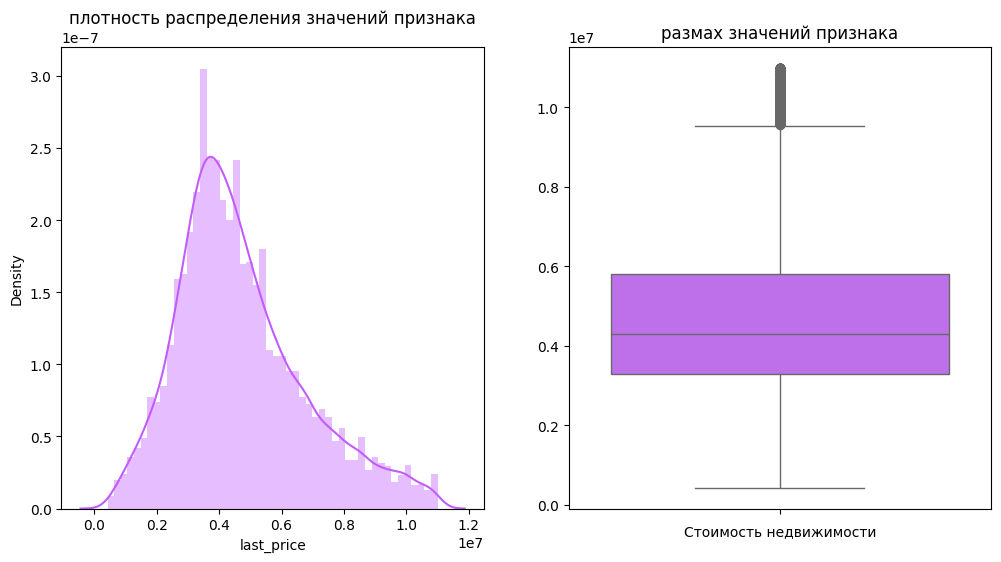

In [196]:
# парные диаграммы признака `last_price`
# визуализация среза признака `last_price`
last_price_detailed = df.query('last_price < 11000000')

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('плотность распределения значений признака')
sns.distplot(last_price_detailed['last_price'], color='#c25cfd')

plt.subplot(1,2,2)
plt.title('размах значений признака')
sns.boxplot(y=last_price_detailed['last_price'], color='#c25cfd').set(ylabel='', xlabel='Стоимость недвижимости')
plt.show()

Из общего датафрейма методом среза `query` предлагается создать 2 датафрейма, содержащих сведения о среднем ценовом сегменте **`middle`** и люксовом ценовом сегменте **`luxury`** по всем вышеназванным признакам. Линией разделения ценовых сегментов станет значение признака `last_price` выше или ниже 10 000 000 руб. 75-й перцентиль этого признака равен 6 850 000 руб., а верхний ус `boxplot` находится на отметке в 11 000 000 руб.

Таким образом, мы возьмём для расчётов **верхний порог значений цены квартиры в 11 000 000 руб.** и сделаем по нему срез датафрейма.

In [197]:
# создание общего датафрейма с необходимыми признаками
df_common = df[['locality_name', 'total_area', 'last_price', 'price_m2', 
                'living_area', 'kitchen_area', 'rooms', 'ceiling_height', 
                'floor', 'floor_type', 'floors_total', 
                'cityCenters_nearest', 'cityCenters_km', 'airports_nearest', 'parks_nearest', 
                'first_day_exposition', 'days_exposition', 'day_exp', 'month_exp', 'year_exp']]

In [198]:
# заменяем текстовые значения признака 'floor_type' числовыми для построения диаграмм
floor_cat = {'первый': 1, 'другой': 2, 'последний': 3}
df_common['floor_type'].replace(floor_cat, inplace=True)

In [199]:
# заменяем текстовые значения признака 'day_exp' числовыми для построения диаграмм
day_cat = {'1 - понедельник':1, '2 - вторник': 2, '3 - среда':3,
           '4 - четверг':4, '5 - пятница':5,
           '6 - суббота':6, '7 - воскресенье':7}

df_common['day_exp'].replace(day_cat, inplace=True)

In [200]:
# создание двух отдельных массивов данных по среднему и люксовому сегменту
middle = df_common.query('last_price <= 11000000')
luxury = df_common.query('last_price > 11000000')

In [201]:
# проверяем полноту каждого созданного датафрейма
print('Сводный датафрейм:', df_common.shape[0], 'записей всего. Из них:')
print('датафрейм по среднему ценовому сегменту:', middle.shape[0])
print('датафрейм по люксовому ценовому сегменту:', luxury.shape[0])

Сводный датафрейм: 19273 записей всего. Из них:
датафрейм по среднему ценовому сегменту: 17697
датафрейм по люксовому ценовому сегменту: 1576


#### 4.1. Изучение ключевых параметров недвижимости с визуализацией (гистограмма):
     
* общая площадь;
* жилая площадь;
* площадь кухни;
* цена объекта;
* количество комнат;
* высота потолков;
* этаж квартиры;
* тип этажа квартиры («первый», «последний», «другой»);
* общее количество этажей в доме;
* расстояние до центра города в метрах;
* расстояние до ближайшего аэропорта;
* расстояние до ближайшего парка;
* день и месяц публикации объявления.

In [202]:
# создаём словарь признаков
columns = {'last_price':'цена квартиры',
'total_area':'общая площадь', 
'living_area':'жилая площадь',
'kitchen_area':'площадь кухни',
'rooms':'количество комнат',
'ceiling_height':'высота потолков',
'floor':'этаж квартиры',
'floor_type':'тип этажа квартиры',
'floors_total':'общее количество этажей в доме',
'cityCenters_nearest':'расстояние до центра города в метрах',
'airports_nearest':'расстояние до ближайшего аэропорта',
'parks_nearest':'расстояние до ближайшего парка',
'day_exp':'день публикации объявления',
'month_exp':'месяц публикации объявления'}

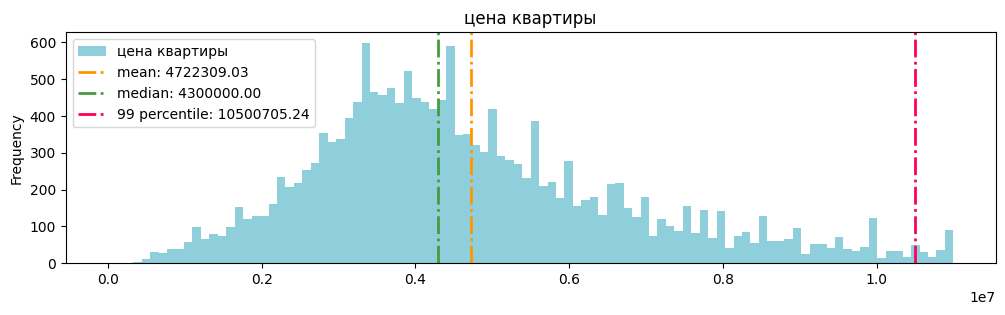

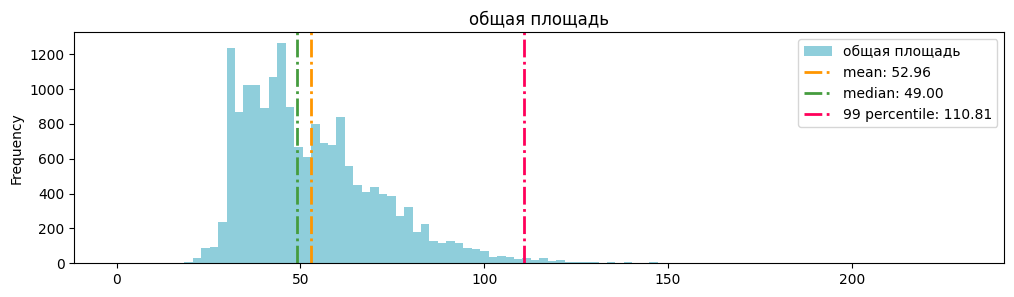

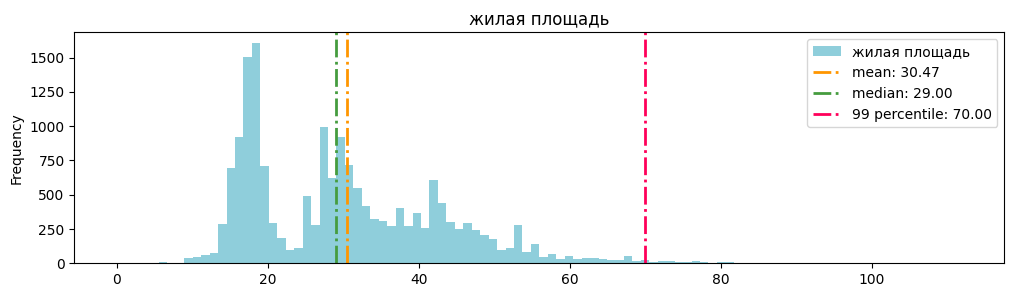

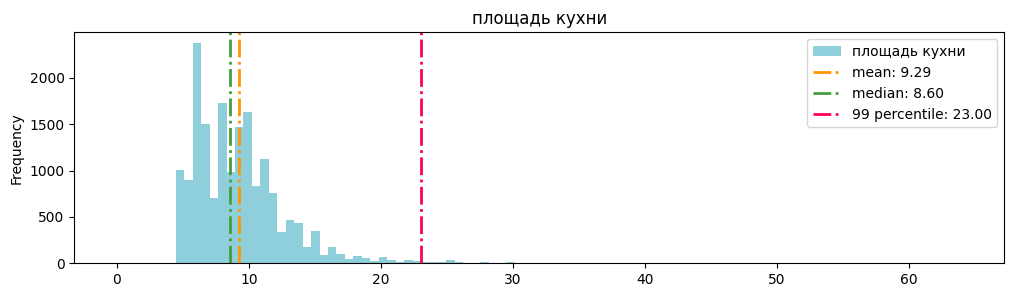

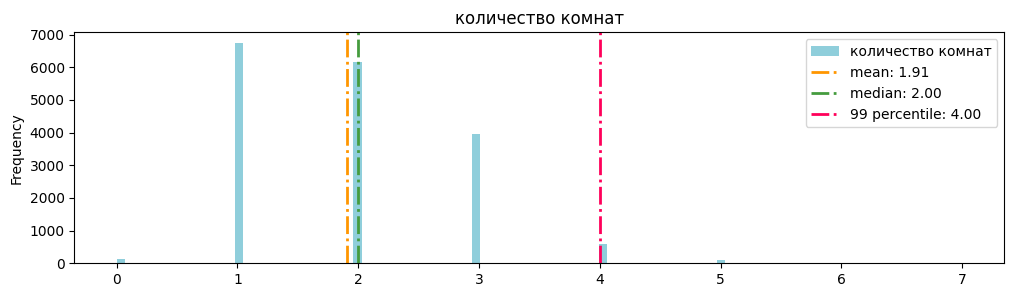

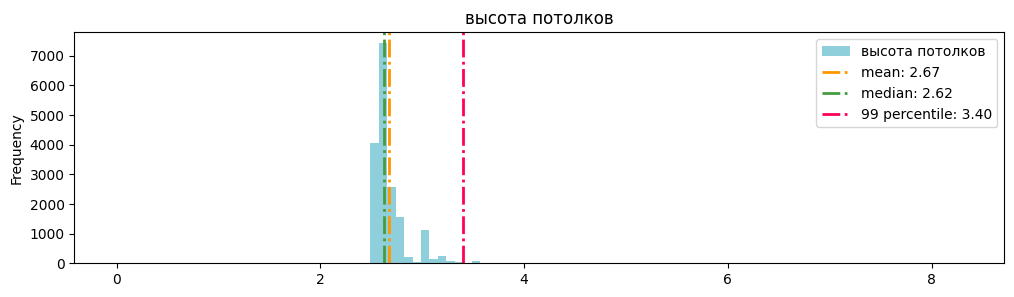

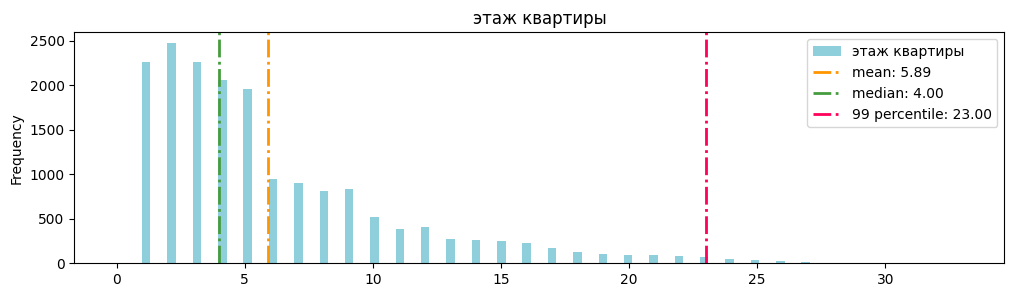

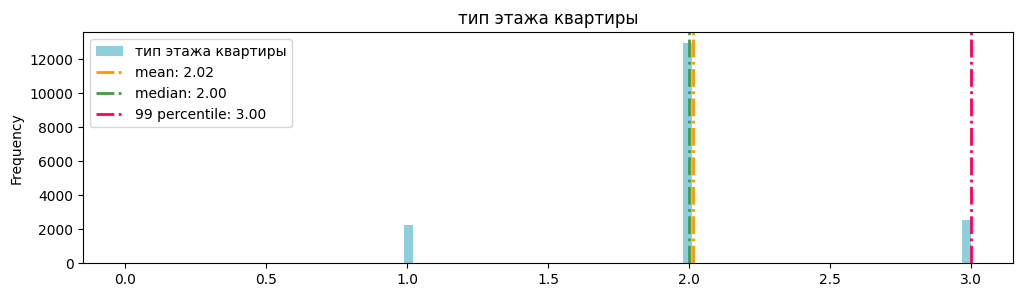

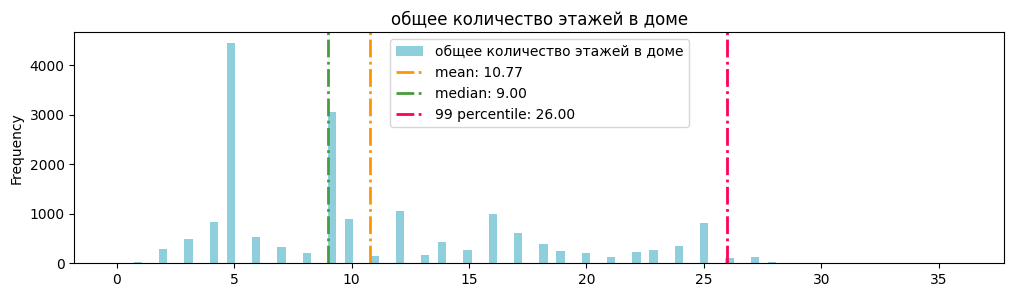

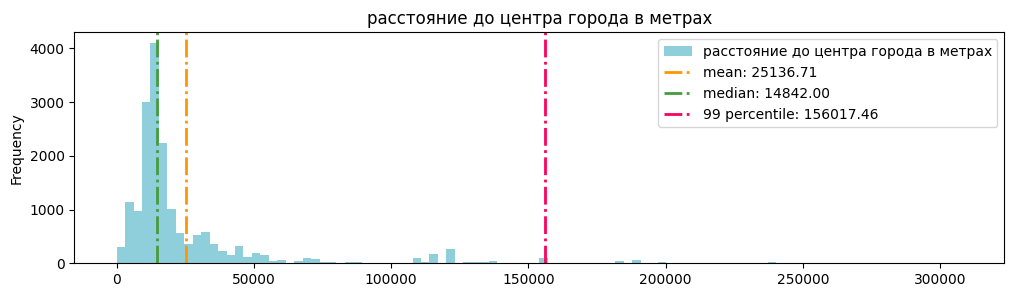

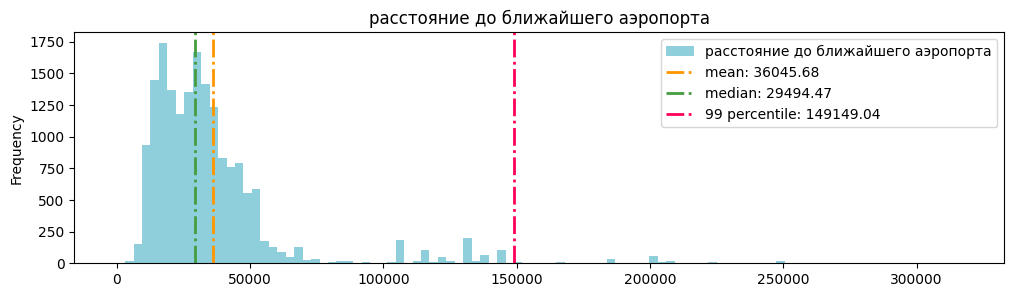

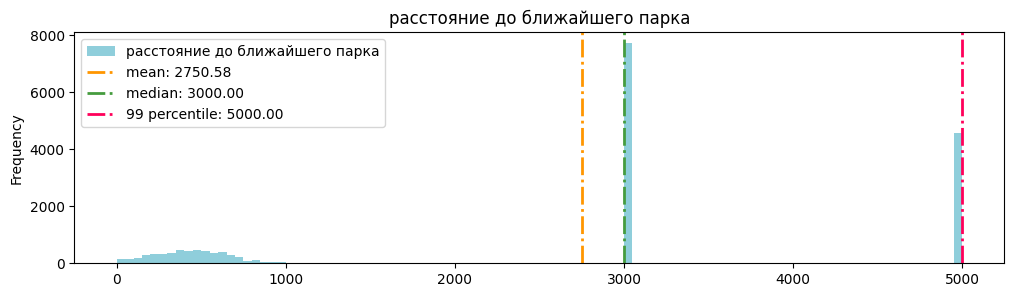

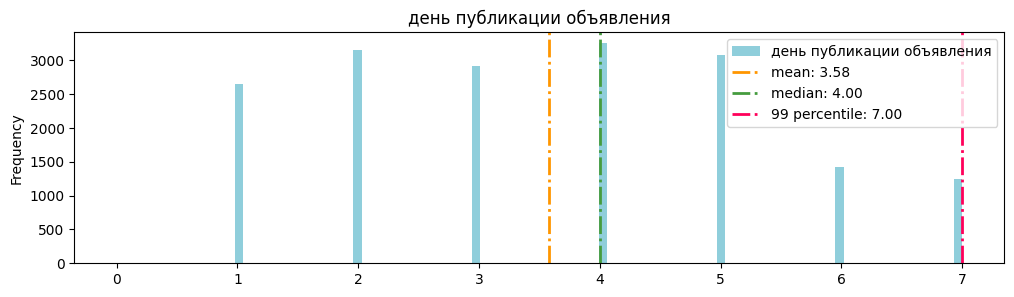

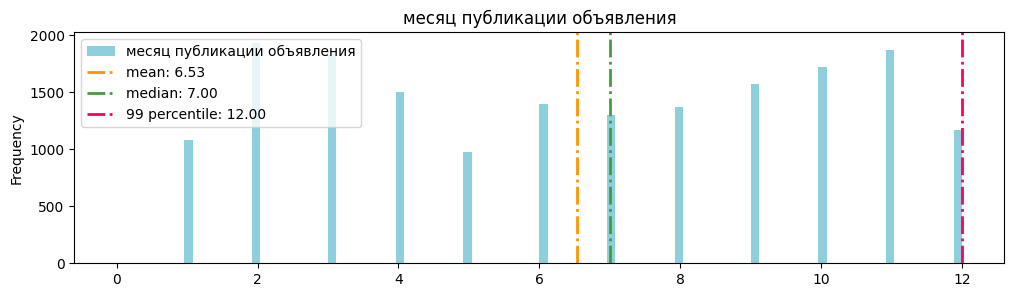

In [203]:
# с помощью цикла строим все гистограммы указанных признаков по квартирам среднего ценового сегмента
for i,j in zip(list(columns.keys()), list(columns.values())):
    middle.plot(y=i, title=j, kind='hist', bins=100, range = (0, middle[i].max()), 
                figsize=(12,3), label = j, color='#8fcedb', grid=False)
    plt.axvline(x=middle[i].mean(), color='#ff9600', 
                linestyle='-.', linewidth=2, label=f'mean: {middle[i].mean():.02f}')
    plt.axvline(x=middle[i].median(), color='#459c3e', 
                linestyle='-.', linewidth=2, label=f'median: {middle[i].median():.02f}')
    plt.axvline(np.percentile(middle[i], 99), color='#ff005a', 
                linestyle='-.', linewidth=2, label=f'99 percentile: {np.percentile(middle[i], 99):.02f}')
    plt.legend()
    plt.show()

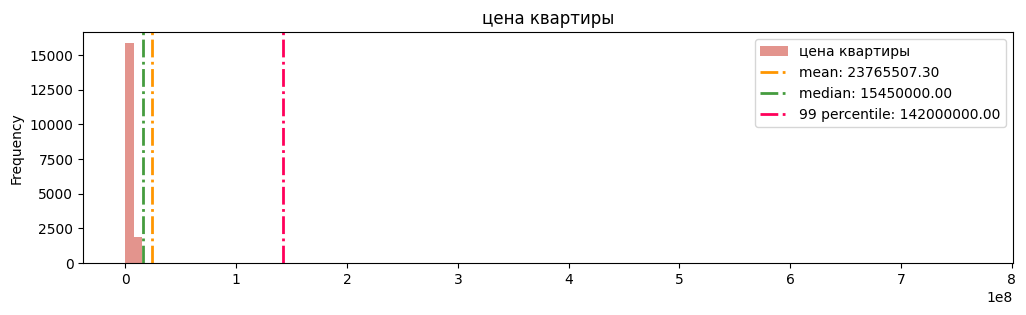

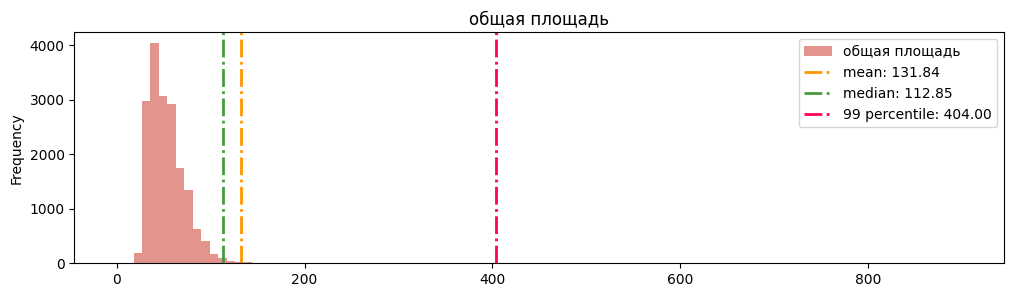

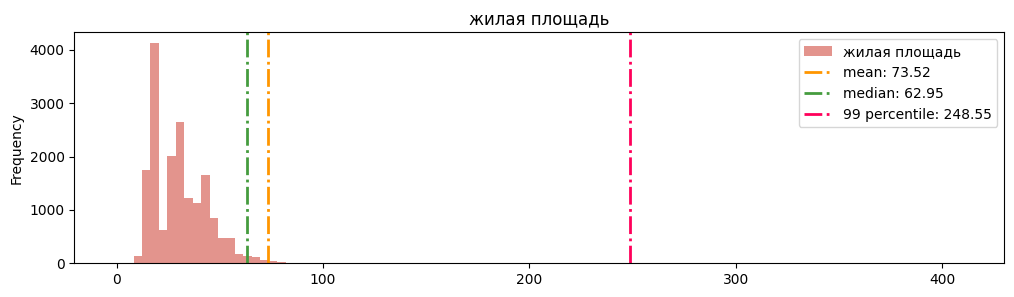

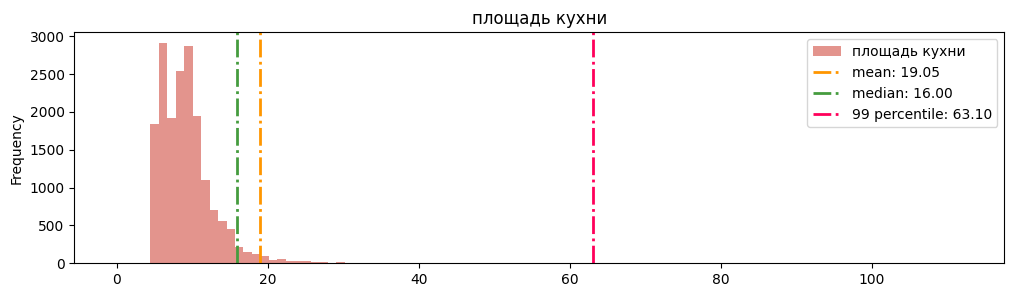

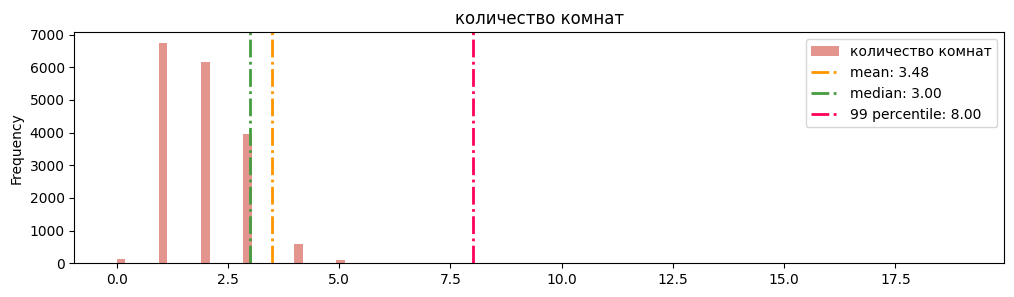

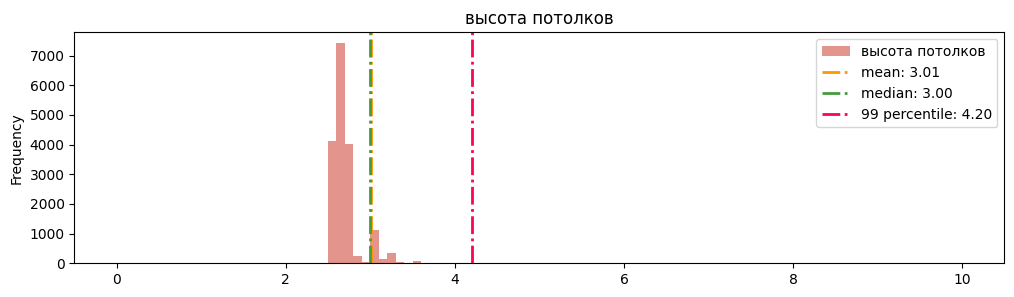

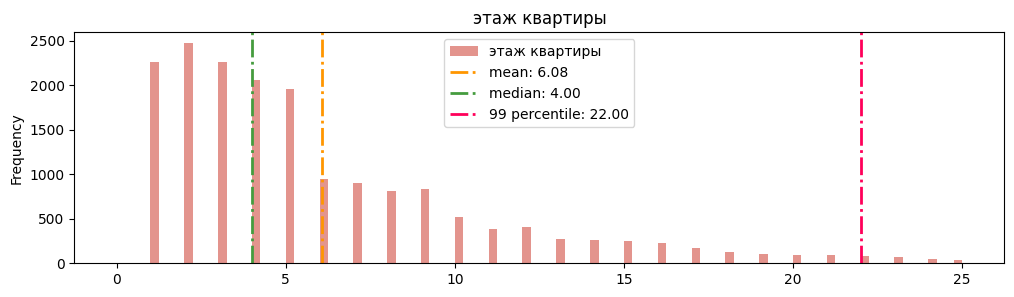

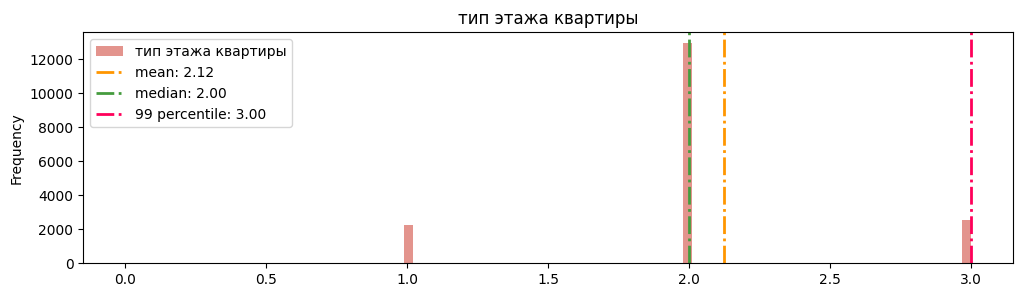

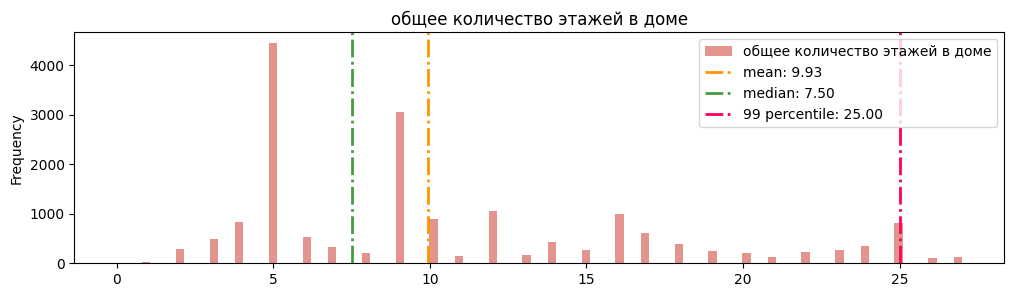

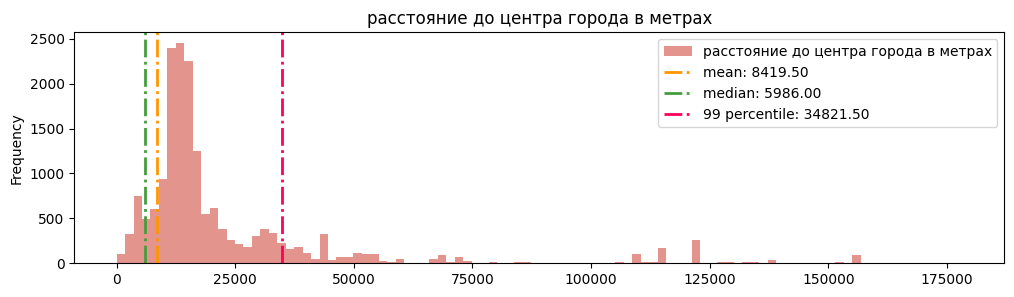

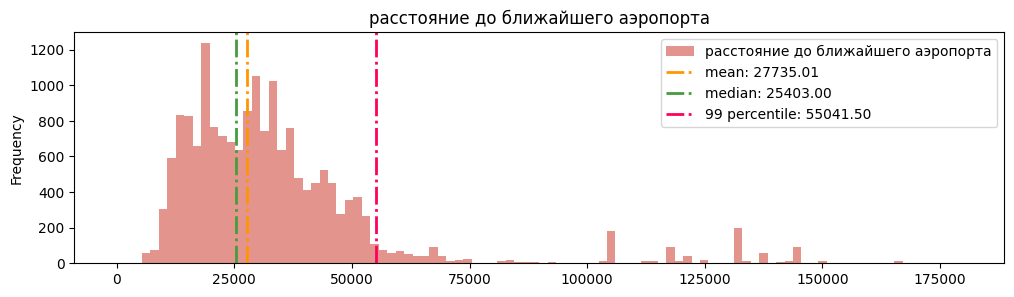

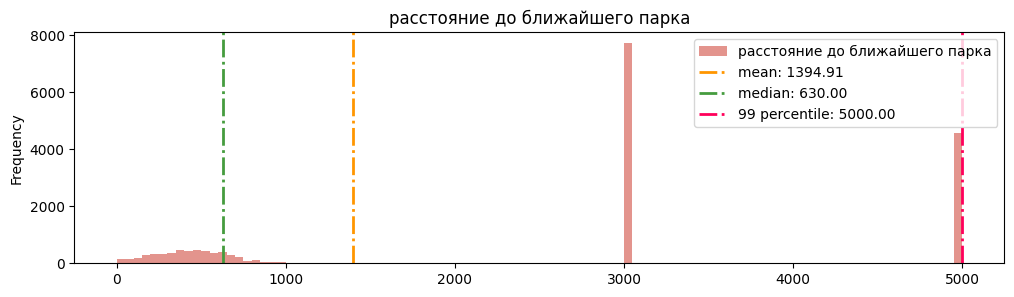

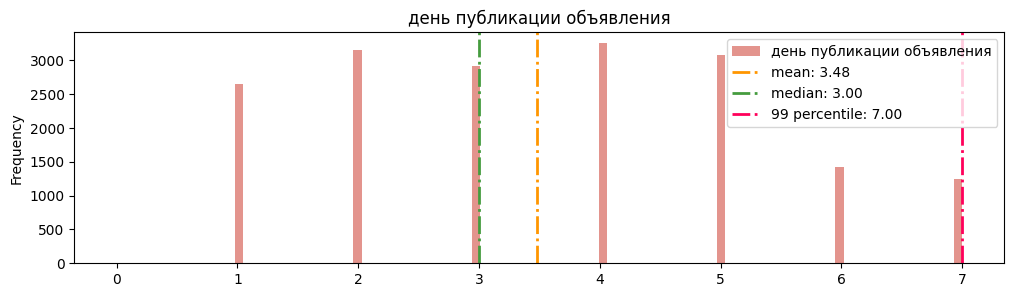

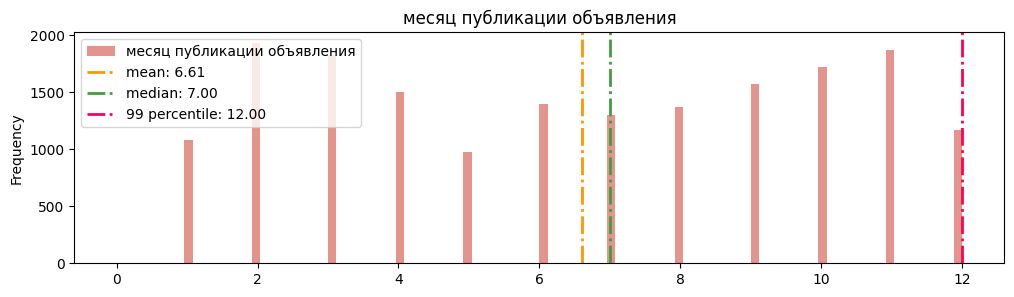

In [204]:
# с помощью цикла строим все гистограммы указанных признаков по квартирам люксового ценового сегмента
for i,j in zip(list(columns.keys()), list(columns.values())):
    middle.plot(y=i, title=j, kind='hist', bins=100, range = (0, luxury[i].max()), 
                figsize=(12,3), label = j, color='#e3948d', grid=False)
    plt.axvline(x=luxury[i].mean(), color='#ff9600', 
                linestyle='-.', linewidth=2, label=f'mean: {luxury[i].mean():.02f}')
    plt.axvline(x=luxury[i].median(), color='#459c3e', 
                linestyle='-.', linewidth=2, label=f'median: {luxury[i].median():.02f}')
    plt.axvline(np.percentile(luxury[i], 99), color='#ff005a', 
                linestyle='-.', linewidth=2, label=f'99 percentile: {np.percentile(luxury[i], 99):.02f}')
    plt.legend()
    plt.show()

**Вывод** по данному блоку исследований представлен в виде таблицы ниже.

*Таблица 5. Сравнительные характеристики ключевых параметров среднего и люксового ценового сегмента рынка недвижимости Санкт-Петербурга и Ленинградской области за период 2014 - 2019 годов*

| наименование признака | средний ценовой сегмент                              |               люксовый ценовой сегмент     |
|:----------------------|:-----------------------------------------------------|:-------------------------------------------|
|`цена объекта`|Диапазон цен на квартиры находится в пределах от 430 000 до 11 000 000 руб. Средняя цена в 4 818 126 руб. незначительно превосходит медианное значение в 4 300 000 руб. Абсолютное большинство квартир было продано по цене до 5 826 345 руб.|Диапазон цен на квартиры находится в пределах от 11 050 000 руб. до 763 000 000 руб. Стоит отметить, что верхний порог стоимостных значений принадлежит только одному объекту.  В люксовом ценовом сегменте по определению существует не массовый, а штучный товар с уникальными, выбивающимися из общей картины характеристиками и параметрами, поэтому медианное значение по этому признаку в 15 545 000 руб. ниже, чем средняя цена люкс-объекта в 23 769 725 руб. Большинство квартир в этом сегменте были проданы по стоимости от 15 450 000 руб. до 23 000 000 руб.|
|`общая площадь`|Минимальный метраж квартиры среднего ценового сегмента начинается от скромных 15 кв.м и заканчивается площадью почти целого этажа в 230 кв.м. Если соотнести максимальную цену и максимальную площадь в этом сегменте, можем получить большую квартиру сильной степени износа, капитальный ремонт которой встанет в сумму, равную самой квартире. Медианное значение общей площади фиксирует величину 49 кв.м., а средне значение расположилось чуть повыше на уровне 52 кв.м. Таким образом, большая часть квартир среднего ценового сегмента располагает площадью от 49 до 110 кв.м.|Запросы покупателей в этом сегменте существенно больше, как и площади квартир. Так, минимальный метраж начинается от 25 кв.м. В среднем, общая площадь люксовой квартиры совпадает с её медианным значением, и колеблется от 112 кв.м  до 150 кв.м. Хотя, отдельные гиганты расположились явно в двух- или трёх-ярусных квартирах на 900 кв.м.|
|`жилая площадь`|Умение разместиться с комфортом на жилой площади в 6 метров на 3 человек присуще жителям “хрущёвок”. Медианное значение этого признака почти равно среднему – это 29 кв.м – 30 кв.м. Большинство квартир могут похвастаться жилой площадью от 39 кв.м и более. Просторные квартиры с метражом 112 кв.м редкость для среднего ценового сегмента и, потенциально, обременены негативными факторами, которые не позволяют оценить эти метры по большей стоимости.|Минимальные 6 кв.м жилой площади в элитной квартире сочетаются с 16 метровой кухней и общей жилой площадью в 139 кв.м. Открытая планировка, дизайнерские решения по объединению или зонированию пространств элит-квартиры объясняют причины столь малых величин жилой площади. Медианное значение этого признака для элитной недвижимости составляет 63 кв., среднее немногим больше – 73 кв.м. Абсолютное большинство квартир располагают площадью от 84 кв.м. Максимальная жилая площадь в этом сегменте составляет 409 кв.м.|
|`площадь кухни`| Сердце квартиры – это кухня, и площадь сердца начинается с 5 кв.м. В большинстве квартир площадь кухни от 8 до 11 кв.м. За редким исключением кухня может достигать 64 кв.м., что характерно для квартир с большой общей площадью или квартир с открытой планировкой.| От минимальных 5 кв.м до 22 кв.м может достигать площадь кухни в элитном жилье. Но, как и в случае с жилой площадью, мы имеем дело с большой общей площадью квартиры, и потому владельцам такого жилья не придётся тесниться. Эти маленькие квадратные метры кухни с лихвой компенсируются включением в зонирование жилой площади или общей площади квартиры. Медианное значение равно 16 кв.м, а самая большая кухня – есть где развернуться! – составляет 112 кв.м.|
|`количество комнат`|В среднем ценовом сегменте в большей мере присутствуют 2-комнатные и 3-комнтаные квартиры. Многокомнатные квартиры в домах повышенной степени комфортности здесь большая редкость.|От открытой планировки без комнат и границ до 19 отдельных комнат: большое разнообразие при малой представленности на рынке недвижимости в целом. В большинстве элитных квартир количество комнат не меньше 4.|
|`высота потолков`|Высота потолков – это главный визуальный признак, по которому даже обыватель сможет отличить квартиру обычную от дорогостоящей. В основной массе жилья среднего ценового сегмента находятся квартиры с потолками от 2.6 до 2.7 м. Вторую ступеньку по массовости занимают квартиры с минимальной высотой потолка в 2.1 м. Квартиры с высокими потолками, иными словами, дешёвые «сталинки», здесь встречаются чрезвычайно редко.|Для «пациента» из люксового сегмента нормотипичной будет высота потолков от 3 м и выше. Второй по частотности уровень потолков находится на отметке 4 – 4.2 м. Двухярусные квартиры с необычайно высокими потолками по 10 м – это уникальное явление даже на рынке элитной недвижимости.|
|`этаж квартиры`|Квартиры на 1 этаже явно не пользуются ни спросом, ни популярностью. Большинство объявлений – о продаже квартиры на 4-8 этаже. Редкое исключение в силу объективных причин – это квартира в высотной многоэтажке.|Картина в элитном сегменте похожа на средний: зачастую продаются квартиры на 4-8 этаже. Объявлений о продаже элитной недвижимости на 1 – 3 этаже в датафрейме присутствует минимальное количество.|
|`тип этажа квартиры`|Тип этажа квартиры «другой», исключающий первый и последний этажи здания, характерен как для среднего ценового сегмента, так и для люксового.|Предпочтительными являются квартиры в «середине» здания, первый и последний этаж явно проигрывают и не пользуются спросом.|
|`этажей в доме, всего`|Высоко сижу, далеко гляжу – это про квартиру среднего сегмента на 33 этаже 36-этажного дома. Остальные представители предпочитают расположиться в 5-этажном или 9-этажном доме. Также существенно представлены 16-этажные дома, их в датафрейме 75%.|Этажность застройки, характерная для люксового сегмента – это 8-, 9- и 14-этажные здания. По этому характерному признаку уже можно говорить о сроках ввода в эксплуатацию этих зданий: конец 80-х и вплоть до новостроек. Максимальное количество этажей было отмечено цифрой 27.|
|`расстояние до центра города, м`|Очень показательной является разница в расстоянии до центра города между средним и люксовым сегментом. Обычному горожанину придётся преодолеть расстояние от 12 до 15 км, чтобы приобщиться к прекрасному или организовать себе культурный досуг.|Житель Санкт-Петербурга с высоким уровнем достатка проживает в непосредственной близости к культурному центру: от 4,3 км до 11 км в худшем случае.|
|`расстояние до ближайшего аэропорта`|Большая удалённость от аэропорта заключает в себе и плюсы, и минусы. Уровень шумового загрязнения и постоянные транспортные коллапсы исключаются при большой удалённости от аэропорта, но, если есть необходимость добраться до места назначения именно воздушным транспортом, придётся приложить много усилий и затратить много времени. Медианное расстояние до аэропорта в среднем сегменте составляет 29.5 км., минимальное – 6 км, большинство квартир из этого сегмента расположены на существенном удалении почти в 40 км.|Время – деньги, а время, потраченное в пробках до аэропорта – деньги вдвойне. Люксовые объекты недвижимости расположены рядом с историческим центром города, и, как следствие, незначительно удалены от аэропорта: от 7.3 км до 25 км. Максимальное расстояние в 33 км придётся преодолеть владельцам загородного жилья или пригорода Санкт-Петербурга. Если наложить эти километры на карту местности, то получим Павловск, Пушкин, Стрельну, Петергоф, Васильевский остров и Петроградский район.|
|`расстояние до ближайшего парка`|Вопрос экологического благополучия места проживания для многих представителей среднего сегмента далеко не вопрос. В том смысле, что до парка или любого другого объекта рекреации им далеко. Представлено очень мало квартир с шаговой доступностью озеленённых участков города, и в большинстве случаев для отдыха и выезда в парк придётся потратить пару часов.|Дисклокация квартир люксового сегмента в историческом центре города по умолчанию решает вопрос с озеленённостью и благоустройством прилегающих территорий. Минимальный метраж от квартиры до парка составляет 379 м, а в среднем 630 м. Но элитные квартиры на большом удалении от парков и зон отдыха тоже не редкость.|
|`день публикации объявления`|Мы можем предположить, что на графиках виден результат не только самостоятельного размещения объявлений продавцами, но и риэлторами: пик значений приходится на среду и четверг.|Ожидаемо, элитная недвижимость реализуется через риэлторские агентства и среда в качестве дня самой большой нагрузки, выглядит естественной и ожидаемой.|
|`месяц публикации объявления`|Вне зависимости от сегмента, рынок недвижимости, в общем и целом, живёт по своим законам: пик количества публикаций объявлений приходится на июль, хотя мы можем отметить определённую сезонность для февраля и марта, а также ноября.|Такие же всплески активности характерны и для люксового сегмента. Это свидетельство общности рынка недвижимости этого региона.|

#### 4.2. Изучение периода продажи квартиры с расчётом среднего и медианного значения, а также визуализация (гистограмма)

In [205]:
# создаём словарь для признака
columns = {'days_exposition':'длительность периода размещения объявления'}

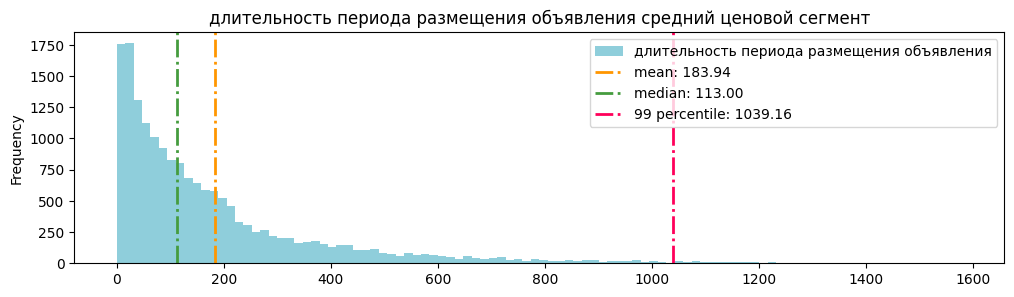

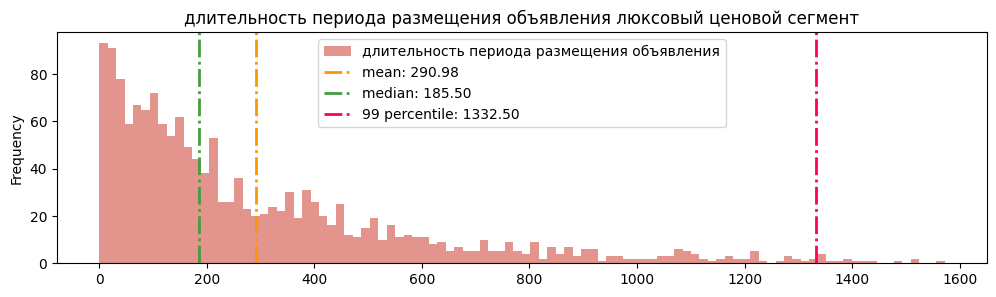

In [206]:
# создадим функцию для парного вывода гистограмм
def plot_histograms(data, columns, color, title_suffix):
    for i, j in zip(columns.keys(), columns.values()):
        data.plot(y=i, title=f"{j} {title_suffix}", kind='hist', bins=100, 
                  range=(0, data[i].max()), figsize=(12, 3), label=j, 
                  color=color, grid=False)
        
        plt.axvline(x=data[i].mean(), color='#ff9600', linestyle='-.', linewidth=2, 
                    label=f'mean: {data[i].mean():.02f}')
        plt.axvline(x=data[i].median(), color='#459c3e', linestyle='-.', linewidth=2, 
                    label=f'median: {data[i].median():.02f}')
        plt.axvline(np.percentile(data[i], 99), color='#ff005a', linestyle='-.', linewidth=2, 
                    label=f'99 percentile: {np.percentile(data[i], 99):.02f}')
        plt.legend()
        plt.show()

# для среднего ценового сегмента
plot_histograms(middle, columns, '#8fcedb', 'средний ценовой сегмент')

# для люксового ценового сегмента
plot_histograms(luxury, columns, '#e3948d', 'люксовый ценовой сегмент')

Чтобы ответить на вопрос о том, какие продажи можно считать очень быстрыми и очень долгими, мы можем воспользоваться методом описательной статистики и выбрать данные в каждом ценовом сегменте по Q1-Q2 и Q3-Q4.

In [207]:
# описательная статистика по среднему ценовому сегменту
middle['days_exposition'].describe()

count    17697.000000
mean       183.939764
std        212.175283
min          1.000000
25%         42.000000
50%        113.000000
75%        235.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [208]:
# описательная статистика по люкосовому ценовому сегменту
luxury['days_exposition'].describe()

count    1576.000000
mean      290.983503
std       295.544282
min         3.000000
25%        81.000000
50%       185.500000
75%       403.250000
max      1572.000000
Name: days_exposition, dtype: float64

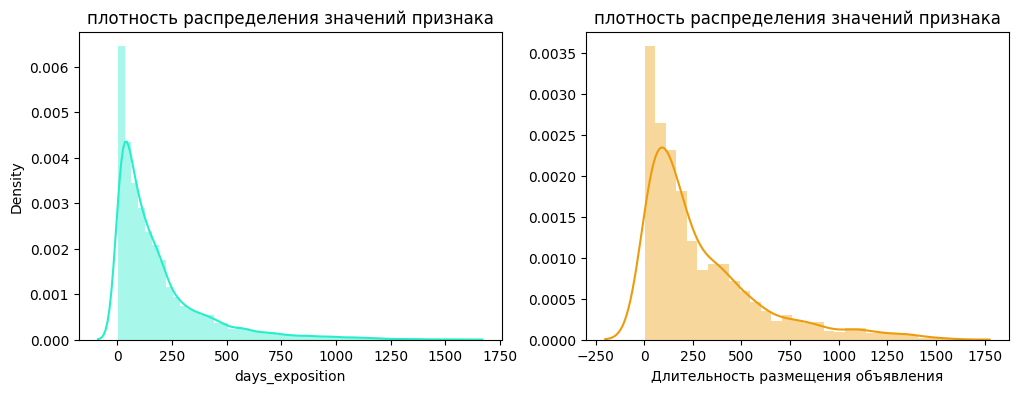

In [209]:
# диаграммы плотности распределния значений признака `days_exposition`
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title('плотность распределения значений признака')
sns.distplot(middle['days_exposition'], color='#25efcb')

plt.subplot(1,2,2)
plt.title('плотность распределения значений признака')
sns.distplot(luxury['days_exposition'], color='#ee9b0b').set(ylabel='', xlabel='Длительность размещения объявления')

plt.show()

**Вывод:** очень быстрая продажа в среднем ценовом сегменте состоялась за 1 день. Редкость, но и такое бывает! Как правило, а это правило подтверждается полученными статистическими данными, быстрой продажа квартиры может считаться, если сделка состоялась в период до 42 дней. Далее мы видим плавное, но уверенное нарастание длительности прозябания объекта в предложениях. Медианное значение длительности периода размещения объявления с последующей продажей для среднего ценового сегмента составляет 113 дней (почти 4 месяца). 99-ый перцентиль значений находится на отметке 1040 дней. Зависших объявлений в среднем ценовом сегменте всего 177 единиц.

Люксовый ценовой сегмент в силу своей уникальности и большей разреженности числа потенциальных покупателей даёт “утяжеление” срока продажи почти в 2 раза. Так, самой быстрой в люксовом сегменте стала сделка через 3 дня после публикации объявления. Быстрая продажа люксовой квартиры может состояться в период до 81 дня.  Медианное значение периода размещения объявления о продаже люксовой квартиры достигает 186 дней (порядка 7 месяцев). 99-ый перцентиль значений находится на отметке 1333 дня. Зависших объявлений о продаже люксового жилья на сайте за период 2014 – 2019 годов всего 16 единиц.

Примечательно, что максимальная длительность периода размещения объявлений почти равна в обеих ценовых категориях, и составляет 1580 дней. Полагаю, после превышения этого временного порога объявление было автоматически удалено с сайта.

В общем и целом, **на стоимость квартиры влияет** её метраж, планировка и месторасположение (между историческим центром города и Токсово - пропасть социокультурного разрыва на много километров), развитость инфраструктуры, тип здания (малоквартирый дом, многоквартирный дом "хрущёвка", "брежневка", "путинка") и его состояние (новостройка, средняя степень износа, ветхий или аварийный старый жилой фонд), собственно, этажность постройки и этаж, на котором находится квартира. В последние десятилетия появился запрос на экологическую благополучность и доступность зон отдыха и рекреации.

#### 4.3. Изучение факторов, которые оказывают критическое влияние на полную стоимость объекта с визуализацией (диаграмма рассеяния):
* общая площадь;
* жилая площадь;
* площадь кухни;
* количество комнат;
* этаж, на котором расположена квартира (первый, последний, другой);
* дата размещения (день недели, месяц, год).

Чтобы выявить меру взаимосязи и зависимости цены объекта с остальными признаками, мы можем рассчитать корреляцию и построить графики зависимости.

In [210]:
# выбираем только числовые признаки
midcorr = middle.select_dtypes(include='number').corr()[['last_price']].reset_index()
luxcorr = luxury.select_dtypes(include='number').corr()[['last_price']].reset_index()

In [211]:
# объединение датафреймов
comparison_df = pd.merge(midcorr, luxcorr, on='index')
comparison_df.columns = ['feature', 'middle', 'luxury']

# исключение из описательной картины корреляции целевого признака стоимости квартиры
comparison_df = comparison_df[comparison_df['feature'] != 'last_price']

# вывод расчёта меры корреляции стоимости квартиры по отношению к другим ключевым признакам
comparison_df = comparison_df.style.format(precision=2).background_gradient(cmap='Reds', vmin=0.3, vmax=1.0)
comparison_df

,feature,middle,luxury
0,total_area,0.69,0.56
2,price_m2,0.59,0.79
3,living_area,0.56,0.46
4,kitchen_area,0.46,0.26
5,rooms,0.45,0.27
6,ceiling_height,0.39,0.17
7,floor,0.13,0.01
8,floor_type,0.03,0.10
9,floors_total,0.20,-0.08
10,cityCenters_nearest,-0.45,-0.10


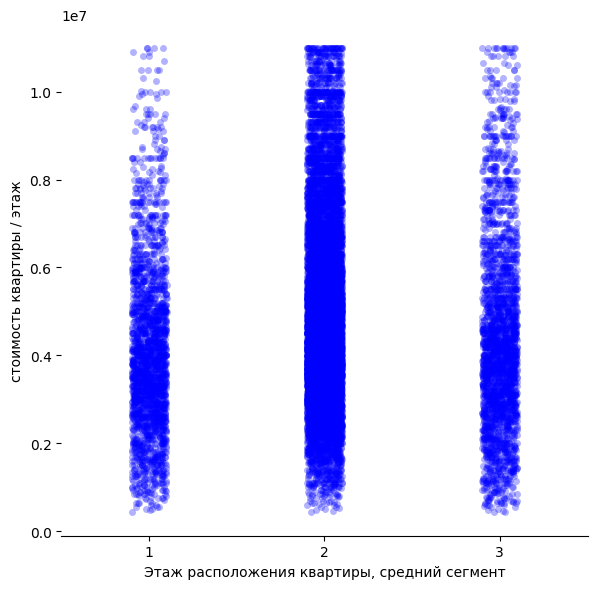

In [212]:
# визуализация зависимости стоимости квартиры среднего ценового сегмента от этажа, на котором расположена квартира
g = sns.catplot(data=middle, x='floor_type', y='last_price', height=6, aspect=1, alpha=0.3, color='blue')
(g.set_axis_labels('Этаж расположения квартиры, средний сегмент', 'стоимость квартиры / этаж').despine(left=True));

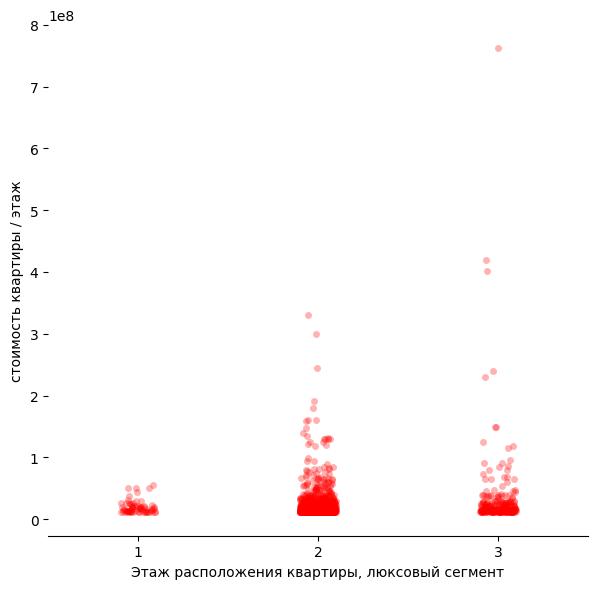

In [213]:
# визуализация зависимости стоимости квартиры люксового ценового сегмента от этажа, на котором расположена квартира
g = sns.catplot(data=luxury, x='floor_type', y='last_price', height=6, aspect=1, alpha=0.3, color='red')
(g.set_axis_labels('Этаж расположения квартиры, люксовый сегмент', 'стоимость квартиры / этаж').despine(left=True));

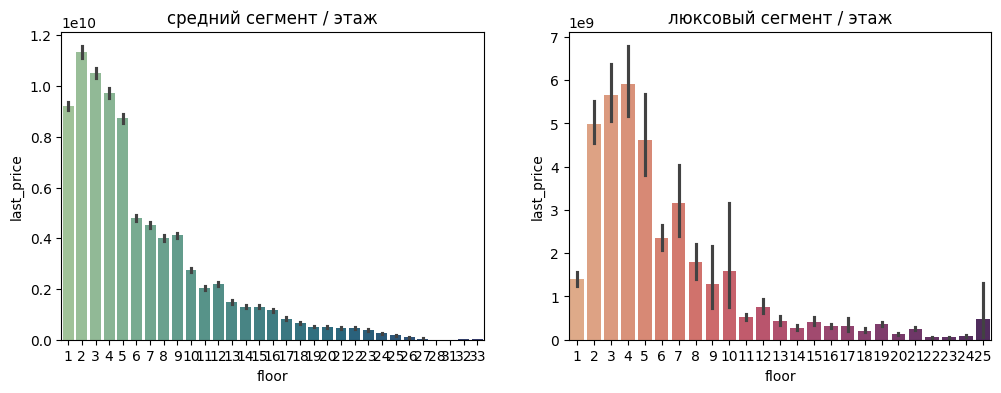

In [214]:
# визуализация зависимости стоимости квартиры каждого ценового сегмента от этажа
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.title('средний сегмент / этаж')
sns.barplot(data=middle, x='floor', y='last_price', estimator=np.sum, palette='crest')

plt.subplot(1,2,2)
plt.title('люксовый сегмент / этаж')
sns.barplot(data=luxury, x='floor', y='last_price', estimator=np.sum, palette='flare')

plt.show()

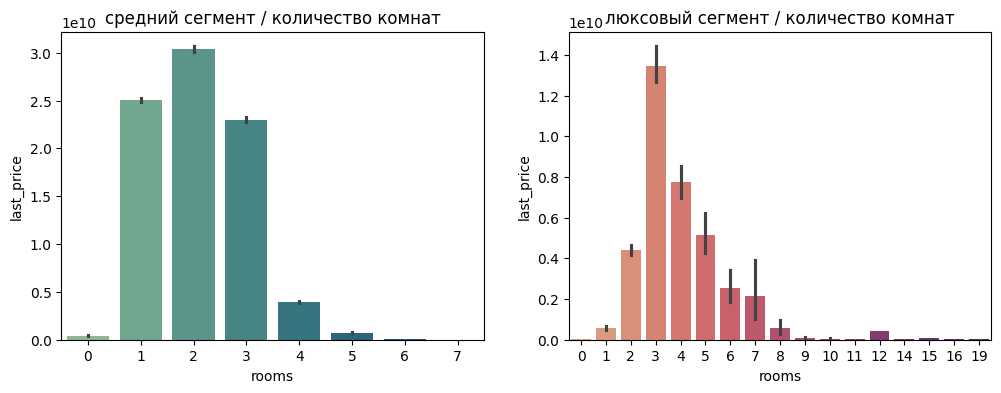

In [215]:
# визуализация зависимости стоимости квартиры каждого ценового сегмента от количества комнат
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title('средний сегмент / количество комнат')
sns.barplot(data=middle, x='rooms', y='last_price', estimator=np.sum, palette='crest')

plt.subplot(1,2,2)
plt.title('люксовый сегмент / количество комнат')
sns.barplot(data=luxury, x='rooms', y='last_price', estimator=np.sum, palette='flare')
plt.show()

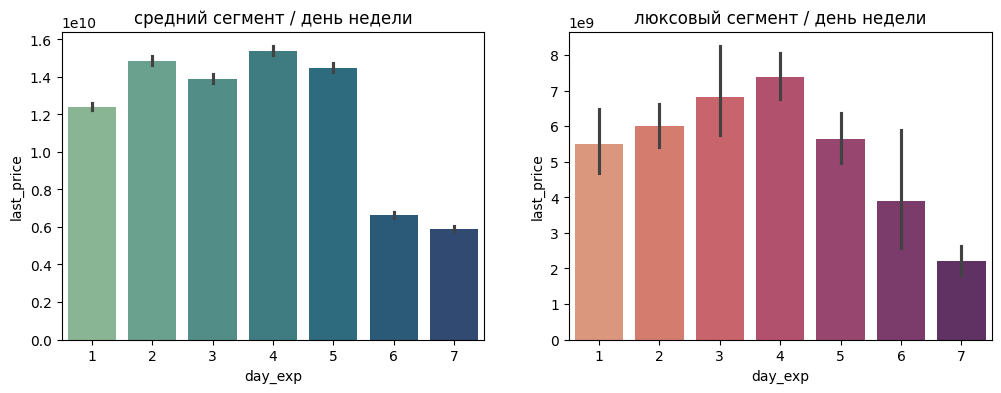

In [216]:
# визуализация зависимости стоимости квартиры каждого ценового сегмента от дня недели, в который было размещено объявление
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.title('средний сегмент / день недели')
sns.barplot(data=middle, x='day_exp', y='last_price', estimator=np.sum, palette='crest')

plt.subplot(1,2,2)
plt.title('люксовый сегмент / день недели')
sns.barplot(data=luxury, x='day_exp', y='last_price', estimator=np.sum, palette='flare')

plt.show()

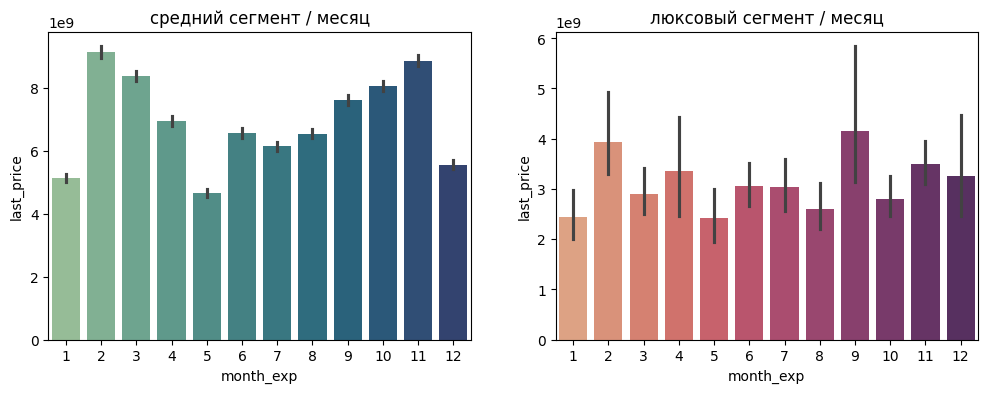

In [217]:
# визуализация зависимости стоимости квартиры каждого ценового сегмента от месяца, в который было размещено объявление
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.title('средний сегмент / месяц')
sns.barplot(data=middle, x='month_exp', y='last_price', estimator=np.sum, palette='crest')

plt.subplot(1,2,2)
plt.title('люксовый сегмент / месяц')
sns.barplot(data=luxury, x='month_exp', y='last_price', estimator=np.sum, palette='flare')

plt.show()

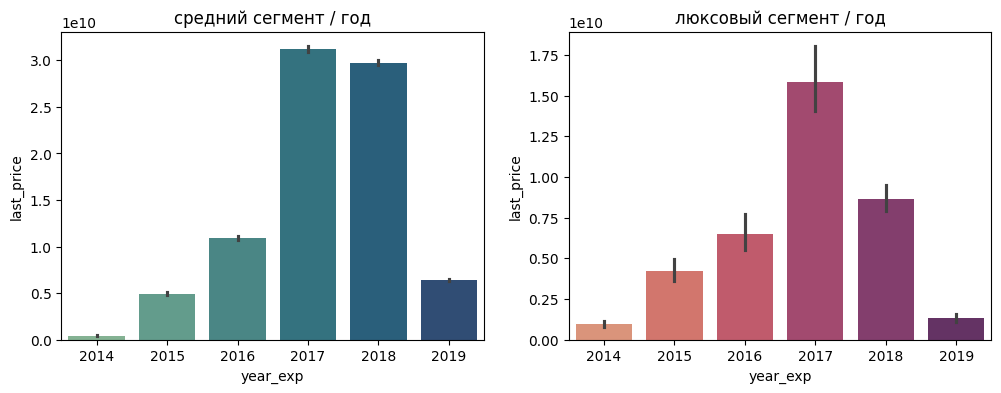

In [218]:
# визуализация зависимости стоимости квартиры каждого ценового сегмента от года, в который было размещено объявление
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.title('средний сегмент / год')
sns.barplot(data=middle, x='year_exp', y='last_price', estimator=np.sum, palette='crest')

plt.subplot(1,2,2)
plt.title('люксовый сегмент / год')
sns.barplot(data=luxury, x='year_exp', y='last_price', estimator=np.sum, palette='flare')

plt.show()

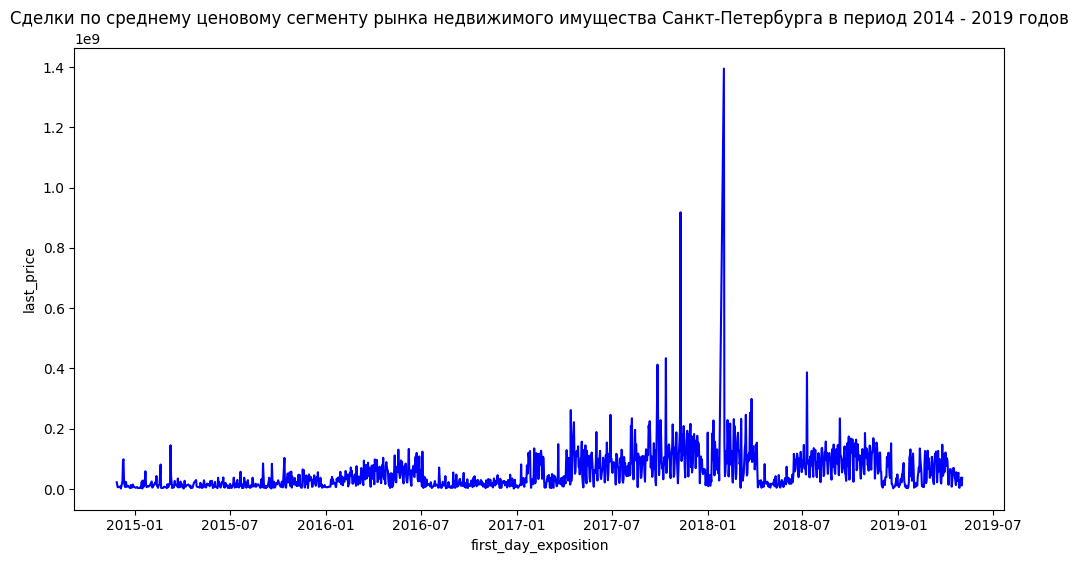

In [219]:
# динамика рынка недвижимости Санкт-Петербурга и Ленинградской области в период с 2014 по 2019 год
plt.figure(figsize=(12,6))
exp_lineplot = middle[['last_price', 'first_day_exposition']].groupby('first_day_exposition').\
sum().sort_values('first_day_exposition', ascending=True).reset_index()
sns.lineplot(data=exp_lineplot, x='first_day_exposition', y='last_price', color='blue')
plt.title('Сделки по среднему ценовому сегменту рынка недвижимого имущества Санкт-Петербурга в период 2014 - 2019 годов', 
          fontsize=12)
plt.show()

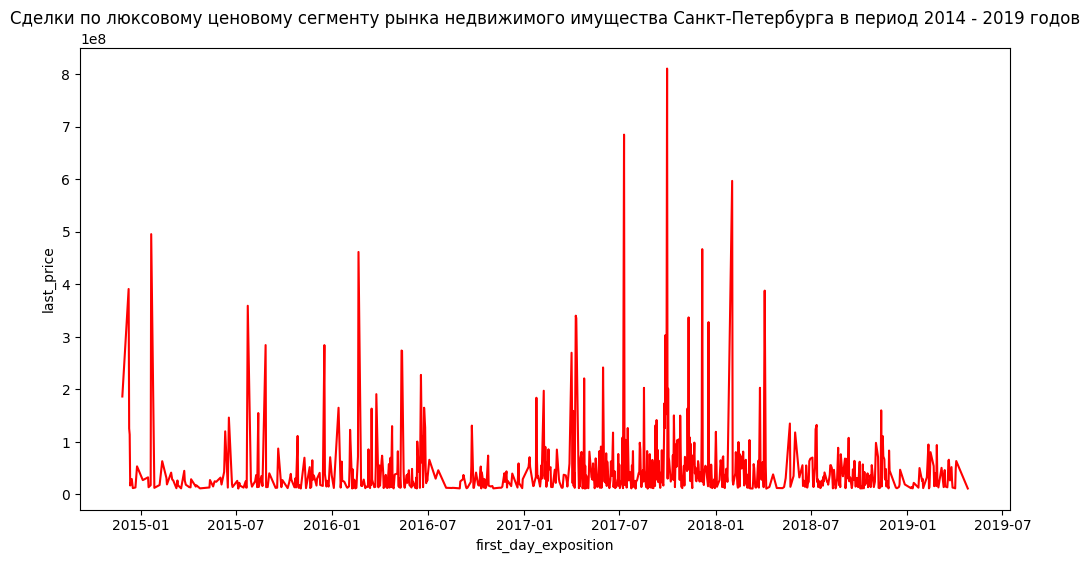

In [220]:
# динамика рынка недвижимости Санкт-Петербурга и Ленинградской области в период с 2014 по 2019 год
plt.figure(figsize=(12,6))
exp_lineplot = luxury[['last_price', 'first_day_exposition']].groupby('first_day_exposition').\
sum().sort_values('first_day_exposition', ascending=True).reset_index()
sns.lineplot(data=exp_lineplot, x='first_day_exposition', y='last_price', color='red')
plt.title('Сделки по люксовому ценовому сегменту рынка недвижимого имущества Санкт-Петербурга в период 2014 - 2019 годов', 
          fontsize=12)
plt.show()

**Выводы:** по данному блоку исследований представлен в виде таблицы ниже.

*Таблица 6. Мера взаимосвязи целевого признака стоимости квартиры с другими признаками объектов среднего и люксового ценового сегмента рынка недвижимости Санкт-Петербурга и Ленинградской области за период 2014 - 2019 годов*

| наименование признака | средний ценовой сегмент                              |               люксовый ценовой сегмент     |
|:----------------------|:-----------------------------------------------------|:-------------------------------------------|
|`total_area`| Мера корреляции высокая положительная и равна 0.69     |   Мера корреляции высокая положительная и равна 0.56|
|`price_m2`|Мера корреляции высокая положительная и равна 0.59|Мера корреляции высокая положительная и равна 0.79|
|`living_area`|Мера корреляции высокая положительная и равна 0.56|Мера корреляции положительная и равна 0.46|
|`kitchen_area`|Мера корреляции положительная и равна 0.46|Мера корреляции положительная и равна 0.27|
|`rooms`|Мера корреляции положительная и равна 0.45. Наибольшая стоимость квартир соответствует 2 комнатам, следом за ними идут по цене 1-комнатные квартиры и замыкают тройку лидеров 3-комнатные квартиры.|Мера корреляции положительная и равна 0.27. Абсолютный лидер – это 3-комнатные квартиры. Их стоимость почти в 2 раза выше остальных предлагаемых вариантов жилья. |
|`ceiling_height`|Мера корреляции положительная и равна 0.39|Мера корреляции положительная и равна 0.17|
|`floor`|Мера корреляции чрезвычайно мала и равна 0.14. Самые дорогие квартиры в этом сегменте расположены на 2 этаже, на ступеньке за ним идёт 3 этаж, и ещё ниже по стоимости – 4 этаж.|Мера корреляции чрезвычайно мала и равна 0.0083. Самые дорогие квартиры – на 4 этаже, немногим дешевле – на 3 этаже, и следом за ним по стоимости объекта идёт квартира на 2 этаже. |
|`floor_type`|Мера корреляции чрезвычайно мала и равна 0.03. В среднем ценовом сегменте цена квартиры, безусловно, зависит от этажа расположения квартиры. Меньше всего ценятся квартиры на 1 этаже, чуть побольше – на последнем. Но в приоритете – этажность за пределами этих значений, то есть, в средине дома.|Мера корреляции положительная и равна 0.1. В люксовом ценовом сегменте квартиры на 1 этаже практически не представлены и очень низко котируются. Есть существенная масса объявлений, предлагающих квартиры не на 1 и не на последнем этажах многоквартирных домов.|
|`day_exp`|Мера корреляции чрезвычайно мала и равна -0.0029. Одно пиковое количество объявлений здесь выделить довольно трудно. Самый загруженный день – четверг, но и вторник, и пятница практически «дышат ему в спину». Причиной этому явлению может быть консолидированные усилия риэлторов и собственников жилья.|Мера корреляции чрезвычайно мала и равна 0.0047. В люксовом сегменте ярко выраженный пик соответствия стоимости объекта и дня размещения объявления. С понедельника по четверг стоимостные характеристики объектов плавно растут, достигая максимума в четверг, а с пятницы начинается системное снижение ценовой категории. Это является следствием заранее разработанной стратегии продвижения элитного жилья на общем рынке недвижимости.|
|`month_exp`|Мера корреляции чрезвычайно мала и равна 0.01. Взаимосвязь цены объекта и интенсивности движения рынка недвижимости в целом носит сезонный характер для среднего ценового сегмента. Так, можно выделить два сезона: весенний (февраль, март) и осенний (сентябрь, октябрь, ноябрь). На зимние месяцы декабрь и январь приходится период затишья.|Мера корреляции чрезвычайно мала и равна 0.0019. Рынок люксовой недвижимости в течение календарного года движется достаточно плавно, без резких сезонных подъёмов или спадов. Незначительно большим значением количества и суммы сделок отмечается сентябрь и февраль.|
|`year_exp`|Мера корреляции чрезвычайно мала и равна -0.048. Здесь для чистоты выводов мы обязаны взять в рассмотрение только полные календарные отрезки: 2015 – 2018 включительно. С каждым годом количество объявлений и, следовательно, суммарная стоимость сделок по недвижимости, сильно нарастала. Серьёзный подъём приходится на 2017 год. Февраль 2018 года встречает нас огромнейшим пиком по количеству операций с недвижимостью.|Мера корреляции чрезвычайно мала и равна -0.053. Нарастание количества сделок с недвижимостью на платформе Яндекс Недвижимость так же характерно и для люксового сегмента. Но, если присмотреться внимательнее, то можно увидеть высокую амплитуду движений стоимости сделок не только в феврале 2018 года, но и до этого периода, и после. Предположим, что это может быть связано с инфляцией и изменением курса USD.|



#### 4.4. Расчёт средней стоимости квадратного метра недвижимости в 10 населённых пунктах с наибольшим числом объявлений

In [221]:
# топ-10 стоимости 1 кв.м в 10 населённых пунктах с наибольшим числом объявлений для среднего ценового сегмента
topmid = middle.groupby('locality_name').agg(count=('locality_name', 'count'), mean_price_m2=('price_m2', 'mean')) 
topmid.sort_values(by='count', ascending=False, inplace=True)
top_mid_10 = topmid.iloc[:10]
top_mid_10.sort_values(by='mean_price_m2', ascending=False)

,count,mean_price_m2
locality_name,,
Санкт-Петербург,10952,103644.076789
Пушкин,314,100546.803729
деревня Кудрово,260,92170.915328
поселок Парголово,288,90550.927407
поселок Мурино,492,85149.717141
поселок Шушары,392,78686.016815
Колпино,303,75520.660793
Гатчина,265,68060.206660
Всеволожск,360,67053.902238


In [222]:
# топ-10 стоимости 1 кв.м в 10 населённых пунктах с наибольшим числом объявлений для люксового ценового сегмента
toplux = luxury.groupby('locality_name').agg(count=('locality_name', 'count'), mean_price_m2=('price_m2', 'mean')) 
toplux.sort_values(by='count', ascending=False, inplace=True)
top_lux_10 = toplux.iloc[:10]
top_lux_10.sort_values(by='mean_price_m2', ascending=False)

,count,mean_price_m2
locality_name,,
Санкт-Петербург,1500,175268.785274
Пушкин,32,134579.322298
Сестрорецк,12,131936.175263
Петергоф,7,130181.360574
Павловск,2,119257.613731
Гатчина,2,118193.355730
Колпино,2,115593.525180
Кронштадт,2,104742.965368
поселок Стрельна,3,93186.234014


**Выводы:** в среднем и люксовом ценовых сегментах рынка в лидеры по стоимости 1 кв.м жилья вышел Санкт-Петербург со стоимостью 103 644 руб./кв.м и 175 268 руб./кв.м соответственно. Существенная разница в списках населённых пунктов, следующих за Санкт-Петербургом и Пушкиным, подводят нас к выводу о приоритетах, престижности и ценовой доступности жилья на удалении от северной столицы для представителей обоих ценовых сегментов. Так, средний ценовой сегмент сосредатачен на север рядом с Парголово, Мурино, Кудрово, и далее - до самого Выборга с ценой 58 021 руб./кв.м. Люксовая пригородная и загородная недвижимость располагается в Петергофе, Павловске, Гатчине, Кронштадте и только в Красном Селе цена за кв.м падает до уровня 70 712 руб./кв.м.

#### 4.5. Расчёт средней стоимости недвижимости Санкт-Петербурга в зависимости от удалённости от центра города с визуализацией (линейный график)

In [223]:
# делаем срез данных по среднему сегменту Санкт-Петербурга
middle_SPb = middle.query('locality_name == "Санкт-Петербург"')

In [224]:
# переводим километры в метры, средний сегмент
middle_SPb['cityCenters_km'] = (middle_SPb['cityCenters_nearest'] / 1000).round()
middle_SPb['cityCenters_km'].value_counts().index

Index([12.0, 15.0, 13.0, 14.0, 16.0, 11.0, 17.0, 10.0,  5.0,  9.0,  8.0,  4.0,
        6.0,  7.0, 18.0,  3.0, 22.0,  2.0, 19.0, 21.0,  1.0, 23.0, 26.0, 20.0,
       24.0, 25.0, 28.0,  0.0, 29.0, 27.0],
      dtype='float64', name='cityCenters_km')

In [225]:
# создаём сводную таблицу с километражом и стоимостью кв.м, средний сегмент
price_mid_km = (middle_SPb.pivot_table(index='cityCenters_km', values='price_m2', aggfunc='mean'))
price_mid_km

,price_m2
cityCenters_km,
0.0,116348.084631
1.0,113619.883592
2.0,110221.803102
3.0,105705.444739
4.0,110543.274111
5.0,119049.710960
6.0,120280.144016
7.0,113498.602257
8.0,113497.102568


In [226]:
# из индекса таблицы создаём столбец с дополнительными данными для построения графика
price_mid_grade = price_mid_km
price_mid_grade['SPb_km'] = price_mid_km.index

In [227]:
# делаем срез данных по люксовому сегменту Санкт-Петербурга
luxury_SPb = luxury.query('locality_name == "Санкт-Петербург"')

In [228]:
# переводим километры в метры, люксовый сегмент
luxury_SPb['cityCenters_km'] = (luxury_SPb['cityCenters_nearest'] / 1000).round()
luxury_SPb['cityCenters_km'].value_counts().index

Index([ 5.0,  4.0,  6.0,  7.0,  8.0,  2.0, 11.0,  1.0, 12.0, 13.0,  3.0,  9.0,
       10.0, 15.0, 14.0, 17.0, 16.0,  0.0, 18.0, 19.0, 22.0, 27.0],
      dtype='float64', name='cityCenters_km')

In [229]:
# создаём сводную таблицу с километражом и стоимостью кв.м, люксовый сегмент
price_lux_km = (luxury_SPb.pivot_table(index='cityCenters_km', values='price_m2', aggfunc='mean'))
price_lux_km

,price_m2
cityCenters_km,
0.0,310976.834418
1.0,207812.135937
2.0,217334.860045
3.0,145538.355928
4.0,173785.755119
5.0,171187.436563
6.0,203891.218947
7.0,236562.077412
8.0,160943.579710


In [230]:
# из индекса таблицы создаём столбец с дополнительными данными для построения графика  
price_lux_grade = price_lux_km
price_lux_grade['SPb_km'] = price_lux_km.index

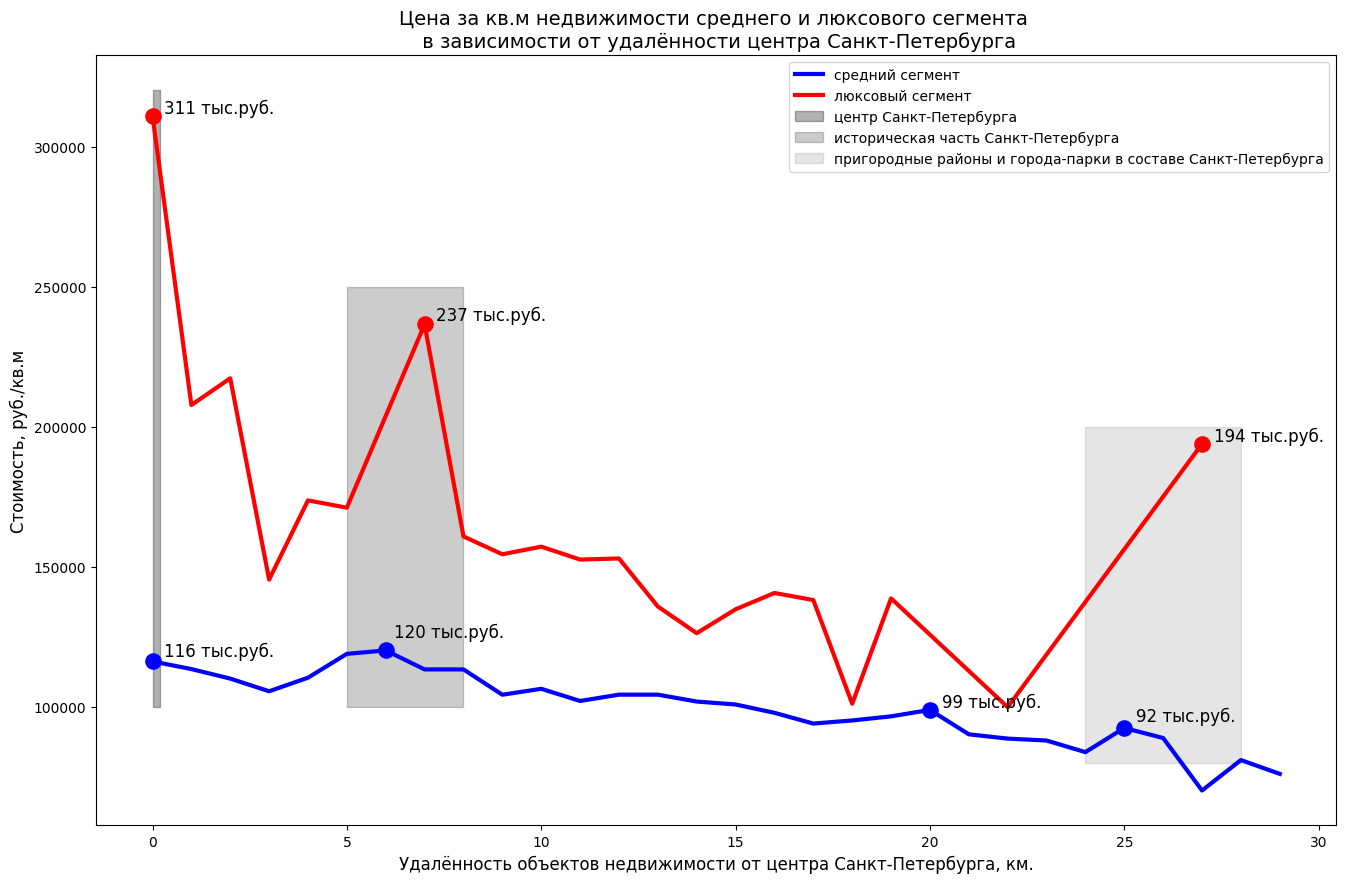

In [231]:
# визуализация стоимости квадратного метра в зависимости от километража
plt.figure(figsize=(16, 10))

price_mid_grade.plot(x='SPb_km', y='price_m2', kind='line', linewidth=3, color='blue', 
                     ax=plt.gca(), label='средний сегмент')
price_lux_grade.plot(x='SPb_km', y='price_m2', kind='line', linewidth=3, color='red', 
                     ax=plt.gca(), label='люксовый сегмент')

# область высоких значений для обоих сегментов
plt.fill_between([0, 0.2], 100000, 320000, color='black', alpha=0.3, 
                 label='центр Санкт-Петербурга')
plt.fill_between([5, 8], 100000, 250000, color='black', alpha=0.2, 
                 label='историческая часть Санкт-Петербурга')
plt.fill_between([24, 28], 80000, 200000, color='black', alpha=0.1, 
                 label='пригородные районы и города-парки в составе Санкт-Петербурга')

# пиковые отметки стоимости для среднего сегмента
plt.scatter(x=0, y=116348.084631, color='blue', s=120)
plt.text(0 + 0.3, 118000, f'116 тыс.руб.', fontsize=12)

plt.scatter(x=6, y=120280.144016, color='blue', s=120)
plt.text(6 + 0.2, 125000, f'120 тыс.руб.', fontsize=12)

plt.scatter(x=20, y=99056.403326, color='blue', s=120)
plt.text(20 + 0.3, 100000, f'99 тыс.руб.', fontsize=12)

plt.scatter(x=25, y=92613.742665, color='blue', s=120)
plt.text(25 + 0.3, 95000, f'92 тыс.руб.', fontsize=12)

# пиковые отметки стоимости для люксового сегмента
plt.scatter(x=0, y=310976.834418, color='red', s=120)
plt.text(0 + 0.3, 312000, f'311 тыс.руб.', fontsize=12)

plt.scatter(x=7, y=236562.077412, color='red', s=120)
plt.text(7 + 0.3, 238000, f'237 тыс.руб.', fontsize=12)

plt.scatter(x=27, y=193918.918919, color='red', s=120)
plt.text(27 + 0.3, 195000, f'194 тыс.руб.', fontsize=12)

plt.title('Цена за кв.м недвижимости среднего и люксового сегмента \n \
в зависимости от удалённости центра Санкт-Петербурга', fontsize=14)
plt.legend(loc='upper right')
plt.xlabel('Удалённость объектов недвижимости от центра Санкт-Петербурга, км.', fontsize=12)
plt.ylabel('Стоимость, руб./кв.м', fontsize=12)
plt.show()

**Вывод:** стоимость объектов, безусловно, взаимосвязана с расстоянием до центра города. Но характер этой взаимосвязи в обоих сегментах выглядит несколько по-разному. 

Высокая ценовая категория стоимости характерна для обоих сегментов только на отрезке первых 5 км исторической части города, но и там разница стоимости квартир и квадратного метра бросается в глаза. Для среднего сегмента квартира в исторической части города будет стоить от 116 000 до 120 000 руб/кв. В люксовом сегменте стоимость жилья в этом же районе варьируется от 310 000 до 217 000 руб./кв.м.

И только на единственном отрезке от 6 до 7 км от центра города, а это Васильевский остров и Петроградская сторона, эти линии динамики цен очень близки: стоимость кв.м для среднего сегмента здесь составит 113 000 - 120 000 руб./кв.м, элитное жильё от 203 000 до 237 000 руб./кв.м.

Чем дальше от центра города, тем сильнее выражена градация уровня дохода и покупательской способности. В среднем сегменте в соответствии с этим цена квадратного метра жилплощади плавно снижается до 70 000 - 80 000 руб./кв.м, а люксовый сегмент опять подтверждает свою исключительность и приобретает дорогостоящее загородное жильё в экологически чистых пригородных районах или в городах-парках (Пушкин или Петергоф) по цене от 100 000 руб./кв. до 194 000 руб./кв., и это отчётливо видно на последнем отрезке графика в 25 км.

### 5. Итоги

Ежедневно миллионы людей по всей России совершают сделки с недвижимостью, будь то продажа дачного участка или приобретение ипотечной квартиры в новостройке. Разнообразие типов жилья в совокупности с большим количеством потребительских факторов создаёт для потенциального покупателя широкий спектр возможностей выбора в соответствии с имеющимся бюджетом. 

Получение объективной информации о положении дел на рынке недвижимости возможно только после всестороннего анализа имеющейся информации. Архив объявлений сервиса Яндекс Недвижимость по Санкт-Петербургу и Ленинградской области за период с 2014 по 2019 год включительно может стать серьёзным источником статистических данных для подобного исследования.

В целях изучения статистических данных нами была импортирована библиотека `pandas` для работы с массивами данных, `matplotlib` и `seaborn` для визуализации полученных результатов, осуществлена загрузка исходного файла с данными. В работу поступил датафрейм `real_estate_data.csv`, в котором содержится 23 699 объявлений о продаже недвижимости в разрезе следующих 22 признаков:

| № п/п | Название                | Краткое описание                            |
|-------|:------------------------|:--------------------------------------------|
| 1.     | `locality_name`        | название населённого пункта                 | 
| 2.     | `last_price`           | цена на момент снятия с публикации          | 
| 3.     | `total_area`           | общая площадь квартиры в квадратных метрах  |
| 4.     | `living_area`          | жилая площадь в квадратных метрах           | 
| 5.     | `kitchen_area`         | площадь кухни в квадратных метрах           | 
| 6.     | `rooms`                | число комнат                                | 
| 7.     | `ceiling_height`       | высота потолков                             | 
| 8.     | `balcony`              | число балконов                              |
| 9.     | `is_apartment`         | апартаменты                                 |  
| 10.    | `studio`               | квартира-студия                             |  
| 11.    | `open_plan`            | свободная планировка                        | 
| 12.    | `floor`                | этаж                                        | 
| 13.    | `floors_total`         | всего этажей в доме                         | 
| 14.    | `cityCenters_nearest`  | расстояние до центра города                 | 
| 15.    | `airports_nearest`     | расстояние до ближайшего аэропорта в метрах | 
| 16.    | `parks_around3000`     | число парков в радиусе 3 км                 |
| 17.    | `parks_nearest`        | расстояние до ближайшего парка              | 
| 18.    | `ponds_around3000`     | число водоёмов в радиусе 3 км               | 
| 19.    | `ponds_nearest`        | расстояние до ближайшего водоёма            |
| 20.    | `total_images`         | число фотографий квартиры в объявлении      | 
| 21.    | `first_day_exposition` | дата публикации                             |
| 22.    | `days_exposition`      | длительность периода размещения объявления  |

Перед нами была поставлена задача выполнить предварительную обработку данных, и изучить и выявить интересные особенности и зависимости, которые существуют на рынке недвижимости.

Рынок недвижимости Санкт-Петербурга – это система организационных мер, при помощи которой участники рынка (покупатели и продавцы) встают плечом к плечу вместе для определения цены, по которой происходит обмен товара - недвижимости. И рядом с продавцами и покупателями на одной ступени стоят **профессиональные участники рынка недвижимости**: брокеры, оценщики, банкиры, юристы, страховщики и, конечно, **аналитики**, занимающиеся исследованием рынка недвижимости и подготовкой информации для принятия стратегических решений по его развитию. 

В рамках предварительной обработки данных мы подробно изучили имеющиеся данные. Происхождение сведений о каждом объекте в базе имеет разную природу, а именно: 1) сведения, добавленные пользователем и 2) сведения картографические.  Сведения, добавленные пользователем, описывают потребительские характеристики самого жилья, которые, в свою очередь, регулируются целым рядом ГОСТ, СНиП, СанПиН и СП, а также правилами размещения достоверной информации об объекте на платформе Яндекс Недвижимость.

С помощью цепочки методов `isna().sum()` нами были выявлены и изучены пропущенные значения по всем числовым признакам. Визуализация полученных результатов представлена на тепловой карте `heatmap`.  Установлено отсутствие данных по 14 признакам в объёме более 22% от общего массива. Для обработки количественных и качественных потерь информации была разработана и реализована соответствующая стратегия: заполнение пропусков значением `0` там, где это логически обосновано; заполнение медианным или минимальным нормативным значением; восстановление данных с помощью получения геокода и с помощью дополнительного созданного признака категории удалённости населённого пункта от центра Ленинградской области – Санкт-Петербурга для восстановления сбалансированных значений по целому ряду взаимосвязанных признаков. Также, нами были рассмотрены типы данных в датафрейме, выполнено необходимое преобразование вещественных типов данных к целочисленным: `floors_total`, `parks_nearest`, `ponds_nearest`, `parks_around3000`, `ponds_around3000`, `balcony`, `is_apartment`. По итогам изучения уникальных значений признака `locality_name` были устранены 43 неявных дубликата и укрупнены смысловые синонимы: к типу посёлок отнесён городской посёлок, городского типа, городской, коттеджный, при железнодорожной станции, а к садовому товариществу отнесено садоводческое некоммерческое товарищество. Исследованы и обработаны редкие и выбивающиеся значения. Выполнена проверка на соблюдение логических условий по взаимосвязанным признакам, обработаны некорректные данные с механическими или смысловыми ошибками ввода. После предварительной обработки исходный датафрейм сократился с 23 699 до 19 262, потери данных составили 4 437 строк или 18.7%.

В ходе исследования нами были применены срезы данных методом `query()`, выборочные замены значений методом `where()`, созданы графики с использованием `hist()`, `boxplot()`, `plot()`, их построение было автоматизировано в циклической обработке. Поиск, присвоение и замена значений были реализованы с помощью методов индексов и строк.

**`Ценовая ситуация`** Нами были выявлено наличие **среднего** и **люксового ценового сегмента** рынка недвижимости Санкт-Петербурга и Ленинградской области. Ценовым порогом разделения стала отметка стоимости объекта в 11 000 000 руб.

**`Особенности`** Географическая особенность расположения Санкт-Петербурга и Ленинградской области в европейской части России, помноженная на исторический контекст многовекового столичного статуса города, влагонасыщенные болотистые грунты как характерная геологическая особенность, климатическая карта местности создают уникальный и неповторимый портрет этого региона.

**`Тенденции`** Российский рынок недвижимости находится в фазе активного развития, и Санкт-Петербург явный тому пример. Высокая деловая активность в целом характерна как для жителей центральных районов самой северной столицы, так и для жителей её отдалённых районов Ленинградской области. Рынок недвижимости Санкт-Петербурга, тем не менее, представляет собой качественно другую нишу и не может быть стандартом для всей России. Здесь сильно включены не только российские, но и зарубежные капиталы. Мы отчётливо видим, как после падения в 2015–2016 гг. и стабилизации в 2017 г. цены предложения на рынке жилой недвижимости Санкт-Петербург в основном перешли в стадию роста, и это характерно для обоих сегментов.

**`Объём предложения и его структура`** Полагаем важным отметить существование исторически сложившихся типов городского и сельского жилья в России, обладающих характерными потребительскими признаками и являющихся неизменным символом той или иной эпохи: объекты культурного наследия (постройки XIX века), «сталинки», «хрущёвки», «брежневки», «пентагоны», «чешки», «П-44», «путинки» как наследие XX века. За последних два десятилетия на рынке недвижимости появились совершенно новые типы домов и гораздо большее разнообразие планировок. Альтернативой привычным новостройкам стали студии, апартаменты, лофты, размещённые в перепрофилированных промышленных или офисных зданиях.

В среднем ценовом сегменте Санкт-Петербурга в большом количестве присутствуют 2- и 3-комнтаные квартиры в типовых 5-, 9- и 16-этажных зданиях советской постройки средней степени износа. В таких квартирах зачастую нет балкона, общая площадь достигает значения 52 кв.м, кухня 8 кв.м, и высота потолка 2.6 – 2.7 м. До центра города, как и до зоны отдыха и рекреации, придётся преодолеть 12-15 км пути. За такую квартиру придётся заплатить сумму порядка 5 – 6 млн. руб.

В люксовом ценовом сегменте запросы выше и простор жилья гораздо больше. Общая площадь типичной элитной недвижимости начинается от скромных 112 кв.м. с жилой площадью от 84 кв.м и непоказательно маленькими кухнями по 16 кв.м. В такой квартире количество комнат больше 4, а высота потолка зачастую 4 – 4.2 м. Визуальная середина многоэтажной новостройки в 8-, 9- и 14 этажей – именно там расположены дорогостоящие квартиры.  Люксовые объекты могут быть расположены в самом сердце города, где парки и скверы на каждом шагу, а могут быть и далеко за городом в экологически благополучных городах-парках. Стоимость такой элитной недвижимости составит порядка 15 – 23 млн. руб.

**`Характерные черты`** Спрос на недвижимость определяется не только и не столько потребительскими качествами самих объектов, сколько их местонахождением. Товары этого рынка уникальны, недвижимы и их ценность в значительной мере зависит от внешней окружающей среды. Эти тезисы подтверждаются расчётами стоимости кв./м жилья для обоих сегментов в зависимости от удалённости от центра северной столицы. Пропасть значений начинается от 310 000 руб./кв.м (люкс) и 116 000 руб./кв.м  (мидл). и заканчивается за 25-м километром около КАД и стоимостью 193 000 руб./кв.м (люкс) и 80 000 руб./кв.м.

**`Низкая эластичность предложения`** определяется через призму историчности самой локации и существования ряда запретительных мер на высотные постройки в центре города и его исторических районах, где предметом охраны является ансамбль фасадов не только одного особняка, а целой улицы. К тому же, болотистые почвы гарантируют трудности и многократное увеличение сметы на строительные работы. Поэтому количество предложений объектов среднего и люксового сегмента в домах высотной постройки выше 16-этажей весьма мало.

**`Цикличность`** Спад на рынке недвижимости предшествует спаду, экономики в целом, и подъём на рынке недвижимости наступает раньше, чем в экономике. Созданные нами графики зависимости стоимости квартиры обоих сегментов рынка недвижимости Санкт-Петербурга от года, месяца и дня недели публикации помогли нам выявить существование цикличности и сезонности в развитии данного рынка.

Сфера вложения капитала в объекты недвижимости и систему экономических отношений, возникающих при операциях с недвижимостью – это основа основ национальной рыночной экономики. Проанализировав статистические данные платформы Яндекс Недвижимость Санкт-Петербурга и Ленинградской области за период 2014 – 2019 годов мы можем утверждать, что вышеназванный рынок недвижимости хорошо развит и эффективно решает социальные задачи, связанные с использованием полезных свойств недвижимости. Здесь в полной мере присутствует свободное формирование цен на объекты. На сегодняшний день доля рынка недвижимости в валовом национальном продукте очень высока. К тому же, активные операции с недвижимостью обеспечивают высокий уровень сборов в бюджет от налогов на недвижимость и сделок с ней. Всё вышеперечисленное подтверждает большое значение рынка недвижимости Санкт-Петербурга как сектора рыночной экономики. Полагаем, что задача данной проектной работы по исследованию данных сервиса Яндекс Недвижимость выполнена.